In [0]:
import json
import glob
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np

In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

dirbase='/content/drive/My Drive/Colab Notebooks/final/CORD-19-research-challenge/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#Fetch All of JSON File Path
json_path = glob.glob(f'{dirbase}/**/*.json', recursive=True)[0:5000]
len(json_path)


5000

In [0]:

with open(json_path[0]) as file:
    content = json.load(file)


In [8]:
class FileReader:
    def __init__(self, dirbase):
        with open(dirbase) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract}... {self.body_text}...'
first_file = FileReader(json_path[0])
print(first_file)

85dfb59af4c4ec824f1f62c645e5b91a6e3cc814: ... Down-regulated gene expression, encoding sarcoplasmic reticulum (SR) Ca 2 + -ATPase and its regulatory proteins such as SR Ca 2 + -ATPase isoform 2a (SERCA2a) and phospholamban (PLN), plays a crucial role in myocardial decompensation due to the impairment of intracellular Ca 2+ cycling. It has been reported that SERCA2a and PLN expressed in peripheral blood mononuclear cells (PBMC) not only are translatable to the myocardial setting, but also significantly decrease in dogs with degenerative mitral valve disease. The aim of this study is to clarify how effectively the target genes reflect hemodynamic overload, a primary determinant of myocardial distress.
Healthy laboratory beagles (n = 24), very young dogs with patent ductus of arteriosus (PDA; n = 8) and with pulmonic stenosis (PS; n = 5) were enrolled in this study. None of patients have been treated previously with cardiovascular medication. All PDA patients were in subclinical stage, wh

In [0]:
def read_directory_files(path):
    file_texts = {'paper_id':[],'abstract':[],'body_text':[]}
    for i in range(0,len(json_path)):
        input_file_text = open(json_path[i])
        with input_file_text as f:
            data = json.load(f)
        file_texts['paper_id'].append(data['paper_id'])
        if 'abstract' not in data.keys():
            file_texts['abstract'].append(None)
        elif data['abstract']==[]:
            file_texts['abstract'].append(None)
        else:
            file_texts['abstract'].append(data['abstract'])

        if 'body_text' not in data.keys():
            file_texts['body_text'].append(None)
        elif data['body_text']==[]:
            file_texts['body_text'].append(None)
        else:
            file_texts['body_text'].append(data['body_text'])
        
            
    df=pd.DataFrame(data=file_texts)
    return df
    

In [0]:
# may run a little bit longer
json_text = read_directory_files(json_path)

In [11]:
json_text.head()

paper_id  ...                                          body_text
0  85dfb59af4c4ec824f1f62c645e5b91a6e3cc814  ...  [{'text': 'Down-regulated gene expression, enc...
1  98517ecaa3de323dc8585cee5453a2de2a0f3d22  ...  [{'text': 'Infectious or communicable disease ...
2  95dbed40b9b6adbc57dcbae88e5bb4b8a3ad4929  ...  [{'text': 'Multiple sclerosis (MS) is a chroni...
3  8dad92c1030a6547f112250184572c50dae43c8d  ...  [{'text': 'Vaccination has been undeniably ver...
4  9660e4d54d854be62dc2e3ec086d1132a741efd9  ...  [{'text': 'Interleukin 35 (IL-35) is a part of...

[5 rows x 3 columns]

In [12]:
print(list(json_text['body_text'][0][0]['text'].split()))

['Down-regulated', 'gene', 'expression,', 'encoding', 'sarcoplasmic', 'reticulum', '(SR)', 'Ca', '2', '+', '-ATPase', 'and', 'its', 'regulatory', 'proteins', 'such', 'as', 'SR', 'Ca', '2', '+', '-ATPase', 'isoform', '2a', '(SERCA2a)', 'and', 'phospholamban', '(PLN),', 'plays', 'a', 'crucial', 'role', 'in', 'myocardial', 'decompensation', 'due', 'to', 'the', 'impairment', 'of', 'intracellular', 'Ca', '2+', 'cycling.', 'It', 'has', 'been', 'reported', 'that', 'SERCA2a', 'and', 'PLN', 'expressed', 'in', 'peripheral', 'blood', 'mononuclear', 'cells', '(PBMC)', 'not', 'only', 'are', 'translatable', 'to', 'the', 'myocardial', 'setting,', 'but', 'also', 'significantly', 'decrease', 'in', 'dogs', 'with', 'degenerative', 'mitral', 'valve', 'disease.', 'The', 'aim', 'of', 'this', 'study', 'is', 'to', 'clarify', 'how', 'effectively', 'the', 'target', 'genes', 'reflect', 'hemodynamic', 'overload,', 'a', 'primary', 'determinant', 'of', 'myocardial', 'distress.']


In [13]:
json_text['body_text'].head()

0    [{'text': 'Down-regulated gene expression, enc...
1    [{'text': 'Infectious or communicable disease ...
2    [{'text': 'Multiple sclerosis (MS) is a chroni...
3    [{'text': 'Vaccination has been undeniably ver...
4    [{'text': 'Interleukin 35 (IL-35) is a part of...
Name: body_text, dtype: object

In [14]:
json_text.shape

(5000, 3)

In [15]:
# import necessary libraries 
import nltk.data
import nltk
nltk.download('punkt')
import re
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import word_tokenize
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
from nltk.stem.porter import *
porter_stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


TF-IDF Vectorization
(silly way) REPLACED

In [16]:
type(word_tokenize(json_text['body_text'][0][0]['text']))

list

In [0]:
value=[]
for i in range(0,len(json_text['body_text'])):
  if json_text['body_text'][i] is None:
    value.append('NA')
  elif json_text['body_text'][i][0]['text'] is None:
    value.append('NA')
  else:
    value.append(word_tokenize(json_text['body_text'][i][0]['text']))
#value[0:3]
json_text['preprocessing_bodytext']=value


In [18]:
json_text.shape

(5000, 4)

In [19]:
json_text['preprocessing_bodytext'].head

<bound method NDFrame.head of 0       [Down-regulated, gene, expression, ,, encoding...
1       [Infectious, or, communicable, disease, can, b...
2       [Multiple, sclerosis, (, MS, ), is, a, chronic...
3       [Vaccination, has, been, undeniably, very, hel...
4       [Interleukin, 35, (, IL-35, ), is, a, part, of...
                              ...                        
4995    [Introduction, self-imposed, prevention, measu...
4996    [Much, of, what, we, know, about, the, neural,...
4997    [Many, papers, use, advanced, models, combined...
4998    [The, COVID-19, pandemic, represents, a, globa...
4999    [Here, ,, we, calibrate, a, susceptible-infect...
Name: preprocessing_bodytext, Length: 5000, dtype: object>

In [20]:
type(json_text['preprocessing_bodytext'][0][0])

str

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

def Encode(data):
    #create the transform
    missing_value=True
    value=[]
    for i in data:
        if i is None:
            continue
        else:
            for i2 in i: 
                if i2['text'] is None:
                  value.append(None)
                else:
                  value.append(list(i2['text'].split()))
                    
    return value
                        

In [22]:
body_text=Encode(json_text['body_text'])
for i in body_text[0:2]:
  print(i)
len(body_text)

['Down-regulated', 'gene', 'expression,', 'encoding', 'sarcoplasmic', 'reticulum', '(SR)', 'Ca', '2', '+', '-ATPase', 'and', 'its', 'regulatory', 'proteins', 'such', 'as', 'SR', 'Ca', '2', '+', '-ATPase', 'isoform', '2a', '(SERCA2a)', 'and', 'phospholamban', '(PLN),', 'plays', 'a', 'crucial', 'role', 'in', 'myocardial', 'decompensation', 'due', 'to', 'the', 'impairment', 'of', 'intracellular', 'Ca', '2+', 'cycling.', 'It', 'has', 'been', 'reported', 'that', 'SERCA2a', 'and', 'PLN', 'expressed', 'in', 'peripheral', 'blood', 'mononuclear', 'cells', '(PBMC)', 'not', 'only', 'are', 'translatable', 'to', 'the', 'myocardial', 'setting,', 'but', 'also', 'significantly', 'decrease', 'in', 'dogs', 'with', 'degenerative', 'mitral', 'valve', 'disease.', 'The', 'aim', 'of', 'this', 'study', 'is', 'to', 'clarify', 'how', 'effectively', 'the', 'target', 'genes', 'reflect', 'hemodynamic', 'overload,', 'a', 'primary', 'determinant', 'of', 'myocardial', 'distress.']
['Healthy', 'laboratory', 'beagles',

163822

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

def EncodeTFIDF(data, maxfeature):
  try:
    value=[]
    #text=list(data['text'].split())
    for i in range(0,len(data)):
      m=','.join(data[i])
      value.append(m)
    vectorizer=TfidfVectorizer(stop_words='english',use_idf=True,max_features=maxfeature)
  #vectorizer.fit(data)
    value = vectorizer.fit_transform(value)
    #word=vectorizer.get_feature_names()
    #print(word)
  except ValueError:
    pass                    
  return value


In [0]:
bodytext_vect=EncodeTFIDF(json_text['preprocessing_bodytext'].values,2**10)

In [25]:
bodytext_vect.shape

(5000, 1024)

In [0]:
#bodytext_vect=bodytext_vect.toarray

In [26]:
bodytext_vect

<5000x1024 sparse matrix of type '<class 'numpy.float64'>'
	with 195003 stored elements in Compressed Sparse Row format>

Dimensions Reduction using UAMP

In [27]:
!pip install umap

  Created wheel for umap: filename=umap-0.1.1-cp36-none-any.whl size=3569 sha256=945860b5edad2bc52fd3ff090e8c7f9c15791901860dfd85d871642de4dba296
  Stored in directory: /root/.cache/pip/wheels/7b/29/33/b4d917dc95f69c0a060e2ab012d95e15db9ed4cc0b94ccac26
Successfully built umap


In [28]:
pip install matplotlib

In [0]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

In [0]:
reducer = umap.UMAP(n_neighbors = 5)

[[-4.8950920e-01 -3.2806990e-01]
 [-1.1058935e-03  5.5059433e-02]
 [ 2.5588839e+00 -1.7326353e+00]
 ...
 [-1.3986479e-01  4.9470995e-02]
 [ 7.6288810e+00  1.4469531e+00]
 [ 3.5888577e-01 -1.1643894e+00]]


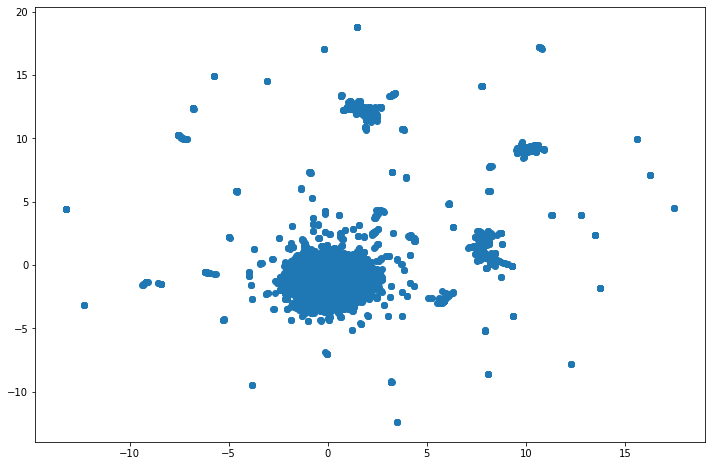

In [31]:

clusterable_embedding = reducer.fit_transform(bodytext_vect.toarray())
plt.figure(figsize=(12,8))
plt.scatter(clusterable_embedding[:,0],clusterable_embedding[:,1])
clusterable_embedding.shape
print(clusterable_embedding)

In [32]:
clusterable_embedding.shape

(5000, 2)

Clustering using HDBSCAN 

In [34]:
!pip install hdbscan

In [35]:
import hdbscan
import numpy as np
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
clusterable_embedding

array([[-4.8950920e-01, -3.2806990e-01],
       [-1.1058935e-03,  5.5059433e-02],
       [ 2.5588839e+00, -1.7326353e+00],
       ...,
       [-1.3986479e-01,  4.9470995e-02],
       [ 7.6288810e+00,  1.4469531e+00],
       [ 3.5888577e-01, -1.1643894e+00]], dtype=float32)

In [0]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
clusterer=clusterer.fit(clusterable_embedding)
 

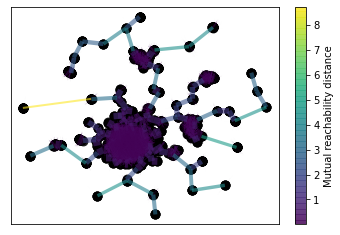

In [38]:
#Build the minimum spanning tree
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

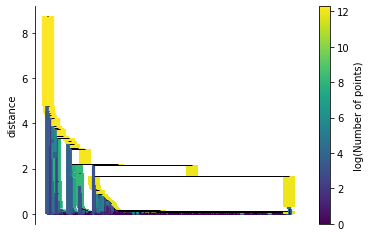

In [39]:
#Build the cluster hierarchy
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

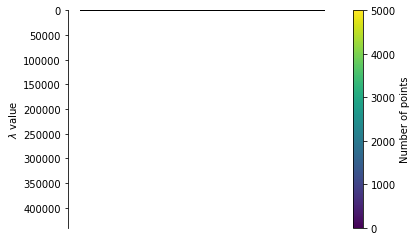

In [40]:
#Condense the cluster tree
clusterer.condensed_tree_.plot()

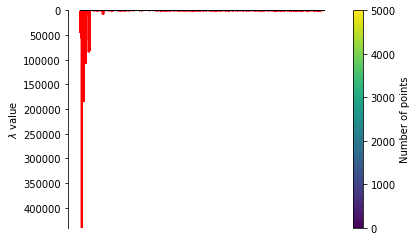

In [41]:
#Extract the clusters
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [0]:
#palette = sns.color_palette()
#cluster_colors = [sns.desaturate(palette[col], sat)
#                  if col >= 0  else (0.5, 0.5, 0.5) for col, sat in
#                  zip(clusterer.labels_, clusterer.probabilities_)]
#plt.scatter(clusterable_embedding.T[0], clusterable_embedding.T[1], c=cluster_colors)

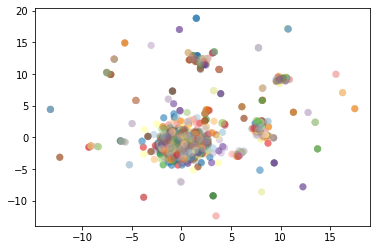

In [42]:
#clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True).fit(clusterable_embedding)
color_palette = sns.color_palette('Paired',max(clusterer.labels_))
cluster_colors = [color_palette[x] if x >= 0 and x<max(clusterer.labels_)
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                        zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*clusterable_embedding.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [43]:
clusterable_embedding.T[0]
clusterable_embedding.T[1]

array([-0.3280699 ,  0.05505943, -1.7326353 , ...,  0.04947099,
        1.446953  , -1.1643894 ], dtype=float32)

In [44]:
clusterer.labels_

array([ -1, 554, 252, ..., 536,  -1, 728])

In [45]:
len(clusterer.labels_)

5000

In [0]:
json_text['cluster_textbody']=clusterer.labels_


In [47]:
max(clusterer.labels_)

786

In [48]:
max(json_text['cluster_textbody'])

786

In [47]:
grouped=json_text.groupby('cluster_textbody')
for gp_name, gp in grouped:
    display(gp)

paper_id  ... cluster_textbody
0     85dfb59af4c4ec824f1f62c645e5b91a6e3cc814  ...               -1
5     94f679e7bf40010e41952e26e8953a5703be64c0  ...               -1
14    9ceee77cb6dcbc0a9568b770103698bb7603c97d  ...               -1
15    8fefbc58375c244a64a82e3f88c4084076838b88  ...               -1
18    8d4a2fb48616bae57771c62a5bcbaf86e08b8276  ...               -1
...                                        ...  ...              ...
4986  acd5cb2ba08da5c0f6bc310d74d497d38aa86be2  ...               -1
4988  8eef6fec694446e150e95dfbef3a3579ae8806d3  ...               -1
4991  aad76905ce54679c80b75e4ee35717c30e7e1099  ...               -1
4995  811338b8a1cbfa4bee7c50f6358230fe72f479ba  ...               -1
4996  9ca81dfa68fcbff13166d810aca929027bb3763b  ...               -1

[920 rows x 5 columns]

paper_id  ... cluster_textbody
755   f24242580be243d5fc3f432915d86af6854bb8b7  ...                0
936   e44870f75892595841566f6b64dadffdc731f615  ...                0
1197  3965a2d31b31a317f72d0f08695060dbd6952f82  ...                0
2339  247161ad51b7f362e9cadfcd39e94dd6a1a26ca3  ...                0
3376                                PMC7033348  ...                0
4496  4840f8430105778e9a8973743e866adad6254186  ...                0
4689  788836763ae8e19810db28eae9e90989ba498a94  ...                0
4736  7325363d061f0f4699e29bfa544438e14e7c207d  ...                0
4820  98629ae2533d73afbb0f5ef9d0cc813bf3afa851  ...                0
4875  bf3f1752cf136693453f34b968adcbae605fc38b  ...                0

[10 rows x 5 columns]

paper_id  ... cluster_textbody
924   e27e8c74a021090c4f54ccfca13646232741638a  ...                1
2286  2ba882c9ddb5e9db8ebb0db536788bff66b67f14  ...                1
2677                                PMC5945578  ...                1
2906                                PMC6348358  ...                1

[4 rows x 5 columns]

paper_id  ... cluster_textbody
292   b0d63875dbdde9df204257c33b47d6277c81b869  ...                2
705   e24e6736123c670928dd233196d473f81e998b24  ...                2
1869  6daf14d0342bca1c7e6c9f52a65ba4fa3fe618ba  ...                2
1974  84f8946f903a07243c54bde0a3e6d5ccecf9c5b9  ...                2
2913                                PMC6420165  ...                2
3378                                PMC2132526  ...                2
3723                                PMC3629412  ...                2
4699  7af6a15c35df8fed989119cc36b6679175d2a768  ...                2

[8 rows x 5 columns]

paper_id  ... cluster_textbody
2484  PMC5414027  ...                3
2665  PMC6151073  ...                3
3469  PMC2808258  ...                3
4199  PMC4564551  ...                3
4414  PMC3100511  ...                3

[5 rows x 5 columns]

paper_id  ... cluster_textbody
452   c7a3699cbb6e8ea60edabb60c0407883e6ed33f2  ...                4
1604  82b0cd320ba1e619c08fee764bec158f166fab55  ...                4
1896  8f4738cf871131429d4c4df364e86135e3f04593  ...                4
2054  0568c55234a6ad2585fe3ac5f3c51260194af7ec  ...                4
2714                                PMC5858665  ...                4
4581  6499f5c865c3db3bdfc1e969ea940a80d547a5bb  ...                4

[6 rows x 5 columns]

paper_id  ... cluster_textbody
835   ece140f2d510d370f594707b718066f7173a39e1  ...                5
1040  1e028783dd3a8a7dca6ee99c21277471571b4e1d  ...                5
2570                                PMC5264651  ...                5
2861                                PMC5652284  ...                5

[4 rows x 5 columns]

paper_id  ... cluster_textbody
747   ecf580f9baf30b1e7c860068c834f34d175dbda0  ...                6
756   dcd5c4f4081c90fa1c4672cbe00246e62dcc440a  ...                6
824   f7748ce96d52eeafe6b08a42b2f9f1774b373f78  ...                6
1107  4b3d6bca8bfe315d03331cba07299570e2ce7fad  ...                6
2495                                PMC5004452  ...                6
2623                                PMC5839790  ...                6
3003                                PMC6399092  ...                6
3779                                PMC4203519  ...                6
4326                                PMC5004442  ...                6

[9 rows x 5 columns]

paper_id  ... cluster_textbody
4528  4b5ba0d8c476c899a79cec7872f7d2287937a59d  ...                7
4552  500c5ea0961b573ba5355d364ca94c00a0a26e4a  ...                7
4585  5daceb492bad28a61fc43c4be83a164042d8c430  ...                7
4608  64b327001f8fa95b83dc23259a2ad617be12498c  ...                7
4609  7808e4cd470a379b12470833f4a6fc7e1b567c96  ...                7
4705  6ad14ceec74dc9b3d3dc6db7fc319b9dc22dc546  ...                7
4800  8df83cc50766ef007425f79d6220d66c19f73f63  ...                7
4843  acb0e11e5763dbf7588ec435751a2ab705a783f1  ...                7
4932  96ef1767754a53f792951ba1752440ae94e90c60  ...                7
4960  c08c3b98a956287a6eaf99f6d90969d7dd1410d1  ...                7

[10 rows x 5 columns]

paper_id  ... cluster_textbody
1139  3bbbbc7190599b47616269323cfbd3659d9dc420  ...                8
1815  824707a11a7f1be7be3ff651aaa43dda34ef59b5  ...                8
2664                                PMC6009648  ...                8
4225                                PMC4780872  ...                8
4267                                PMC4763971  ...                8
4939  99dab788e984601ee4efcd1138926caf10c00dcf  ...                8

[6 rows x 5 columns]

paper_id  ... cluster_textbody
711   f901f9949a8c6e53727335e92a39707e89965422  ...                9
1717  801e028d1c0aa75910dbe03019538ed0dc28b905  ...                9
2354  24df3883c547f5976077bc7a924eec9ae8fa9e71  ...                9
3419                                PMC2826090  ...                9
4413                                PMC2800238  ...                9

[5 rows x 5 columns]

paper_id  ... cluster_textbody
554   c4a46bccbf43ff75b7e20f5081f3c5b7a31b7b29  ...               10
1593  63aed9fa99e7df7846c24993fbf4d7aebb4d957a  ...               10
2226  2a1c5b2541cb958a6280094aa3c1cd2e414fb468  ...               10
2299  26fec23192bed03196a134abb20b8b197a2acc42  ...               10
2434                                PMC5092010  ...               10
3157                                PMC6216255  ...               10
4953  9fb5ca87ca47d35d87161158ae37fc0ca642c51e  ...               10

[7 rows x 5 columns]

paper_id  ... cluster_textbody
462   d1268a2b5aa5778f15fbd10152728dc936a6809e  ...               11
575   d25529180f950874e0b4f62a976959d683a2ceaf  ...               11
3403                                PMC3273816  ...               11
4447                                PMC1635287  ...               11

[4 rows x 5 columns]

paper_id  ... cluster_textbody
31    894e9a681490af51667a059d727a9cce8dddbf7f  ...               12
167   a0ee437d7eab376084d070124b4070598480a179  ...               12
931   dca3423350c6278fe7b9479eb894a578ffeeeb68  ...               12
1279  3062cebd70447841d68c48fe83f0eb51b07a761d  ...               12
2756                                PMC5707751  ...               12
3342                                PMC6889234  ...               12
3437                                PMC3236064  ...               12

[7 rows x 5 columns]

paper_id  ... cluster_textbody
363   a62d3eb969dc67dbfdba03ebf8304716137eaf6d  ...               13
635   c7f8f1365c454c71574aaaf83fa3d6bdd92e992b  ...               13
2247  2e16617b3004017c0f1c2fcbb140d70444fee083  ...               13
3203                                PMC6778745  ...               13

[4 rows x 5 columns]

paper_id  ... cluster_textbody
221   a4490fc5ca8fea133b9a5beb9258df89cf4945b6  ...               14
989   faec4bca24cb275ebc6c55e7cba3bd6a3b74df32  ...               14
3266                                PMC6938705  ...               14
3296                                PMC6865829  ...               14

[4 rows x 5 columns]

paper_id  ... cluster_textbody
349   b8b13fd5a49e6193135315c97de14fb7b9936286  ...               15
809   e1d7c0ed2db49bcc8e49814b1bb24bd01f9ba8c4  ...               15
2672                                PMC5779534  ...               15
3104                                PMC6522884  ...               15

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1342  5fedd08f111b588bface2d146740bad23bbbb3e3  ...               16
1501  59c84e06ac8246b44efc595cafef84b946f24219  ...               16
2035  05248494136966d79614f475f8e5bb0880a20bf7  ...               16
2798                                PMC5749487  ...               16
4204                                PMC4520955  ...               16

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1079  358ab81c15c1c24b69c02cfa8cf52069a7e2932b  ...               17
1826  71edbd57cdd9af956a12054932e0cbdb87ce1fea  ...               17
3353                                PMC7074660  ...               17
3700                                PMC4140326  ...               17
3838                                PMC3859855  ...               17

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1952  8793343683237029bac548225ba51f403489cd35  ...               18
2368  2d5eaeaa1aa523394ce7697d3cbe98381a2c1559  ...               18
3933                                PMC4978602  ...               18

[3 rows x 5 columns]

paper_id  ... cluster_textbody
813   de3e0083918cb84a1b2df214b7cd898afbe12206  ...               19
883   f4998df4f550be136b50f7d4d6234e2cf916b583  ...               19
1423  665622d28864a2df5caf4f9fdb8ebe97a0aedd8b  ...               19
3057                                PMC6531831  ...               19

[4 rows x 5 columns]

paper_id  ... cluster_textbody
877   eaeab732c9c3e204526d8e1ea34cf40e7f37731f  ...               20
1665  6d59ebd9375d41f107b221988db5081f4c20d8c1  ...               20
1765  723d2ca57cbcc702c68347fb8183376d16d80f1a  ...               20
2410                                PMC4991744  ...               20
2923                                PMC6639469  ...               20

[5 rows x 5 columns]

paper_id  ... cluster_textbody
326   9f9327703d4203ad1f26dfea48d1a0226e6dd5d4  ...               21
3884                                PMC3390060  ...               21
4103                                PMC4386240  ...               21

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1322  41199e837e1c706b7a8a1a8a0970856974235566  ...               22
1654  82dcb53e236df1adb5c3c9f5291dc4e8eabb354a  ...               22
1660  725f0a6590f20c15be0ae719463c0624a34ee1af  ...               22
1824  824e4aebd39a0531625542fb7328917bb061e5a4  ...               22
2635                                PMC6190919  ...               22
2636                                PMC5697698  ...               22
2830                                PMC5738538  ...               22
2904                                PMC6345639  ...               22
3097                                PMC6659456  ...               22
3837                                PMC4267971  ...               22

[10 rows x 5 columns]

paper_id  ... cluster_textbody
438   cf410c7fd76487d1244517521fbe521465e75310  ...               23
2941                                PMC6582406  ...               23

[2 rows x 5 columns]

paper_id  ... cluster_textbody
420   c97243d65788222d1cf09203e27ae04deaf0ef1c  ...               24
1017  26cb41132d945aa5cff35a80761daf086a4375e0  ...               24
2129  0adc0c7498f0ebbb3c8f1c662da34605d5f91fe2  ...               24
2875                                PMC6174684  ...               24
3506                                PMC3361041  ...               24
3758                                PMC3948575  ...               24
3960                                PMC4621204  ...               24
4071                                PMC4431472  ...               24

[8 rows x 5 columns]

paper_id  ... cluster_textbody
250   bb65c5259727bce9f1623452a0af39aa57f9b1bc  ...               25
955   fbb2b307ad6be9561286c3b8a9114d283fb2e224  ...               25
1222  3f5d545fbca8b7c83ff7b10f827d772cb0011aa4  ...               25
2206  15f57ae58cbfdd0616c570508ce0471bc4dacebe  ...               25
2426                                PMC5085274  ...               25
3065                                PMC6511627  ...               25
3795                                PMC4186572  ...               25
3994                                PMC4780195  ...               25
4131                                PMC4403815  ...               25
4328                                PMC5617848  ...               25
4516  4ce668fe6eee9f59ed5ad0dfc0e9787777acd3be  ...               25
4897  9c32d461dc9d4737756a990cf13bae1a03e078a9  ...               25

[12 rows x 5 columns]

paper_id  ... cluster_textbody
241   a2d7c5fc05284d7176ae30fd6fe4967cdc111f10  ...               26
2109  0b2c383c48f644edcb7c4dcf40046bd58dd5e0f8  ...               26
2186  2c074099e6063fd2570cb173900da087fba991f5  ...               26
3123                                PMC6201323  ...               26
3962                                PMC4480260  ...               26

[5 rows x 5 columns]

paper_id  ... cluster_textbody
187   a38e42b1f6af103e0fca657462dc516ad51cf7e9  ...               27
1230  476248087d96cd15553d7a7ebb99f2b9169d6b33  ...               27
1276  4327c3ea2772234a8f546e73f9fde05ea49fbfe8  ...               27
2125  0892a219a7caf18088f5e3a331ec01b6912c9188  ...               27
2506                                PMC5335763  ...               27
3176                                PMC6715885  ...               27
4370                                PMC5462650  ...               27

[7 rows x 5 columns]

paper_id  ... cluster_textbody
49    8c8c5fb760997ded36fe4ae8fc77103ec66f9d14  ...               28
1954  9a8ffb71928a37a550e689f36fa3196493e036fe  ...               28
2396                                PMC5489272  ...               28
4433                                PMC3260743  ...               28

[4 rows x 5 columns]

paper_id  ... cluster_textbody
995   fc363739ad7ec8d796aba6af478d986a4c0f5f3f  ...               29
1573  533f8d39de2e16fb92614d2441621e8fddd85bbe  ...               29
2134  0f0bb7346d45679cc1bb2435c66d5ad3ef52c108  ...               29
2530                                PMC5500737  ...               29
2791                                PMC5780124  ...               29
4135                                PMC4472542  ...               29

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1382  5ca05808cfc6d2139bc1ab6112d67dff9411f9ce  ...               30
2728                                PMC6068295  ...               30
2768                                PMC5745179  ...               30
3145                                PMC6635179  ...               30

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1428  5af9c3bce43b90c81887d5102c0e5c114d40f5dc  ...               31
3624                                PMC3573664  ...               31
3852                                PMC3509437  ...               31
3885                                PMC3546555  ...               31

[4 rows x 5 columns]

paper_id  ... cluster_textbody
600   c7a16d3975bbb4ad4f44786d1e5961d16d21f863  ...               32
844   f6cb05b1b2874e3aabdc66876575cda7d7477d31  ...               32
912   f91911b6a25c970324854df7b87c550ae7fb878f  ...               32
1355  5cba1e45c2829cb0ebaa7bf5384fa685f543c6d6  ...               32
1375  630a6b5851e9d6362eb68f157fa704bfd97f1705  ...               32
2151  05cc87a56d714cc75ce393c73f3076d3f8a463b5  ...               32
2200  14e7bfe37c331fdf83f54808418cae7129a653a0  ...               32
2708                                PMC6149024  ...               32
2881                                PMC5797860  ...               32
3021                                PMC6739741  ...               32
3043                                PMC6305510  ...               32
3557                                PMC3234644  ...               32
3628                                PMC3942943  ...               32

[13 rows x 5 columns]

paper_id  ... cluster_textbody
1700  839df627ece5b5fc7bb1ce3b4f96127677fd0494  ...               33
2963                                PMC6668225  ...               33
4284                                PMC5540962  ...               33

[3 rows x 5 columns]

paper_id  ... cluster_textbody
168   abb4c06114edb9aa57132be9201478ac965a56ba  ...               34
2663                                PMC6082671  ...               34
2809                                PMC6125687  ...               34

[3 rows x 5 columns]

paper_id  ... cluster_textbody
606   d1b24d21f2004ee1ed983d5fd7526ff2809443e6  ...               35
1256  316e6c4b01e43b8cd81a65905c749f3f0f8aeff2  ...               35
2043  069695d115517cbd0e713fb44245be7a6226bc7f  ...               35
3195                                PMC6205567  ...               35

[4 rows x 5 columns]

paper_id  ... cluster_textbody
217   ab9f42b60b4b861c61c542f1b2fadbc8c27a7085  ...               36
312   a8f26d4aff2063c5a6476debc1c06e55a210998c  ...               36
480   c64f469a3115f900053a2313679efdf81cb35741  ...               36
753   db20f62a0cf1a00fc1860d2ce41c2d60ac7ae49a  ...               36
1993  9ddb63e47ae59fb8d315bfe119d9a1a3426af592  ...               36
2461                                PMC5052379  ...               36
3244                                PMC6852529  ...               36
3315                                PMC6895754  ...               36

[8 rows x 5 columns]

paper_id  ... cluster_textbody
371   a93ae58385828b5de96f52d447e0305af7dbfe80  ...               37
871   f510e7651315b8a000b2271107451ba284f10292  ...               37
1672  8016c07acf423bde29ea3e2742fb37286a9b013a  ...               37
3284                                PMC6864588  ...               37
3835                                PMC4277684  ...               37

[5 rows x 5 columns]

paper_id  ... cluster_textbody
125   b55c993891c702e7ec32d579fd90f380c3814ab9  ...               38
1438  57f7bd687c1b968f782d3a1aa7f7fd051acdcaee  ...               38
1965  8adc81255b4ba0eb48cbd7ddfe86f13959f39c7d  ...               38
3201                                PMC6296008  ...               38
3350                                PMC6882434  ...               38
4014                                PMC4787807  ...               38

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1458  517a18c4e5361428fc6881cf01af64e0e8edba51  ...               39
1632  82f9d88193226177c20342d42a29a26ebba90fa1  ...               39
1709  84d00088f2124eac73c0e79cb15fbe4924109178  ...               39
2131  00676f1131e03ca8defe523e79bc1635cc933909  ...               39
2543                                PMC5454179  ...               39
3118                                PMC6767964  ...               39
3164                                PMC6361340  ...               39
4036                                PMC4945730  ...               39

[8 rows x 5 columns]

paper_id  ... cluster_textbody
647   c1a29945f51707d279560855da521ea878989333  ...               40
1539  5650690daf962117b9831c42178ffd6a6a969300  ...               40
3709                                PMC3520110  ...               40

[3 rows x 5 columns]

paper_id  ... cluster_textbody
367   a67012609fad77c2a1dc55f139b044c546cd13a8  ...               41
859   f726b9f9f1737e712581e2f613a68fed62a48eca  ...               41
1270  35ec885b13ad96752433a085e543db81dd1d80df  ...               41
1680  7ab7699be02b690053288d296a55d2cead606c40  ...               41
1938  95cc4248c19a3cc9a54ebcfa09fc7c80518dac5d  ...               41
2889                                PMC6457931  ...               41
3063                                PMC6614802  ...               41
3714                                PMC3977350  ...               41
4136                                PMC4453530  ...               41
4796  672865cb53271ddd7dd4a32a9c35801825b73fcb  ...               41

[10 rows x 5 columns]

paper_id  ... cluster_textbody
59    8d88a7096820fcfb637b56b5563868c866ec692c  ...               42
1969  945b14460fc5e5d75092e4dd06bb09be03f10118  ...               42
2640                                PMC5910645  ...               42
2933                                PMC6600605  ...               42

[4 rows x 5 columns]

paper_id  ... cluster_textbody
754   f794f4f008a3e169fc5c4f99c586355594caa296  ...               43
1370  5088c438f1abf85269f0baa73779d6b7000fc10f  ...               43
4921  836190d366ba8e34c3a5df8a24d17a36fd503505  ...               43

[3 rows x 5 columns]

paper_id  ... cluster_textbody
215   a115a8a0855caf0b3a5f16bf05df25369be11d54  ...               44
920   ecd341e70316d124587fb8370d949fbf5524bd2f  ...               44
2544                                PMC5109928  ...               44

[3 rows x 5 columns]

paper_id  ... cluster_textbody
95    8d21989761b3a358d565559bade36a9b8654dd78  ...               45
695   f59470fcae185cd02092b4e6e986a558ab811e92  ...               45
1030  1f3b676368e5c9a1582ab624cbf0884c383fddd2  ...               45
1907  98227f184bc6a0b098b4ae6387f97264aaf13654  ...               45
3439                                PMC3203594  ...               45
4363                                PMC5389563  ...               45
4379                                PMC3001050  ...               45
4417                                PMC2836554  ...               45

[8 rows x 5 columns]

paper_id  ... cluster_textbody
50    998472a6428c367f65d047147899c5583db27ea2  ...               46
366   bbfbefd19c9c471dbacabd1f57124d1ad36f24f5  ...               46
3445                                PMC2896119  ...               46
3924                                PMC4093518  ...               46

[4 rows x 5 columns]

paper_id  ... cluster_textbody
42    89122ac5b68dcc5252569b3be17c47f66385b7fb  ...               47
407   cc2b11f9366012c6c2f68a19608216bd33c3f9bd  ...               47
1135  4a8c5f46f5d234453c3c498a85a2ffb261e584c4  ...               47
1715  83e5553035f500f4bcc4aeeaa41aa74ebf578567  ...               47
2799                                PMC6042015  ...               47
2989                                PMC6517316  ...               47

[6 rows x 5 columns]

paper_id  ... cluster_textbody
130   b1a61e5a2eee47ec7d39715451c05879d11a5de0  ...               48
716   f9ab7be2819a84d05b21829fdc79e1616779bc9a  ...               48
963   fbf3cc84b1d412693330fffee86bef8fbdda3b07  ...               48
3249                                PMC7052511  ...               48

[4 rows x 5 columns]

paper_id  ... cluster_textbody
311   b6b49bfba83105940015b7b8280db74ce480c65c  ...               49
850   db94e7aa6b683896a9ff5a239003a0c351f60041  ...               49
1308  37afb28ad52f876fd3473878e7990165663f3bd2  ...               49
1385  4f8d0dce755f89c22c48c301fe55a457c8ed715b  ...               49
1611  6a2d45016115d187120a5c232f671df30422870b  ...               49
1899  8cfe567d42fa459cb4364e240ddfe29629d03f85  ...               49
1912  956f777cf3a26f2989c840cbb927ac552b95732e  ...               49
2737                                PMC5705478  ...               49
3162                                PMC6275129  ...               49
3248                                PMC7044566  ...               49
3293                                PMC7050048  ...               49
3667                                PMC3935109  ...               49
4286                                PMC5603477  ...               49

[13 rows x 5 columns]

paper_id  ... cluster_textbody
858   e46e1768a48965ba42073cc744b7278055859174  ...               50
2929                                PMC6503696  ...               50
4087                                PMC4835433  ...               50

[3 rows x 5 columns]

paper_id  ... cluster_textbody
666   f9738261ac322d052e519fb1f1297eedc917a939  ...               51
1068  3b299c75b42f7b4119456256518d2d8753d74838  ...               51
1540  58a0c3ad6fd3ce5eae8b1199bd8e04ad8dadac81  ...               51
3429                                PMC3183689  ...               51
3825                                PMC4240341  ...               51

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1252  4a758df0843f5c4f55d49cf8e47098ffcaaa6022  ...               52
1702  71cfde6386e0b6e76c9ea4169fe99176b97094e1  ...               52
3150                                PMC6252006  ...               52

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1384  4ca26be0493fc360519e7586ec0392760846d662  ...               53
2303  26360be96ced1f242e01966b0d152c32544f3d60  ...               53
3044                                PMC6518468  ...               53
3826                                PMC3774192  ...               53

[4 rows x 5 columns]

paper_id  ... cluster_textbody
2070  01b3d789dbd69fff374842fbe2d7f4150fb3d8f5  ...               54
2117  06137bb1e53080493b33c1b749b59848cddc05fc  ...               54
3774                                PMC3458567  ...               54

[3 rows x 5 columns]

paper_id  ... cluster_textbody
81    9a4c0d0a76e1ecd99c5a45fe8ff2a96aeff0fc2b  ...               55
1020  1d81eea0f16b71d643336838cd22e51125bf05ef  ...               55
1732  81a11c6680ce725535704809655d945cd1d4a088  ...               55
2517                                PMC5449628  ...               55
3372                                PMC7026636  ...               55
3485                                PMC2794165  ...               55

[6 rows x 5 columns]

paper_id  ... cluster_textbody
181   b416c44441bd1db0d8d535fa8046434a4ba0a357  ...               56
1550  643f2dd329f342e9e85753ab315722bc1120d0ef  ...               56
1584  61112e6252f461836d68ffdfba97c244e5b70569  ...               56
2266  194e0ecf9452eefbaf8b2e487805ef5960825318  ...               56
2532                                PMC5517379  ...               56
2755                                PMC6011136  ...               56
3999                                PMC4600707  ...               56

[7 rows x 5 columns]

paper_id  ... cluster_textbody
301   aa27ee27248b8daab7e85d3fd1044383876b099a  ...               57
533   c23db0f0dc55dea350cd7e27939acad930c6c85a  ...               57
3269                                PMC7000305  ...               57

[3 rows x 5 columns]

paper_id  ... cluster_textbody
710   db4a4b2bde1bf1bb981bf87f9c6c25462834a25e  ...               58
1150  377e2c575da8f034d4f9f34d7ad6c4395487f348  ...               58
1499  5ed43fc646fb368da6a9cf9d0029891a4b8248d1  ...               58
1625  7f69a764a32e9fefc971d79582da33db151cdeb5  ...               58
3089                                PMC6363457  ...               58
3363                                PMC6990648  ...               58
4472  41d412415c46baf70ca91ebf049c0352ead19f18  ...               58

[7 rows x 5 columns]

paper_id  ... cluster_textbody
621   c2ad458ccf62686e340e51ea95c439e7c4e2bc29  ...               59
2056  0a64b2c55fc2091358da4f83ac6fdc7701ddb46e  ...               59
3923                                PMC3561942  ...               59

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1013  2606e22c2560b4cc0909c102ee356d562d78a9f3  ...               60
1309  37ab0d36dd92298368b797e0770ebfa03a36eca8  ...               60
3471                                PMC2995055  ...               60
3585                                PMC1802563  ...               60
3731                                PMC3438601  ...               60

[5 rows x 5 columns]

paper_id  ... cluster_textbody
514   c3e25d0cb02656c82dfac2860225f14588489066  ...               61
2373  26e505b0228a95ae17d9dfee8ce18ff2af4ddb0c  ...               61
2454                                PMC5111008  ...               61

[3 rows x 5 columns]

paper_id  ... cluster_textbody
520   c745ca78351211b549476ef12e4cccf3fc3f5b84  ...               62
2401                                PMC5203785  ...               62
4158                                PMC4634622  ...               62

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1193  416c18fdc648694ae3865e39b522edb784a12041  ...               63
1497  4e9acd476a5b8224baf48582bd4f4c095feafe27  ...               63
2251  15a0a1f83c9f096d245ed2c77d96f3bdf0a2f95a  ...               63
2586                                PMC5441328  ...               63
3935                                PMC4803184  ...               63
4055                                PMC4631129  ...               63
4291                                PMC5253590  ...               63

[7 rows x 5 columns]

paper_id  ... cluster_textbody
534   c123770a0567eeea72f4df1a2004585732e08198  ...               64
1716  68e2c47647afe4bf0237d9f17bb7787738fc8663  ...               64
2788                                PMC5888411  ...               64
2965                                PMC6718828  ...               64

[4 rows x 5 columns]

paper_id  ... cluster_textbody
798   ee254e8dd94c816c9b5cd80c56b4b7e07eb5aa03  ...               65
2384                                PMC5467638  ...               65
3086                                PMC6734950  ...               65
4210                                PMC4769323  ...               65
4381                                PMC2982091  ...               65
4852  b9dbb79c9e06164c3b7fefce67c11c5d6caf1fcd  ...               65

[6 rows x 5 columns]

paper_id  ... cluster_textbody
117   93dae518889d2a93960963fa3e99158f58738eda  ...               66
659   fa994c4585ad68547b8a9fd973109d183fe8b71e  ...               66
1633  6bdb41aa63efed5063efbecbb615896b8ea4ae5e  ...               66
2824                                PMC6188560  ...               66
4423                                PMC2885272  ...               66
4482  45f184e736c4a857bc0e3df0d55962f743c1493a  ...               66

[6 rows x 5 columns]

paper_id  ... cluster_textbody
253   b616293107ee48ebc8884fc55ebc66965df4feb8  ...               67
373   9f7ffa3a1bbf4a6ad9e71f2377fb45564589d415  ...               67
385   b6ee8c246cde8fc8ab8df4d3e287ca0ca7679532  ...               67
394   cfe337afa069a02e96adf6894819e7928f8c4534  ...               67
1188  3c6601ba74b263d57b6b7fc0fbb7868d6ad2b107  ...               67
1446  52cc80efbb69d917fa6d4ad3f34f73124ea27ee8  ...               67
1651  7048d2fc8e7a1daab3747ea6d2257a874a9723b0  ...               67
1757  7ca300b9a142c9df5da9d660610782ace344a412  ...               67
2460                                PMC5487798  ...               67
2842                                PMC6125856  ...               67
3170                                PMC6409222  ...               67
3691                                PMC3973770  ...               67
4315                                PMC5089651  ...               67
4339                                PMC5095633  ...               67

[14 rows x 5 columns]

paper_id  ... cluster_textbody
998   fdb66dfc7edf5a86eb121409bf6db0c0c59eded7  ...               68
1359  53f9b02ce4cc149507a9d402dcf9d4c191b3bb29  ...               68
2872                                PMC6035330  ...               68
4165                                PMC4677596  ...               68

[4 rows x 5 columns]

paper_id  ... cluster_textbody
51    927e00e594ec72a344b692093b2f3f77bbd911f4  ...               69
2346  11def60675b38fbb811f2b7a9ad62f5d938c8956  ...               69
4123                                PMC4542295  ...               69
4137                                PMC4659882  ...               69

[4 rows x 5 columns]

paper_id  ... cluster_textbody
251   a2add35b84a53cbad3301093f4191d5edadf1d0e  ...               70
337   b10c26fb4aa979ef7068dd295b28176e2fe5a692  ...               70
875   ebc7bbdf4d1954bd8575aa830977118cc1990759  ...               70
1142  47bd7df352db2b1b093566b04fc328d6f0292c1b  ...               70
1605  80cdffc26a496e89e2d94c7478749adbabafe180  ...               70
2201  2c70242370bc27a555b206e5bd62b68f1edb772d  ...               70
2986                                PMC6380834  ...               70
3990                                PMC4604269  ...               70
4101                                PMC4676640  ...               70
4239                                PMC4676647  ...               70

[10 rows x 5 columns]

paper_id  ... cluster_textbody
1733  734f6b97fbdf729498fe7077f74f49db8311d2b9  ...               71
2209  1d8907508d6c233f454408abbfd624a9fda81f37  ...               71
3626                                PMC4149400  ...               71
4174                                PMC4945721  ...               71

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1898  98364308fd44bb4fb686480fb10c968e918715f1  ...               72
2256  254270af7f396d35475aee946cc1b3f9a3694e29  ...               72
2428                                PMC5447409  ...               72
2973                                PMC6683984  ...               72

[4 rows x 5 columns]

paper_id  ... cluster_textbody
23    945fac2c9ade4e451cc0cb8388cf9de8b2f00a47  ...               73
2103  104e60eede9e4016c243f20f4541a33852ea3d1c  ...               73
3042                                PMC6477548  ...               73
3493                                PMC3329602  ...               73

[4 rows x 5 columns]

paper_id  ... cluster_textbody
751   da5f78374b6b0b58d01188a2029fe9d74336e473  ...               74
1152  35644bd7e541cc18e4aa1810ca2a501a4b61c18d  ...               74
1339  5ea6161f1a3799d02f910658992bc4df2a1cefae  ...               74
1895  8b9992937c24368f15eb03e7009ba85beadab1e2  ...               74
2157  01af2562df4acf3113843d039c3b82bb801b1427  ...               74
2536                                PMC5137331  ...               74
3305                                PMC7008051  ...               74

[7 rows x 5 columns]

paper_id  ... cluster_textbody
164   bbf70aeba7b4a4b8d96db253e673881ac220e36c  ...               75
601   c84df8edaeb086178a5dd8e6617367eedaebe283  ...               75
2383                                PMC5014526  ...               75

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1996  854545208a6bc7cafa8744604899e32237ff2047  ...               76
2683                                PMC5647739  ...               76
3507                                PMC2628066  ...               76

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1551  5f7bc4da553becc28ba03a2ac4a98133d4689adc  ...               77
1798  67a530bb1b7075edffe904df66644b0a1da97d1f  ...               77
3745                                PMC3888612  ...               77
3877                                PMC4117846  ...               77

[4 rows x 5 columns]

paper_id  ... cluster_textbody
12    95c40fb092ef550e2c0d8316a3af2d6c025df87d  ...               78
1887  93df1925c1aa0cf7e721ebcbaed2d261c032d925  ...               78
2856                                PMC5854841  ...               78
4095                                PMC4599061  ...               78

[4 rows x 5 columns]

paper_id  ... cluster_textbody
937   dd0d61765564577b04e2b012930936fcb7b3f7fc  ...               79
2957                                PMC6369131  ...               79
4146                                PMC4541644  ...               79
4147                                PMC4716282  ...               79
4262                                PMC4495271  ...               79

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1215  34a942268ef93e2776d5074b3fb75879858712b6  ...               80
2409                                PMC5592190  ...               80
2760                                PMC5912494  ...               80
2886                                PMC6354037  ...               80

[4 rows x 5 columns]

paper_id  ... cluster_textbody
927   f6e985e472df7bba7a7ef1568336c0443b919639  ...               81
1690  7db910e35a0a22ccef05b0a5b4c9789acfef2daa  ...               81
3845                                PMC3494269  ...               81

[3 rows x 5 columns]

paper_id  ... cluster_textbody
592   d062f22e831a424fc1bd0ebdbcad0175926d6038  ...               82
684   e18773ecee762195cee18f1b3d83ef02f2db0dc9  ...               82
1101  41dbdff55ea607010728ddec2392436ef6dfc325  ...               82
4619  6b3a290581a7a6354807bd0b2d9a9ff0030fa99c  ...               82

[4 rows x 5 columns]

paper_id  ... cluster_textbody
52    954d000b2e7252ffb05812341a6436d3d784494a  ...               83
1128  3ca41eba26adc5422815f1d8043e76b406e747bd  ...               83
4122                                PMC4945727  ...               83

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1053  335dbf8f43a8eca80f3e2730b3f8a1e655ca2d14  ...               84
2150  03ad1cf472c9636fceb1b800c553fde73724e349  ...               84
3938                                PMC4769415  ...               84
4240                                PMC4776270  ...               84

[4 rows x 5 columns]

paper_id  ... cluster_textbody
928   e1b312167d5ea6a1ed3c071b05b7bd0a48a975df  ...               85
3224                                PMC7059523  ...               85
4234                                PMC4676643  ...               85

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1379  4c2d4f178e651c9c11727d29a16d4d28b08110cc  ...               86
1536  5ba2228dbf968996a9e05910fb0126e1851b89a8  ...               86
4200                                PMC4634784  ...               86
4289                                PMC5462161  ...               86

[4 rows x 5 columns]

paper_id  ... cluster_textbody
566   d14208a77004363b34b3cf0b7d08fd0d121e12a4  ...               87
1832  7f7c8429d7011635b8f8a3415e6ace00c2bf4df0  ...               87
1980  99fded56685ed6b4746525a997568696de2befd4  ...               87
3912                                PMC4142259  ...               87
4301                                PMC5014217  ...               87

[5 rows x 5 columns]

paper_id  ... cluster_textbody
605   d71ce9edcc0e1fdc375e7aadb23b21aea86ff228  ...               88
1155  3aa2b50cbe082c95f23df885e74ca9648046d10c  ...               88
1739  6bb631f4a1c7c8c53d07c971b5e52a2563c66106  ...               88
2893                                PMC6289945  ...               88

[4 rows x 5 columns]

paper_id  ... cluster_textbody
183   b3c71d9d7dd9758f8328933f47d7d460bf24c98e  ...               89
1563  657558034931a24e09f761877fed36cb70f4f6fe  ...               89
1677  7818d1ffe60f6ea1d6b44e73402132ce41453ab2  ...               89
2155  0c83fb7b5413cd36d8ca958f15e7640636c8e730  ...               89
2568                                PMC5489471  ...               89
2763                                PMC5738603  ...               89
2772                                PMC5795046  ...               89
2835                                PMC5799402  ...               89
3939                                PMC4829501  ...               89
4187                                PMC4453528  ...               89

[10 rows x 5 columns]

paper_id  ... cluster_textbody
1041  254c09779d5d51cd41becfb1ef4d3fcb08a0ba8f  ...               90
1208  2ffacfd58f57a95344119c15d27560cdeaea2285  ...               90
3386                                PMC2779236  ...               90
3892                                PMC4195833  ...               90

[4 rows x 5 columns]

paper_id  ... cluster_textbody
199   aeae7709de0f5cc24b6e055115c3105f44da9c61  ...               91
204   ba4844fd689c46fec13b4c5f8f184bb3b02f0d4a  ...               91
333   a6436446abe06cc9a0991752d5cabad51f6b0d7e  ...               91
717   e3298846caa5271bd93b410c46b8ab6cee3eff8e  ...               91
1726  78dbccb9c48475f599da9922e4ba3f039a224997  ...               91
1845  81b22a5b5989dfc8f57c6d05fd29d3c735785887  ...               91
2626                                PMC6082650  ...               91
2952                                PMC6715958  ...               91
3008                                PMC6462540  ...               91
3931                                PMC4441753  ...               91

[10 rows x 5 columns]

paper_id  ... cluster_textbody
258   aaeb1b254b13be853e9401cacbf8d18a6b5b3236  ...               92
1397  509eaf8fb436b60e6d84da002b3630d62b39309e  ...               92
1656  6db877f61327ae24341591d620abda3793639462  ...               92
4083                                PMC4600119  ...               92
4155                                PMC4713849  ...               92

[5 rows x 5 columns]

paper_id  ... cluster_textbody
4475  43f760b5cb9c3b430c6d0b31fa90d42e71a6429c  ...               93
4537  4f5f812dec32f2da50e3b8bb7a63626f45933f6a  ...               93
4695  607e0074d8ff40c272b958c2fe48793fedfc785e  ...               93
4773  516415a9a48ce502ff279fcaebcef641fa74c630  ...               93
4790  6c76fe66d27d9c9e1c47b943e497309cf58bd4e4  ...               93

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1419  57c47ce2ae13578c7611519312f09871bc0c6eda  ...               94
2304  1cf06efb631fff1394f207cd3ad09376ed85f8cb  ...               94
4574  6f86b074f8b9da74fbf32a1886f143cbd9aa5ca2  ...               94
4580  602bd8abdd8f0d464941d989322e843533cea15d  ...               94
4657  70e1f2a0ff48a5d24e75fc2920d757968b224d79  ...               94
4667  622580ea34c3acc011faa7573bc549e34078edde  ...               94
4768  54cfc3c68e1e4832fee5b3294e5673e37978ebdf  ...               94
4803  86b6b0c1b2777541feb83116bcb7a5cb12a52310  ...               94

[8 rows x 5 columns]

paper_id  ... cluster_textbody
570   d02f9e2414da034e0aded233a37de3077f40c93b  ...               95
582   c6ea09cae9a6185a84ab731e86257d6507f5a102  ...               95
3587                                PMC2396423  ...               95
4452                                PMC2770676  ...               95

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1140  357fe51849c655d37552b3f96c67be8394a9b6e5  ...               96
2101  05e5a2bca07922fe0bd52185f4ccaae1b8b154f6  ...               96
3944                                PMC4940489  ...               96

[3 rows x 5 columns]

paper_id  ... cluster_textbody
817   f92cd3c86281eee402ab60a75990ae6bb57b3c35  ...               97
1517  663f66630b5b3b7914dcbcaed555d5865da925dd  ...               97
2432                                PMC5587821  ...               97
2551                                PMC5565944  ...               97
4116                                PMC4940488  ...               97
4261                                PMC4773263  ...               97

[6 rows x 5 columns]

paper_id  ... cluster_textbody
121   b36310af655a9ba95c32c0d8e88e5fb445edb7a1  ...               98
1367  547c947b76652a41fc9a598d8e3b97e2e5cf0ae0  ...               98
1626  79d74f550f25e52d549aa795801c0d8eb8c46dac  ...               98
3272                                PMC7068636  ...               98
4639  53326420d7eb607538a248c0da27d3b092f651e2  ...               98

[5 rows x 5 columns]

paper_id  ... cluster_textbody
38    91b8cb1041fbbcc5774eb5d1634da179e3a78b61  ...               99
1561  50627f92db9c17c742fb2cc95641bad921bec3ee  ...               99
2015  05cf81cc55f7a6f80902a671cac49d85af9782ed  ...               99
2534                                PMC5172416  ...               99
3851                                PMC3622931  ...               99

[5 rows x 5 columns]

paper_id  ... cluster_textbody
598   d4ae876b5fb0b3c64650915ca3970c0a58d6433c  ...              100
2139  091b857ba8a07eca145ae411f7202ca3a4d970df  ...              100
3220                                PMC6881700  ...              100
4154                                PMC4554399  ...              100

[4 rows x 5 columns]

paper_id  ... cluster_textbody
2556  PMC5143288  ...              101
2617  PMC5990444  ...              101

[2 rows x 5 columns]

paper_id  ... cluster_textbody
365   a0e5f386820398978cd41131434313e6d70bcfff  ...              102
1768  7e0195ed4cec2a365ca4668e68a6b8ebc29e7d83  ...              102
4113                                PMC4699381  ...              102

[3 rows x 5 columns]

paper_id  ... cluster_textbody
558   d5b981ab9223ede1243af2a7030ced8570c82edc  ...              103
2063  03d3f764353cecb297c318e55b88be1d5664bf5c  ...              103
2492                                PMC5349256  ...              103
4181                                PMC4869630  ...              103

[4 rows x 5 columns]

paper_id  ... cluster_textbody
227   ae8ccebf81f9909e96af7c707cca66e5ed716b1f  ...              104
442   c3e0344db3d8c5e2bb35c3d001d480f3890656f2  ...              104
1835  7e2390fbb36e75e858fe46a1c81266144ab176de  ...              104
1947  8ee4731a0d1dabf9a61a177aed392c62ca6fb69b  ...              104
2009  116c94dd67777e0c9806ef56974157060f5cca4b  ...              104
3886                                PMC4184620  ...              104
3989                                PMC4689825  ...              104
4124                                PMC4810350  ...              104
4354                                PMC5565921  ...              104

[9 rows x 5 columns]

paper_id  ... cluster_textbody
190   a396657b0c580d496e109b82967c1a89d191ee9b  ...              105
1422  560c831e215a39066388a9b94b7a576407d2d3f6  ...              105
2832                                PMC6039859  ...              105

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1935  984eadbbf4721358284d04dac03f26a28cbe0a8c  ...              106
2130  06c89f69aa7b5f9648d2c1543b8246fe9c3610cf  ...              106
4641  59eab95c43fdea01481fdbf9bae45dfe28ffc693  ...              106

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1924  8fc2cebc69f892528d29293bc14ba94237cfd77f  ...              107
2086  00e5a723d44eb9f2698c38b518eff85c00f9753b  ...              107
2213  140e6d0298bfcd1e825a4b81dcabc50d1658357a  ...              107

[3 rows x 5 columns]

paper_id  ... cluster_textbody
697   dcce6e45fd562d7a15633fc5a55aed8d3ce37f49  ...              108
2025  0346cb9d0f5b07fe50d9a3cc0378a53f1a87708c  ...              108
4023                                PMC4447251  ...              108
4045                                PMC4611038  ...              108
4115                                PMC4542194  ...              108

[5 rows x 5 columns]

paper_id  ... cluster_textbody
434   beb38f99a59fa3129e34eadfc28c9d46438ec820  ...              109
730   e484923f000ae4706e2213031654865cef348def  ...              109
803   ebfe84418eef9017bbf2bdb93d8bebdb3eef8eac  ...              109
1151  496c9b4e424bc052895fd0c9446e14f565dcaae5  ...              109
2477                                PMC5454172  ...              109
4133                                PMC4745090  ...              109
4739  77a04c5091c0457ad305691d4d4f24354d6bae79  ...              109

[7 rows x 5 columns]

paper_id  ... cluster_textbody
522   c3e846076762b54e33385752eb27e086f6cb8b72  ...              110
2053  0ce1f213337247a67628f95cf699bdabddc94d9c  ...              110
2127  04421db3d34e7fd7c7486d66d21b34978a1fb362  ...              110
3701                                PMC3950709  ...              110
4419                                PMC3150756  ...              110
4442                                PMC2957079  ...              110
4635  7d98a73314cd9f923aaa367f3f4de056b8cedec5  ...              110

[7 rows x 5 columns]

paper_id  ... cluster_textbody
36    92b6e41df821c7c137bfa56339734cee1715df3d  ...              111
1618  84c860b82c331e08dc0269ef951de3b53dee41d8  ...              111
1801  7e7c6670854897412ce9930eefc95f348ae432a2  ...              111
1820  70fd2c4e38970a59c42925daef90f674d7b21302  ...              111
3108                                PMC6396572  ...              111
4934  9211b1703c76e20afdee8fcb9f7996edadef0e9e  ...              111

[6 rows x 5 columns]

paper_id  ... cluster_textbody
629   c62c030b2ee83baf4f5390cdb28f32f6bce71edf  ...              112
1639  83dee742692ed551c9fcdc5d76742f44acce2057  ...              112
2001  1159168491ecb042542e33a3a6af1e60f32b0be2  ...              112
2637                                PMC5893383  ...              112
3717                                PMC4238841  ...              112
4327                                PMC5643837  ...              112

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1069  349104eb16d3c08e212c6ee78230d8778621c40f  ...              113
1325  4af62711ee4cca0c90baf73be3e83ea95e68c045  ...              113
3268                                PMC7061893  ...              113

[3 rows x 5 columns]

paper_id  ... cluster_textbody
332   b0f4f2cb1c392ec68afaa865ecdd5db824ccf457  ...              114
1390  4c58456723e46f7551d3e1ee8e9a1cc1eadf8d7c  ...              114
1628  6931b5e9ff438fd47df998904ce32f6f027514e8  ...              114
1714  7a5aee70eefe51258f9a41f9eeb412c5eb4b3cf0  ...              114
3236                                PMC7052559  ...              114
3264                                PMC7031771  ...              114
4799  54ae20515fcef8417e255b19df1a5bf6f2ab40bb  ...              114
4943  ba1c4c0de19352d0b9ed7db6199803b621f0a8f2  ...              114

[8 rows x 5 columns]

paper_id  ... cluster_textbody
290   a209539267a73a6fb2ed9ea4766a50687b9b8cfb  ...              115
340   b6b8a2c0c3b83decefa4174ba17271c7cad45c5b  ...              115
1594  52bfb596785e99a803244afc0da2622aea5ea037  ...              115
4480  461a32146936c2db3491cfe5fe95fbabae4a3d27  ...              115
4613  5bb41c4446cd4096b2bd85f44b00a7475ad752da  ...              115
4683  7607a4ad84452e29998a80f44bfd6bb2f5f68a7f  ...              115
4720  6c7c93c25caa6d94c70c891e2446a4a12e729365  ...              115
4841  c6012a6141f5ad05ac983aa9f1a7c57938363b16  ...              115
4914  c10661c9b35e068691b879661bcebeba3bd6aad9  ...              115
4929  aa4423bd6bbf65648e770756f17092913a5a79a6  ...              115

[10 rows x 5 columns]

paper_id  ... cluster_textbody
380   b1ef060481c45d71c380d4ac3ec6d8a4f0f26945  ...              116
970   fce3506fcb7fa163babc7f4e959283ecbe346bc9  ...              116
1834  786282089d03a2eaed7139f503755faa30dd741f  ...              116
4052                                PMC4716277  ...              116
4279                                PMC5511955  ...              116

[5 rows x 5 columns]

paper_id  ... cluster_textbody
197   a397f653ecd65b3cd26cf587207f2eec48b0e954  ...              117
1511  4e14a0bdb3702f1c98145da4335c327a99b7275c  ...              117
3959                                PMC4512432  ...              117
4056                                PMC4479933  ...              117
4100                                PMC4630490  ...              117
4290                                PMC5056202  ...              117

[6 rows x 5 columns]

paper_id  ... cluster_textbody
966   fb968c1fb602f50dd434c8a7cb28129c3a7a4217  ...              118
1061  417cbe38a2f8a93d0827cd67f4c42076921d6050  ...              118
2113  00d4ff0cfe5582b3f2746b2a33d67f6bd4307e98  ...              118
2930                                PMC6710720  ...              118

[4 rows x 5 columns]

paper_id  ... cluster_textbody
318   a94fd30a8dfce024118696e454bbe0f0e41840d9  ...              119
2928                                PMC6201038  ...              119

[2 rows x 5 columns]

paper_id  ... cluster_textbody
972   fb02396b27e7eba6cd6e52fec15c040a98cc0d48  ...              120
1432  584690fd413d25e55ee5599071bd23b1be00add0  ...              120
2032  077a70059a89059bace1150d779cc911a2229c60  ...              120
2165  27d6ec2664104ba3347a3991ce63d20ebae32d39  ...              120
2565                                PMC5383605  ...              120
2925                                PMC6344663  ...              120
3024                                PMC6605520  ...              120
3785                                PMC3940034  ...              120
4098                                PMC4729515  ...              120

[9 rows x 5 columns]

paper_id  ... cluster_textbody
657   f1a7e309bf73e1d75786e0bedd3c28e26f0871ec  ...              121
1761  7a53295a349dc3079dc20b769ba956e07d7f2496  ...              121
3002                                PMC6438908  ...              121

[3 rows x 5 columns]

paper_id  ... cluster_textbody
819   e222c3bbd05eb665b185124594a7d85712735418  ...              122
2135  0a003aa69f43cee4357f1e943df79a8b87c0a88e  ...              122
2571                                PMC5035357  ...              122

[3 rows x 5 columns]

paper_id  ... cluster_textbody
440   d3fb8500862db1ce9cc299443a6d31209fab5602  ...              123
1298  459c780b398aa89f292490a6b455845448b7d537  ...              123
2331  22694a0a131da58c1a82a0d2d1556e0ccd8617c5  ...              123
4597  671b44ae9bec89cacf7ae9e7b2a79649a9b66773  ...              123
4650  5585d267f9b505b068f9f72bff5f12c248472f0a  ...              123
4666  5c31897d01f3edc7f58a0f03fceec2373fcfdc3d  ...              123
4819  bca15ad98e1d08c6a62c9c0486de84bc15a9f661  ...              123
4919  8b88d01563538e4abd29c3ba493c534af30664cc  ...              123

[8 rows x 5 columns]

paper_id  ... cluster_textbody
218   9ec258353291e981ef7eeb36111794c40b15c752  ...              124
668   df353c05aae43b69987088703edbdefa1382ef4d  ...              124
934   ebfc471829e1303889bd23779d1c2ffb9467ab7e  ...              124
946   f3fa89e819a64d2d6c74f6d590661ca435878c26  ...              124
1402  60e51d3d13b027492b9f3b8693c58dd8b5385ada  ...              124
1468  601d3c7ae4ebcd2d835e9cf8d7427ebd0b5db83f  ...              124
1535  5a64d8be518b46570d2567a704fc8d6d95bd1008  ...              124
1587  637939a0f462b9e821ff62fc20e9fedfe78df73e  ...              124
1780  6dfe2e77c8175b3eb38d6fc3ccc440fb81a0e2f0  ...              124
1833  66b67940ae16f657fd93fad230081d20d98c55f7  ...              124
2295  1f2bfec9b985a04dc2645ceabc4e5e456a9ad9a5  ...              124
3238                                PMC7029402  ...              124
3253                                PMC7039714  ...              124
3365                                PMC7008072  ...              124
4499  48656efc59191537073975938f25f201524971af  ...              124
4583  5560824f7b1093f3fdc6d872d57c932c2a761dbd  ...              124
4590  78e49fdb6f0aa9924a5b510341d52b618fff0ca6  ...              124
4594  6c91b00faa16142426820016ad3a7847fc77c8e4  ...              124
4663  70cc2e5152d3dc4d44494124ff556c9bbe9e6f41  ...              124
4671  5d3612cd95331a2f0c43ef9d03ce583b5ff8c995  ...              124
4685  6ae20454d1a9f228864de24660c2460becbc8151  ...              124
4729  7bdceb3b947ec934199d0c97fb9ec5a0e2bac776  ...              124
4747  5f72fd41d7ba8d4d7de7aa1f83fc5c90ffa50b03  ...              124
4770  6710c917f9b40e2e593c6f05b5aad788ae1eadb7  ...              124
4862  b705170c7527f5bc6842d90bf443fa9f9ee00bf9  ...              124
4863  b51d1c7287ac75790a52752489577d33d522898b  ...              124
4930  aa507fcd3876f8c422993c8dd13847b1b8e77471  ...              124
4935  adb09e4e5c7331b2aa661b3d3bb0a643e00d11bc  ...              124
4945  a8e53c77bc72f467723a7d5b8020875c0e96f8aa  ...              124
4970  8a1fde8c65e439496ac5810504de23ef77312f28  ...              124
4985  c672f5b0d7c0a40f7cc1bdf079066d72eb8f64ec  ...              124

[31 rows x 5 columns]

paper_id  ... cluster_textbody
653   e525b075d170cf15ddaf7f9b11f9de5f8ecaaf45  ...              125
1490  4f0ff8af7ea1d169470fd6a8baceba3749721764  ...              125
2713                                PMC6120744  ...              125

[3 rows x 5 columns]

paper_id  ... cluster_textbody
364   b3dbac365ce7846b420c986abe9b9d8e4c3e488a  ...              126
1291  4aaa3a3f99f42247cde4c7dced85ce317c19384b  ...              126
3226                                PMC6831852  ...              126

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2192  25a01c665ab20de80b75d48a2f71081666bca429  ...              127
4011                                PMC4600111  ...              127
4092                                PMC4591909  ...              127
4159                                PMC4676641  ...              127

[4 rows x 5 columns]

paper_id  ... cluster_textbody
428   bddfc27eab5ed01ee09fcab0f11fd6c0a0bd458e  ...              128
845   f98e165a9cb60bc2e32686ceb4ed188425fbc318  ...              128
897   f77d9d6d6d7730a6a554319266051a8b1e36970b  ...              128
1612  6909d7db535645308e0b2e726b5dea3b854a1aa5  ...              128
1676  70785546b2ab863782992d42183b0df0a1916ddb  ...              128
2091  088fc3ef896502dda1f92028ac9f8e91389d8d62  ...              128
2722                                PMC5669506  ...              128
3215                                PMC6716594  ...              128
3685                                PMC3944817  ...              128
3862                                PMC4161254  ...              128

[10 rows x 5 columns]

paper_id  ... cluster_textbody
235   9e90670ce5061438424bedfc1f400b75e3dea417  ...              129
1099  3e213ce275307f241723cf26bcb756dcba2a6b5b  ...              129
2854                                PMC6063277  ...              129
3285                                PMC7042626  ...              129

[4 rows x 5 columns]

paper_id  ... cluster_textbody
510   d4c836458692801c907aaca8ec7fc1c52b41df43  ...              130
1456  5bb210c5ddf204ac14ed8e23bffca9c202123de5  ...              130
1599  808ed8eb35c9674d24e464888c76c898ea979691  ...              130
1853  6d50402d52c9af24a8b2bc012c33116a7ccabdf3  ...              130
2786                                PMC6001576  ...              130
2995                                PMC6326218  ...              130
3130                                PMC6782023  ...              130
3459                                PMC3010063  ...              130

[8 rows x 5 columns]

paper_id  ... cluster_textbody
1771  751591a95a9673f692d3a0189ca5a9b0c7e8781c  ...              131
2567                                PMC5110018  ...              131
4560  50e56e8760bd4a81c2a8b891668eeebd1d04127f  ...              131

[3 rows x 5 columns]

paper_id  ... cluster_textbody
630   d0c1b37380fd7838db1f135fd702c8fd0cd67361  ...              132
818   f1880ad327af15c85665a90198a7088d32390e34  ...              132
2879                                PMC5656358  ...              132
3565                                PMC2518065  ...              132

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1462  64ccc082e1b49eaf86dcbdaa5391322216d6e03d  ...              133
1589  55461f69aec24f255e9bbdda2e286e08c4999510  ...              133
1940  8be5900da085366ee4808713f7e80b3b1a5e67e0  ...              133
2265  1b09d616ad68acac58e898977c82e884db5995f1  ...              133
2518                                PMC5172353  ...              133
3613                                PMC4155143  ...              133
4333                                PMC5172407  ...              133

[7 rows x 5 columns]

paper_id  ... cluster_textbody
1058  4a9469fd152806179cbbf936e6ec7df22930efce  ...              134
1773  69ca8c0a79935fbe985f02fc53c1a9da5c42acd3  ...              134
2497                                PMC5532318  ...              134
4256                                PMC4716276  ...              134

[4 rows x 5 columns]

paper_id  ... cluster_textbody
350   bbb6637a5feacde7301d594e1e1f96b339496c20  ...              135
487   cec09e3b5beea8a13cd359b3aa53e5ee0d40b969  ...              135
3984                                PMC4520957  ...              135

[3 rows x 5 columns]

paper_id  ... cluster_textbody
4519  4c827cc7a4ee6303458c5953dba87324daf22489  ...              136
4687  6fa1537d3cad42c332a707aa76b62a4d6d5e8736  ...              136
4845  bbd9d63dc2c733c763770f62205ef9adeceb0127  ...              136

[3 rows x 5 columns]

paper_id  ... cluster_textbody
4498  478ba63e9a318f16e5f90909358c2b4dd68f1395  ...              137
4556  50be853b37945ba63f2fa2c4654b8c57ce0c1597  ...              137
4965  c37a5e445acda4515775a14d4f2a741d0ccea1a4  ...              137

[3 rows x 5 columns]

paper_id  ... cluster_textbody
470   ce5237e4f58fd922034f51ad50d86057a4acf994  ...              138
1153  4a8852f2970eadd44d677311548ca6eea1c5079f  ...              138
1772  830267d850fecba497f80f0c51331a397a734a94  ...              138
3883                                PMC4139405  ...              138

[4 rows x 5 columns]

paper_id  ... cluster_textbody
382   b51603b65f40d384c4aa0f11379f0dcc387e46b1  ...              139
574   c506acf42e11fa9de3408fd557799de21ec89080  ...              139
1417  551d200fafe21b575108018aeb0f39b995c99dce  ...              139
1692  71cb2319da3251ef1b4bc99ce5c4ca633b2cb1b9  ...              139
1734  733c1a7ec188445e21ba3749430f4230175171d2  ...              139
2044  05fbb0078e14eea85ecbf6904ecef2380d034a10  ...              139
2402                                PMC5454182  ...              139

[7 rows x 5 columns]

paper_id  ... cluster_textbody
120   b3f8dab7ff123599384b8454a91dea037c2f27e9  ...              140
834   e089ff4d29cdcec046fc0226a0db69058101ae6c  ...              140
4355                                PMC5441360  ...              140

[3 rows x 5 columns]

paper_id  ... cluster_textbody
26    93d77f602ff27ef1575dd6f700d3f39033bba576  ...              141
578   d040e6d03a6e02e8f21012e1fbd04b6d21da5284  ...              141
672   ed6b1dc674893e435945a5efbd1eef13a7c56bc1  ...              141
1713  7c9b0de06457ee197e904b3bc7f312ccb888baa7  ...              141
1893  9521353cc7ef3d0734d76453622762532f06f777  ...              141
2654                                PMC6026690  ...              141
2885                                PMC6669205  ...              141
3278                                PMC6849764  ...              141
4047                                PMC4524901  ...              141
4104                                PMC4282400  ...              141
4812  c2af4db8591a8ef84229eb08359c0a50efa24544  ...              141

[11 rows x 5 columns]

paper_id  ... cluster_textbody
478   bf23011551b21af6538e43974e74e6078f538028  ...              142
622   cb5a49679732abf852dec6e61e435602706289c3  ...              142
1267  3d4c571fcd1ba20b5c25488e82ced70014652cd4  ...              142
1373  611a37c75e97cd0e251685d63fbbb42dbe3827b9  ...              142
3742                                PMC3950506  ...              142
3765                                PMC3697302  ...              142
3900                                PMC3636593  ...              142
3983                                PMC4417706  ...              142

[8 rows x 5 columns]

paper_id  ... cluster_textbody
293   b8f3e1eae904d969c78f5fcd89e203d858fce89d  ...              143
1004  241f5ff099aa3e34ee7294f4b1107ed12c797960  ...              143
4347                                PMC5522984  ...              143

[3 rows x 5 columns]

paper_id  ... cluster_textbody
122   aad248c894ac1b35e2adad9e23c9cf40dc3c20aa  ...              144
1070  41a94f21d4dc3946e1377439a2a3880fb9d33776  ...              144
2698                                PMC6080647  ...              144

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1433  606233835c3d6d195b7d230745ccb0fded626aa7  ...              145
3362                                PMC7031769  ...              145
4570  66f8cfe75dce9b250b555fe8d136cf006f55649a  ...              145
4760  7b5be48b7769ccad2f44a8c54efcea5281a6c633  ...              145
4828  a09c1ad0f05bbcc256cd667ad7411e6690134370  ...              145
4866  c12ad8b411c24fe215be91d1f990645743e55ab5  ...              145

[6 rows x 5 columns]

paper_id  ... cluster_textbody
603   c630ebcdf30652f0422c3ec12a00b50241dc9bd9  ...              146
1237  3fa8abac6ce337d7597f4c0d4adac979c4e0b9b7  ...              146
1495  537abde4c5b849f55e62ff102f4f91dfca742ff7  ...              146
1500  664ccd3c148d0d1935adc813dd758ea9c649983a  ...              146
2443                                PMC5172477  ...              146
2478                                PMC5172408  ...              146
3620                                PMC3636424  ...              146
4900  8c210df7072bc88fa7d2da72b25c84430c16f5e8  ...              146

[8 rows x 5 columns]

paper_id  ... cluster_textbody
237   b3ed8e8e1f4e6bb576910bc4506303b525c2a1e5  ...              147
688   d92d741f65164c7fe568413caebac49e13c4916e  ...              147
1372  64d31d4587a86108556e52c45e1ea3750fa7303f  ...              147
2735                                PMC5831680  ...              147
2771                                PMC5831684  ...              147

[5 rows x 5 columns]

paper_id  ... cluster_textbody
384   b574bf0f935b4f092e6df566f24ce24020474b66  ...              148
1100  319b8c97174d684a0e0f50dff4ecfdab294d2a05  ...              148
3287                                PMC6870560  ...              148

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1258  48aa9e790830499b8f0a8fd335d3e496b5127626  ...              149
1793  6e8fa242b79e0687b11c09dc305227edce302d7d  ...              149
3254                                PMC6831848  ...              149

[3 rows x 5 columns]

paper_id  ... cluster_textbody
583   d32ec6ce72c16f7fbedc8ac60fbdc9f8c74c6de4  ...              150
2667                                PMC6072144  ...              150
4762  6b235789ef1785a5fbe39b0958ef4440eb482f54  ...              150

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1389  5f2f9331f025b22fbe79c576656f7d0471a8f9d4  ...              151
1557  4e0773d0ae56a69211b358144a99bbecbad56bac  ...              151
4093                                PMC4686052  ...              151

[3 rows x 5 columns]

paper_id  ... cluster_textbody
681   dec136aeb4b48f3a2f506fa208d892cbe3ccd4af  ...              152
777   daa7e124a09a2e115e1280e4c31891db5a22b05d  ...              152
1776  6e1cd91f28e6a422438a943b5ef37b9911ddad2c  ...              152

[3 rows x 5 columns]

paper_id  ... cluster_textbody
888   f6e907e13f516564479fe71e2904d14cad572f15  ...              153
1467  622504276a8cd63e834d19f7b3c26ca4c2bbcb40  ...              153
2723                                PMC5995217  ...              153
3113                                PMC6203894  ...              153
4149                                PMC4916766  ...              153

[5 rows x 5 columns]

paper_id  ... cluster_textbody
4471  423baddbc6e2994d437e729127a1935b95e2921e  ...              154
4501  48b7966e4d83d9e9789c35151fd6d870dbc6551a  ...              154
4903  c62b593bd61dd2dbdd15cb3ce5064614bfbaabc5  ...              154

[3 rows x 5 columns]

paper_id  ... cluster_textbody
309   af7445b0b1d408a96c5001e1e0ba1f05dc1934ca  ...              155
699   eab5c7409c1afb7a1c6357ed9d4fe4b0c3f2fa16  ...              155
2387                                PMC5643733  ...              155

[3 rows x 5 columns]

paper_id  ... cluster_textbody
741   e3db3c2e1b832030eda8db862a8eb2ab647c0528  ...              156
2362  2041dc24bd4022a90b0b441ed6f1024f3e16dc77  ...              156
4258                                PMC4785132  ...              156

[3 rows x 5 columns]

paper_id  ... cluster_textbody
944   e6d882be4961d1bdd7507b4a29d86b650de0895d  ...              157
1320  49fb495cd0efde647aa99ec56606432699b1e88e  ...              157
1671  679aafff5a2403fb48ab7bf416b6d5d97c02b798  ...              157
2736                                PMC5840604  ...              157
3791                                PMC4226520  ...              157
4143                                PMC4607778  ...              157

[6 rows x 5 columns]

paper_id  ... cluster_textbody
423   d3379dc025c78ba33cd4228ba627b627534f8766  ...              158
477   cfa3dd16b97bf8c51a0106577a0a639bcc706142  ...              158
1620  710822292529a7750f507304b5d239ac643c8920  ...              158
1921  8bc2d0429d1c8168ddb3869ad0a81cebfe5fd8ac  ...              158
2474                                PMC5099592  ...              158
2616                                PMC6138856  ...              158
3109                                PMC6306328  ...              158
3340                                PMC7008581  ...              158

[8 rows x 5 columns]

paper_id  ... cluster_textbody
239   9f9984a45e51e8268ed00e6de9ca8b23615fb154  ...              159
352   afa4ca223097866f6e31d75570448a22db0f72c5  ...              159
724   e52ecf4b22e9dcb340ccf67f0251b5a3f9373f02  ...              159
1064  381d5feb501bd762182e76a3fcb4dd3f64c9a261  ...              159
1071  3f50d334193fa8cd216e4c4166e43fb0c8109709  ...              159
1961  86f8e5cdfe075d029d603b36ce6f43a5ed86a8a5  ...              159
4134                                PMC4575394  ...              159
4176                                PMC4946541  ...              159
4203                                PMC4715164  ...              159
4349                                PMC5292137  ...              159
4794  73d80c8f5780d70bd8d343188c56e898e91557b6  ...              159

[11 rows x 5 columns]

paper_id  ... cluster_textbody
451   d5957419c56ec4aaf3fc7702330f84b0d5951cc1  ...              160
1617  73706c27f129eddf80395baf777ba70dd9432e8e  ...              160
2446                                PMC5388287  ...              160

[3 rows x 5 columns]

paper_id  ... cluster_textbody
551   c7d39cd61dd94cb21128f5c07392786f2c9a5d2a  ...              161
1029  298f292239fa60b67bc08c1e1098cff747aa8f15  ...              161
1133  459f95218942f624446533e21c9ab2775b8efce3  ...              161
1471  5322d3b9f5ee17d5b931f0c32173125d6a7304ed  ...              161
1871  6979d40067c7917b6b92917ff8c3db8a440f5f4c  ...              161
2095  0bb97577b1f4c0a5f456ac10d593b4c46f285e9c  ...              161
3288                                PMC6831822  ...              161
3448                                PMC2728407  ...              161
3609                                PMC3906923  ...              161
3705                                PMC3390586  ...              161
4231                                PMC4900083  ...              161

[11 rows x 5 columns]

paper_id  ... cluster_textbody
4493  47a7579cf81744a0a83b1b64cc9017fb600452cd  ...              162
4645  6291f43a3acfa5d46254f23d117a8aa252f78bb9  ...              162
4855  c013fb6790e1ca21d720911ee61532a0cd57408c  ...              162

[3 rows x 5 columns]

paper_id  ... cluster_textbody
779   e9457327ddb51cf3ceb3698660ff08f526a09d44  ...              163
1285  46bf124930f3ef18bc9dd2d4ae356a45d3bae461  ...              163
3216                                PMC7082662  ...              163
4524  4cac59a3723dd505a622cc58ec53b3574c88d795  ...              163
4703  5241581d168b90832f88103bd40c8db2d843a6ea  ...              163

[5 rows x 5 columns]

paper_id  ... cluster_textbody
4766  75e68869f9b65bca661e768402395d9dede6de2c  ...              164
4868  80df1ce37238d763d313bcd0e673716c7c4458c1  ...              164
4880  b19bcc6ecbec9356e42d8309b9def1270a107fce  ...              164

[3 rows x 5 columns]

paper_id  ... cluster_textbody
298   afe2138302c85b1f5c5ff6865527d6ead67574ac  ...              165
1708  715842fa536064980818ad7e31ce511272a4b6bc  ...              165
3282                                PMC7097833  ...              165
4473  422787d1a8391db8a23e809e861e477df0753c99  ...              165
4502  47c77dd54b1dd1cc47e4ecf287d0500c7ed792ca  ...              165
4540  4ffcd1d8e0f56c5a238bbd4040ec23410ef71a1b  ...              165
4642  764849aa6da9b0adbdd86b017f9ee1beaf0aee6b  ...              165
4647  7adf41d2120f3398e13817367c2120ebac6b99b6  ...              165
4693  73d02f9e8530402754d0506a510b855aa46de6e1  ...              165
4724  706d6b6dd656819d7dd57a46a68e9a83ba9c7612  ...              165
4755  5579c8733222689f36b41d31b76700ab4f4dd96e  ...              165
4792  700cf45c09aadb04452b78c19959218663960f98  ...              165
4806  b9d60252e3a47fc91f96ff8cf1c65c2a9e3fdf93  ...              165
4869  8575c06c64fdd0bb43efc46cd994f557698c755f  ...              165
4904  80747f397615967a430214adcd1541728934daae  ...              165
4998  af7d038be406d73b373f05a9cdfaf62d98e26cbb  ...              165

[16 rows x 5 columns]

paper_id  ... cluster_textbody
1396  6380422bd00767aa0bbbe938c7c8b01d16b734cb  ...              166
3334                                PMC7086087  ...              166
4825  c0de4847889deeeb1034f60ad841b92e2efb41d0  ...              166

[3 rows x 5 columns]

paper_id  ... cluster_textbody
862   e53183332e36bd1da462d867651d2e259d341567  ...              167
2407                                PMC5548497  ...              167
2575                                PMC5008133  ...              167

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1578  5d242f75fdf42da4059b45f0b7e407da675418e2  ...              168
3690                                PMC3958797  ...              168

[2 rows x 5 columns]

paper_id  ... cluster_textbody
432   be0d6fb3b99b467756a0f5a26e3976a91d49ec2e  ...              169
1491  4be09649912765a96eb17e54d40b4b777b3413c6  ...              169
1955  9200568d5a5c88f0f1b203240e94e90f96546431  ...              169
2826                                PMC5661857  ...              169
3106                                PMC6590187  ...              169
3666                                PMC3675401  ...              169
4469                                PMC2702078  ...              169

[7 rows x 5 columns]

paper_id  ... cluster_textbody
655   f5de8066a6e6df907e2389816f2372a427235a9f  ...              170
905   d9e24a56fd02e643de973aab5753dbf7accc1e90  ...              170
1361  511cd67bbeb3835b5feb25ace6582b7d758debe4  ...              170
2406                                PMC5638836  ...              170
2696                                PMC5836940  ...              170
4507  4b1a08339bb5508f830e09f1a2c3a8022526cce0  ...              170

[6 rows x 5 columns]

paper_id  ... cluster_textbody
285   b530a3db1f7e6d6f289cd4fa3df8a782dcb691ab  ...              171
361   b55aa037b62821a2bcf4463f30caba8c8e662e2b  ...              171
933   db9a1efb58ae0ed12ff657b5cc78fcc2615f0c73  ...              171
1297  34d485e6c776b7e4e28bab88bdd133aa4d43e4b2  ...              171
2280  138e18baf12e4e92b67ab7dee321d2b149f236ed  ...              171
2332  23fcb75440f439f30f656e0c6b47c6f565f32ef2  ...              171
2774                                PMC5961648  ...              171
2780                                PMC6172518  ...              171
2905                                PMC6467248  ...              171
3174                                PMC6679678  ...              171

[10 rows x 5 columns]

paper_id  ... cluster_textbody
728   f4c7da2c6eb641d6c76db9f8220b3f0c01850874  ...              172
864   ed94f0bd0fe17c099f8cdff4bf9edbbd29ebf41f  ...              172
2118  06f075e64c8861491ea4de2f98b606866f54a752  ...              172
3083                                PMC6254671  ...              172

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1335  5237c45681cad45eb4e6c51317e32c0e9b638c08  ...              173
1337  60f1455bed921da2e4f3df7aae854cb8e142ff44  ...              173
1434  52d9b4cc7d694101b07e611e194f0115f359249a  ...              173
2022  0f506a74e190c45a399f382c153919612fa1ef5b  ...              173
2991                                PMC6635749  ...              173
3355                                PMC6951814  ...              173
4606  5507325ad63261970f22c625abcfa59f99e24efd  ...              173

[7 rows x 5 columns]

paper_id  ... cluster_textbody
397   c10a8172b1572b5f5d94ff56417549b51db7405c  ...              174
631   c11d970819187c52f9f81d870637aec8779b05d3  ...              174
952   eab7935726a93162fcc7a5566d3b410e47f23402  ...              174
1638  7aaaac381f47fcb8d47d69b810efd23a0db7bf15  ...              174
2652                                PMC5962645  ...              174
2823                                PMC6170168  ...              174
4357                                PMC5016770  ...              174
4454                                PMC3187650  ...              174

[8 rows x 5 columns]

paper_id  ... cluster_textbody
1908  92e14fff3e37477102149550fc8f3ff9d5ffc6f6  ...              175
1922  9c159594c91b5f2608137dd010930f11a9baf209  ...              175
3600                                PMC3098512  ...              175

[3 rows x 5 columns]

paper_id  ... cluster_textbody
896   e18ac727e1edc13aeab67e5d458ee00a190ace7b  ...              176
959   fc1d9acb5bb63e3a7898b27d287ff5862b4f2b09  ...              176
1253  3e107cc95d4428962d4fc859f24b87bf0b8433e5  ...              176
3085                                PMC6434149  ...              176
4072                                PMC4829367  ...              176

[5 rows x 5 columns]

paper_id  ... cluster_textbody
8     84da44d2366d3f082d0ec30cbaff70807ca732c7  ...              177
577   d2c536058f4f78ea00836ff72187c4c1b43e47da  ...              177
1682  6ae4586f198b9710e0285939e265149fbdb3bdab  ...              177
1963  9e7e20f7b3fcd74b3f899215f18e096c30fec048  ...              177
3456                                PMC3135369  ...              177
3502                                PMC3017695  ...              177

[6 rows x 5 columns]

paper_id  ... cluster_textbody
552   cac688a10fc20a83e2a43abc2297738c26b8afb4  ...              178
693   e7b8761e03a3ce7edd5c0df23946c4ac8618c708  ...              178
3324                                PMC6883198  ...              178

[3 rows x 5 columns]

paper_id  ... cluster_textbody
268   b1e4e816bbe16c3dd36ffdead29d576677983864  ...              179
1814  7096c575274ae29d1398ec04938f568e5187c9a1  ...              179
2873                                PMC5687858  ...              179
2951                                PMC6306324  ...              179

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1524  582505fda401e9da61e9632a110b2e57806d2e61  ...              180
2123  0a449e173239afb38816257e1a53811b47bf13f4  ...              180
3235                                PMC6844224  ...              180
4212                                PMC4786625  ...              180

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1967  89a8918f7e3044b89642aaa74defc7381abef482  ...              181
4659  6bdd6867205d9b09f833f01c65f1bbfdae469164  ...              181
4853  b4edd81e0d2770b0d6e0e3c93c7fffc43e3caa80  ...              181

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1527  64446f0f65181fe204c058fb60116c68fc7defc2  ...              182
2112  1141866ae787a8da15454e7301841b05b5e19525  ...              182
3172                                PMC6479159  ...              182

[3 rows x 5 columns]

paper_id  ... cluster_textbody
786   dfaf551127ff5cc102d0ced7f3d9d15a5d3de8a7  ...              183
904   fac313563bd7a9ff7bb33495d81086ca75615951  ...              183
1038  23cc9704b77903e3ec5e9ecb81ebf83b3a231c4c  ...              183
1648  6f5c8e7b610ecc3b139756ce244a25c699d33946  ...              183
1666  67629939944591734aa3934d4a2c9aadf49ccedf  ...              183
2293  165792449dc650fba4a923f3a94a851754a7bcb7  ...              183
2421                                PMC5187644  ...              183
3679                                PMC3616298  ...              183
4346                                PMC5321387  ...              183
4416                                PMC2898916  ...              183

[10 rows x 5 columns]

paper_id  ... cluster_textbody
545   c2eb9541f460ced6480edf97d9b89f8e838dc01e  ...              184
1679  80786183397e485664fd049d086f6e3e38ba210f  ...              184
3614                                PMC3977357  ...              184
3916                                PMC3730437  ...              184
4300                                PMC5392044  ...              184

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1261  43eb920135bc1acb5cb4f1d91b5d06079c53765b  ...              185
1670  7910f7d2d13423c6eecb4ac66c0349e7830a57aa  ...              185
2684                                PMC6111625  ...              185

[3 rows x 5 columns]

paper_id  ... cluster_textbody
586   c4e317ea69d445f560153e21ce5adad872131bc2  ...              186
1409  5cded487793694de49b640b3972285bfc8431cfb  ...              186
3115                                PMC6414032  ...              186

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1664  7e3f8778b0ccf9aa5fe2a4e0ee2740f01691bca5  ...              187
2059  00a00d0edc750db4a0c299dd1ec0c6871f5a4f24  ...              187
2146  03a9a21fad1427fc2dbb6a4969627d0a76459597  ...              187

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1296  3069b74346026680f8b9d9d918edbb9ce425f809  ...              188
1643  83cfd4e4f2ba744bccc85d7da2fe54157ee19136  ...              188
2624                                PMC5925397  ...              188

[3 rows x 5 columns]

paper_id  ... cluster_textbody
640   ce5f0965088e41390e671d3d16d65ccd777efa21  ...              189
874   ed3dae51cc8af4b99b820ce4eaf28f9c9995b060  ...              189
1217  3bcb9e8197d623bb9a4f563fc31d09965ffee375  ...              189
4573  5dee4cb1528e540407b2fce3ad19d555187e2d35  ...              189
4765  7ab3f4c86db5904e41edc0adefa84b797f97c510  ...              189
4804  aa8b881bfc32fb55003961f75e201d9d847cd1b6  ...              189

[6 rows x 5 columns]

paper_id  ... cluster_textbody
4708  70242f0f937a11c385935ef0242ab86b56dbcdad  ...              190
4767  5857dfee17d57acb50b4988712c66171a2f0bb22  ...              190
4830  97e0efc17b5a10c75f7c83b08423d27585a31df5  ...              190
4840  99f3c26b58af60c98a7dd24b8bc421de5a9f49f4  ...              190
4849  b900117588b0abcf57225ad57576cbee173865e4  ...              190
4922  9994e6685073e8cda5485f0618351bcf83b0fa4e  ...              190
4950  bf013151c39358fb0c19ad4dee802a9ccb7fb0ac  ...              190

[7 rows x 5 columns]

paper_id  ... cluster_textbody
449   d33bb76df69173f5bfcd44b6ae9cfeea362f0875  ...              191
637   c70bdcb5ad0df2ac48e9e00f7c35625b7e90557d  ...              191
2351  1c3d3ea935a9625190ebf6f76b035999b03e03f0  ...              191
2657                                PMC5754334  ...              191

[4 rows x 5 columns]

paper_id  ... cluster_textbody
4623  7aa49aa2b76ea92b9265ad9d5a9d9ef0ea585b24  ...              192
4918  9f85a1904bda3efb0c3c84f2043bd35986801912  ...              192

[2 rows x 5 columns]

paper_id  ... cluster_textbody
2365  1f5c1597a84ed1d4f84c488cd19098a091a3d513  ...              193
4640  6cf87a546884756094da0d300e85a061c2cc43ea  ...              193
4891  8c79b740891714d155a31f1a4fa969f6732fd6ef  ...              193

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1181  3e5edc4ff36064478e209800a15365cd5f710756  ...              194
1822  83a4b68c7d9dbbd106424dee508c4197aa20f4f9  ...              194
1883  995e8964959188fdd8a8c7b813717e1f3cf714d3  ...              194
4558  5129bb31949c66ebd544658c531004046d4102da  ...              194
4598  5bbc428de7fc2f10c24d8439edda26d84b319687  ...              194

[5 rows x 5 columns]

paper_id  ... cluster_textbody
781   f758cfea959bfa0d11cf92e2ce0b9641d82c8f5a  ...              195
1138  4b29b65801480de25dd4b503bfd7939a1884b97e  ...              195
1606  6d16e166279a7d116a78a21d4bd4c00b505a617e  ...              195
2214  1bed4f8a5412cfa315b0936705a647059ceaec62  ...              195
3273                                PMC7074654  ...              195
3347                                PMC7075079  ...              195
4481  4609a2dd3568a7241548b7303e0d836e33d4d5ca  ...              195
4491  46c5f4a01496ab4fe89b1dfba7b7f94445766640  ...              195
4505  48f486ccea11b4ba01186e287124316c962857f7  ...              195
4520  4c96d9cfc6da83e41b0889579d1e8b25765bd355  ...              195
4525  4c84d1153daa335f5ff6d61db665024b32ac8195  ...              195
4548  4fbdf2f988d53903777041e904ad11fcd05e71c6  ...              195
4550  4f8d24c531d2c334969e09e4b5aed66dcc925c4b  ...              195
4595  57c5661bf42468bb2898c1e26aa18a0d02237bfc  ...              195
4603  7b21130d26a97ff62ef1810505eb083ec77657f8  ...              195
4616  5f2e586d719f24d65278de208759dab8213327f3  ...              195
4737  57a86b3acd182c955877afd4792719a4e9a0ac32  ...              195
4761  5aa0306fa361d31085f6df03d7e71307534b34c6  ...              195
4902  7fd337f16780aba8f1e599ce7516dc9b1d80a546  ...              195
4917  a599e1921b5ebf166b6e33daa58085198d59b1ed  ...              195

[20 rows x 5 columns]

paper_id  ... cluster_textbody
1454  4bbb0c59babc718f67953fae032dad6ae0d7aeb1  ...              196
2262  2892aee133b8b4037ace7ec6dfe6cab17e466292  ...              196
4630  7852aafdfb9e59e6af78a47af796325434f8922a  ...              196
4882  984e07e449dde660098275470dd952cc88df3223  ...              196

[4 rows x 5 columns]

paper_id  ... cluster_textbody
548   ce398edbbda0f0f28b60efc0a875e05e22b7f3ea  ...              197
584   c2b5f16729c3dd1b356b0d25814d039192d0c9e5  ...              197
3800                                PMC3845460  ...              197

[3 rows x 5 columns]

paper_id  ... cluster_textbody
829   f12dac6dd672f51fbf89bec56df7f7a8af5331df  ...              198
1226  3c0c493a037dacafd2eda2e37518e0f0dff7955f  ...              198
2153  043aa68f2c784899f71225e8eb233150760a6a54  ...              198
3407                                PMC3020331  ...              198
3423                                PMC3074093  ...              198

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1975  9bad339dd5a9605d61cc773ecfe0c65d4402f4b7  ...              199
2171  1ce2ec3b5d92a3f2ace27a00bde0165ba6761aa0  ...              199
2270  2eefde0ef2d54748b892970703c15b798192274e  ...              199
3341                                PMC7012031  ...              199
3708                                PMC3431893  ...              199
3778                                PMC3633051  ...              199

[6 rows x 5 columns]

paper_id  ... cluster_textbody
488   cc977f7fb011becc54322dc88f6b6d417c7ecc00  ...              200
497   d383ffc5115974fdaa97c744e2a579960a6c7cb2  ...              200
2296  1cfcdcf2a3783b9adba2b091bd50c5d8ac3252ff  ...              200
2633                                PMC6165773  ...              200
2972                                PMC6506662  ...              200
2975                                PMC6298390  ...              200
4437                                PMC3258558  ...              200

[7 rows x 5 columns]

paper_id  ... cluster_textbody
1059  4564dfbcb341f91caefc5a880a127a629416c1c6  ...              201
3023                                PMC6461078  ...              201

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1272  3d5f2ea9eca2aa8acb508626fef27e7b1c087312  ...              202
1332  656804baa38b83efc3fbbc24cbc19b89e6d778f0  ...              202
1366  4f16c5332bacc7ebdc6286893771ce195dd270de  ...              202
2003  03e8628eb61ff4c66a17673745a7b9c33aece853  ...              202
3163                                PMC6252904  ...              202

[5 rows x 5 columns]

paper_id  ... cluster_textbody
387   9f82db8107ec9ced3f686b30ccc27645cd6f9643  ...              203
1566  4f03e55d6a48282637116273820d4114459abfb0  ...              203
1928  99da54318cd9e891d43f15d7b96365e2a2e9740d  ...              203
4297                                PMC5204017  ...              203

[4 rows x 5 columns]

paper_id  ... cluster_textbody
430   ca274e20fd535ce3666baf7a70daffcecd68d5ae  ...              204
1978  8cfedfcfe692d38a55444702e704325ad1163277  ...              204
2890                                PMC6524083  ...              204
3310                                PMC6943318  ...              204

[4 rows x 5 columns]

paper_id  ... cluster_textbody
67    9ddc6eddec3c91f53a24653e004620fad3a694ec  ...              205
625   c329f3e1cc67247d436b1b23b01190866272cfa6  ...              205
3977                                PMC4365865  ...              205

[3 rows x 5 columns]

paper_id  ... cluster_textbody
85    88e67f8fd299210867da50bb0879c8a3d8a65e65  ...              206
1043  1780b05d86758cff5cd62198323366bee36f59e5  ...              206
4358                                PMC5415322  ...              206

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1914  8682e080613d625a9f6955e5eb0fe80bbbaefda9  ...              207
3870                                PMC3747587  ...              207
4521  4d78edaed764c1f015c0a45c5a8724525f8ab922  ...              207

[3 rows x 5 columns]

paper_id  ... cluster_textbody
4553  50be51724c114a2dcfbc9618d94a0166822003de  ...              208
4592  60e8f2b7eabd1bab21a23c51b895745757a3cb83  ...              208
4822  9bf79ddffb9b8f84da316dbb52d09d960f164739  ...              208
4865  b323d6bf1873bf0b94bcae0be2052d9e335bf1af  ...              208

[4 rows x 5 columns]

paper_id  ... cluster_textbody
281   aada914c9454237bad1a0dd33ae257e8f9d2ca2f  ...              209
422   d51dd0a976e0d01e1be8d21d301c7ed8843fc89e  ...              209
1125  308e7d99fefced3b130b780416ecef0278d2fe41  ...              209
3890                                PMC4064644  ...              209

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1847  67d017d4dfeac56abe259135d80211a9092a1e73  ...              210
1920  85e8b1143c1869125270527aa26d4e48ad63fb5b  ...              210
2038  005c43980edf3fcc2a4d12ee7ad630ddb651ce6e  ...              210
2435                                PMC5505480  ...              210
4202                                PMC4871622  ...              210

[5 rows x 5 columns]

paper_id  ... cluster_textbody
2110  0cea2b0d9b7187e2c5a596ed433be46208186d32  ...              211
2159  0e78935692851b0466f5a9234adb024e7735c8a3  ...              211
3477                                PMC2238845  ...              211

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2174  1be90a46380a03cc53bacd389834702db88ac79b  ...              212
3014                                PMC6243413  ...              212
3415                                PMC2779085  ...              212

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1044  15a02350efb8a42f62b4408ef471986d3cb4a5cd  ...              213
1094  30961868e638de27ac29c587fbb9bdb104c4f9db  ...              213
2701                                PMC6002070  ...              213

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1018  19b86cf16403e695203854d598ff4bc4dbfcff86  ...              214
2363  15b009c611ca19c1c8eac1a7f686e03fe2b4e8ee  ...              214
2429                                PMC5641684  ...              214

[3 rows x 5 columns]

paper_id  ... cluster_textbody
968   ff292a9fce88c9c34f9ffe636729dc31c20cf300  ...              215
2049  04e156a83cb3b0b2da2ed07eec1a669be53575b5  ...              215
3868                                PMC3973752  ...              215

[3 rows x 5 columns]

paper_id  ... cluster_textbody
553   d5b36601a447407fcbcd8988f6a6595334a2da17  ...              216
2228  27ee5b4647398fd11e7044166a9d68aca391ebcf  ...              216
3303                                PMC7079041  ...              216
4490  46030e9b8451bf3b0c90833dbeacce286a263a09  ...              216

[4 rows x 5 columns]

paper_id  ... cluster_textbody
790   f86a27f248abc89aef420f88323538086c8b9f8f  ...              217
1949  9ad169296fd3ed0191dfe8434f8836ec88f6b628  ...              217
3688                                PMC3511674  ...              217

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1166  3a3cfdfd688cecf04f3d9beb9b98e61d77159497  ...              218
1742  68f17459a1e9f3f69f9eac86dd6a71942d5e0571  ...              218
3125                                PMC6608674  ...              218

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1644  84c2f00555536eb03aedc2225769f3b1ac59d94f  ...              219
2064  0134717f1b5ea99fc7e5ac305d492f5cedc8cd92  ...              219
2627                                PMC5734797  ...              219
4205                                PMC4895503  ...              219

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1307  48545476b719bbb0efc851c4bb4da881b8244cc2  ...              220
1705  6c7341f17bfd790cdc05b6d1010c63f4f8eb5890  ...              220
1880  8d487139eb8085addba9850f90597f206531f3c9  ...              220
2785                                PMC5990643  ...              220
3358                                PMC7025910  ...              220
4307                                PMC5259651  ...              220

[6 rows x 5 columns]

paper_id  ... cluster_textbody
310   b4515c6c41499802974aa06066464a3d23efc48f  ...              221
1000  1fe9d44383ae2debf062555ea05a816dd3848a91  ...              221
3955                                PMC4890194  ...              221

[3 rows x 5 columns]

paper_id  ... cluster_textbody
975   fbde4edcdecc3d89443cf6792b7ce1ae8288b6e2  ...              222
2279  1a7bbed39ffe0668daf962693c7e053d6709d0bb  ...              222
4196                                PMC4354915  ...              222

[3 rows x 5 columns]

paper_id  ... cluster_textbody
767   f318f417880d9beb2ce5c8444f3597a8808eae30  ...              223
1453  5aaa0dfb49b42f8fab7ce125f89360b828ee9298  ...              223
2196  15d87194ff22d1a52809b2c2332aa3e11a6fcd4a  ...              223
2412                                PMC5116597  ...              223

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1712  6bc66c3abc451b39ae1bba08b1f1ff3f7e7f5b95  ...              224
2102  0f34670b6327305bb3d66de79d1aa96a5d8de2b2  ...              224
3681                                PMC3908835  ...              224
3786                                PMC3969340  ...              224

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1839  7fedd1176b41cfd4cc01538305f91439304abee7  ...              225
2092  019760388ec5fa9151add6cfe32178deda5433eb  ...              225
4009                                PMC4359970  ...              225

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1328  5bc13185f8fc98b99cd1fb22078afeda41eb1e7e  ...              226
1881  8b428fa1fc5626bb38ba1efdb48d715b545f262c  ...              226
2560                                PMC5172238  ...              226
4758  73998a3f565b661816d48aa7c20fa5ae617864d5  ...              226

[4 rows x 5 columns]

paper_id  ... cluster_textbody
787   e6fcd7b5c6235d17f46c1721bd8695775f1df236  ...              227
1277  34b579a5dc92a982bab43f21a0761477094c83ff  ...              227
2718                                PMC5658673  ...              227

[3 rows x 5 columns]

paper_id  ... cluster_textbody
106   92142e072745fbab996c5861e5974aa03805398a  ...              228
219   9e91991355bc76a376b379387983a5ac08f179ab  ...              228
2249  29484085aa4df22fec44839b58dcdce03f1c3e82  ...              228
2650                                PMC5841381  ...              228
3396                                PMC2138039  ...              228
4547  4f1c22de2d2e0b3f2a12bf2a557d429d3ae31a5b  ...              228
4731  70c7260fc0702bd4a554421ac68972c991313e56  ...              228
4823  9af0b8e13e1e5ac714135dca8ba6d5216966066b  ...              228

[8 rows x 5 columns]

paper_id  ... cluster_textbody
142   ac29d39e0b59cf2d1469af974756f5efbf3c26dd  ...              229
444   d800e113c0f37fea4586a18115d07a7bbb3e5464  ...              229
3578                                PMC3025546  ...              229

[3 rows x 5 columns]

paper_id  ... cluster_textbody
143   ab234077589d919717101e45e6bc45c29a1a242d  ...              230
752   d992c7f181a5d004101470237f82812601fa7a10  ...              230
3979                                PMC4629423  ...              230

[3 rows x 5 columns]

paper_id  ... cluster_textbody
917   e735e236eed867ac5bb27abb3089f7cf9bde28f1  ...              231
2329  22f98765239b02e3e5810fd976971ca87bab092b  ...              231
2750                                PMC5711649  ...              231

[3 rows x 5 columns]

paper_id  ... cluster_textbody
145   b7d7db5b12584c5fab0c2244a27d0653d8a59f7d  ...              232
2576                                PMC5591953  ...              232
4785  7395de48b2402e5e1561a93b99e8aae8728c6ff1  ...              232

[3 rows x 5 columns]

paper_id  ... cluster_textbody
62    8894efb9895e24c82697cf864b69e9a2eb0751c2  ...              233
807   e656205a61b48b8617e2ceb45b63b9caf753d2e3  ...              233
1211  3ac5e3619d6decbe8deedc18bb939bbfbf0c707c  ...              233
1874  8ba51fdaf2a9dc9a0b4defc7c07d360e0f9a3984  ...              233
2168  1863b855d1e87b1a2b85a88c71c0b8753619f0b2  ...              233
2188  2a0dccbe06cd6c48fdafcae920f220b3fdccab41  ...              233
2334  17c30925f6e62319c5049126e8fddbc1410e9983  ...              233

[7 rows x 5 columns]

paper_id  ... cluster_textbody
778   dfa3dbdc7b28b9075361efcb919d3a1b19636edd  ...              234
1185  46eecf9daff1ef854fd51a8e6963d58126d35a2b  ...              234
2321  214d64d4237818509b17cb5ac82107116407b2e0  ...              234
3588                                PMC3315321  ...              234
4005                                PMC4712384  ...              234

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1123  4971940ab68e4950b28410a208166900e8ba9c07  ...              235
1548  5d2201d0059d6b9e0702278a74cb46e036434053  ...              235
2818                                PMC5772843  ...              235
3975                                PMC4989884  ...              235

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1725  7a0d4f63df57cc9873f41c16e27b5ec3d2b76f88  ...              236
1873  7b3a1e17837723ff83422617fef30925bab713a4  ...              236
4257                                PMC4481840  ...              236

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1105  3a55b5bf53b59d247b6ca5f6bf10c5d4745637c2  ...              237
1983  95e043b6473e5263d1beddfb3f543e27ec7933c4  ...              237
2449                                PMC5441323  ...              237

[3 rows x 5 columns]

paper_id  ... cluster_textbody
656   f1b5cde5a242e912703bae5311866136ef780c9d  ...              238
971   fb776803a925865af38ca4de4f23e94668455a02  ...              238
2006  02450c2c82a1511cb5e1639d3b8438f69bbe11f0  ...              238
2897                                PMC6589770  ...              238

[4 rows x 5 columns]

paper_id  ... cluster_textbody
58    8acd6f32fca98b572ad9c5cce743dd21d26b115e  ...              239
286   a7a5f2d3cff5287f3c65c24cb77de1caf5872687  ...              239
906   e984059fedde6d22ac47555e59c76449a5d8a589  ...              239
1179  3c6ed103b79757989428ac0f837b7a69f0d62b86  ...              239
1581  6328beb961554b05276359e9c5b26d2e57cd52e9  ...              239

[5 rows x 5 columns]

paper_id  ... cluster_textbody
532   c40185936592afcdc0681000e25585dd58f5ef41  ...              240
949   f342d276133084c4e742dfa29ee97481fc03e7f7  ...              240
1205  4b1b2e95b29b2fb4926c6c0191689f86537985bb  ...              240
1825  67f40427adfd7f712e114a8f5da4a33158fc9f37  ...              240
2250  2a771153af1b6fd5e71dc23f5db7c83bb5a3f231  ...              240
2254  26b49bdf0c3d50386ae603783e9674b7349852df  ...              240
3460                                PMC2174331  ...              240

[7 rows x 5 columns]

paper_id  ... cluster_textbody
265   ab18d9ed3bc142234a26089ec9b4aeddfbc51e6c  ...              241
2189  14f66845d5028f06204e3bc528e14e7dddd5b341  ...              241
2868                                PMC6076373  ...              241

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1407  649b681845a59b87d339917c75ef51c6c55b3a46  ...              242
1964  8f64ab87b255d034c48a5a7c8a8a82a4ea81e67b  ...              242

[2 rows x 5 columns]

paper_id  ... cluster_textbody
271   aa09cbc24e8aa582a402d4542656f0a5b49963bb  ...              243
691   defb6d472091880138cc95da0589cb3bccbd51b2  ...              243
916   f94c7a970b81de90b8594683b77db556e15ebd9f  ...              243
1119  45ab08a84c5a80e9ba6a6d21eb814d0ab04a473c  ...              243
1564  6485112a971484dfa041b32b35b25707954807db  ...              243
1569  6050d0c1b7c6990972e6cdfca89f79745b13cc14  ...              243

[6 rows x 5 columns]

paper_id  ... cluster_textbody
275   a47847e94dfc6b117d860aaa199a0168096df817  ...              244
704   eb979bab57933dd9c6c1c02684bd3d7002cb604c  ...              244
2866                                PMC6175709  ...              244

[3 rows x 5 columns]

paper_id  ... cluster_textbody
721   e8d81153777e9f92cbc2bc9ea03ed1f0d0b78543  ...              245
1400  541efff1146fcb123189ad615099b67769ed41c5  ...              245
3601                                PMC3168224  ...              245
3617                                PMC4197156  ...              245

[4 rows x 5 columns]

paper_id  ... cluster_textbody
986   fd90269a5594e3c1c8d7c98e497070eedef35213  ...              246
1483  5738e88fe3a742f9f6f69919bd4e6b094d52eded  ...              246
2284  1aaa45043de59cda6c14acd355518c688f37b374  ...              246
3069                                PMC6445971  ...              246
3515                                PMC3225591  ...              246
4075                                PMC4569648  ...              246

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2224  1ca4dc2cbd2171a1b471d103caa4bb5d1f057eef  ...              247
2589                                PMC5697193  ...              247
4080                                PMC4895413  ...              247
4304                                PMC5434980  ...              247

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1469  562e3acb22b8ed4cf3edec403ade2e3e425af531  ...              248
2619                                PMC5721408  ...              248
3313                                PMC6945269  ...              248

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1184  3b4c63b2763e95674b6048d7150da0b3eca21c94  ...              249
1751  81c1b982a28194aa9787468b4e9c7158043f22b7  ...              249
2846                                PMC5925413  ...              249

[3 rows x 5 columns]

paper_id  ... cluster_textbody
576   c2263b536f0cdd99a4e09e96859c007d44cef013  ...              250
2145  064fc5c0af69e9be13dee69a113ca743d05fd807  ...              250
3298                                PMC6951492  ...              250
3487                                PMC2192914  ...              250
3645                                PMC4135247  ...              250

[5 rows x 5 columns]

paper_id  ... cluster_textbody
376   acbe63db4d9bb13ebde8af3b75b797cb29bbd5cb  ...              251
2236  1376526470f18216200ecd6c375d9913942fa362  ...              251
3371                                PMC7000906  ...              251
3967                                PMC4442135  ...              251
4218                                PMC4724997  ...              251

[5 rows x 5 columns]

paper_id  ... cluster_textbody
513   c436139975d97ef929b5d8452595de40bda0c11c  ...              252
1997  9755d086cd6dd791df77966693b76dd19744d11f  ...              252
2789                                PMC5828518  ...              252

[3 rows x 5 columns]

paper_id  ... cluster_textbody
195   ab854568981d35b1da78cccdaf67b6cfd7ac0046  ...              253
1683  6b6a3e24c4812ea75232742d0fdd0a4020289ce6  ...              253
2071  0df0d5270a9399cf4e23c0cdd877a80616a9725e  ...              253
3250                                PMC7029158  ...              253

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1973  8977825a7fbaa1e4d672a361e7122b48785f93dd  ...              254
3871                                PMC3815086  ...              254
4033                                PMC4465343  ...              254

[3 rows x 5 columns]

paper_id  ... cluster_textbody
48    8a8d2206e8fa15801497ee0d24618adb7e34b693  ...              255
1449  4bae83e2441c3738d96e49c21c9be0a4c85b4a92  ...              255
1790  817a885e9613363e08ef920a9e5826a4cb9e1c1e  ...              255
1842  674e4b0b5ce420b596a783bf0d9d7fccc5a76403  ...              255
1859  6c3132687a4cd25b59f39f851b6b924c99afe345  ...              255
3019                                PMC6713957  ...              255
3653                                PMC3615232  ...              255
4010                                PMC4702564  ...              255
4283                                PMC5404255  ...              255

[9 rows x 5 columns]

paper_id  ... cluster_textbody
652   d92992c5c544e78fdc31b8d52a1aa14c84ef0807  ...              256
2142  097e78073b154805e74de8245008ee3f91c24af2  ...              256
2681                                PMC5890544  ...              256

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1254  39a7144b3eb9ddf5b9076163aa61099d8b58f977  ...              257
1843  7aa307b2fa1b8d8aa3fa0a19abc0bd86c1c139cd  ...              257
3643                                PMC3768995  ...              257

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2204  2e8fcc213e690efe461306e2bc37eec6c4151315  ...              258
2289  13e343269547d19b3be05976232fd5cd627e1d80  ...              258
2427                                PMC5396833  ...              258

[3 rows x 5 columns]

paper_id  ... cluster_textbody
590   d24afd9ee025b53015824be203db539009964fbd  ...              259
999   ff3786e07cdc8f41bc8347c875b84813cbb8d3eb  ...              259
3718                                PMC4206072  ...              259
4222                                PMC4834006  ...              259

[4 rows x 5 columns]

paper_id  ... cluster_textbody
774   deea74c59b21622d228c43adea5340e8a2447081  ...              260
4299                                PMC5540967  ...              260

[2 rows x 5 columns]

paper_id  ... cluster_textbody
579   c63f31f1d46c5a3cd4d4f2baeab9ce8c3a1dd3bf  ...              261
2034  05a12a1fb4a86a4158ad027b911092cfc25bc40b  ...              261
2193  2dc628f8092de38b705b1c159ef93a45425f9643  ...              261
2802                                PMC5646730  ...              261
3965                                PMC4411509  ...              261
4359                                PMC5533572  ...              261

[6 rows x 5 columns]

paper_id  ... cluster_textbody
344   bbccfb72296dcfb544b20996414b7b70622214da  ...              262
715   e3f5b91907bbd807d31fa063a9d629e574b4dbde  ...              262
1143  46c58d9482fd8d00108402c45033131561eb8921  ...              262
1268  3ac84e77e326adc28e3684a486e783f845728c25  ...              262
1480  5b355d4f9adcfca08906339ef42a4990b1e9c8b0  ...              262
1926  885674f9e88e504ac2fed625ec9c64fdc3ad71f0  ...              262
3213                                PMC6286401  ...              262

[7 rows x 5 columns]

paper_id  ... cluster_textbody
1972  96a2891a55f0d6076cd89b09e8571d4ce262fbc7  ...              263
3840                                PMC4064153  ...              263
4942  87bfa13221ccf5a02d4a888ef1320b57f2c2d5e2  ...              263

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1098  34a7701ed25e68579ebbc78052c369ba29bc1fae  ...              264
2423                                PMC5402204  ...              264
4292                                PMC5089636  ...              264

[3 rows x 5 columns]

paper_id  ... cluster_textbody
11    879df084e06fcce1980e3f73c36748068b39f049  ...              265
238   a4e3ea0a718f906e5f879917d26384c2c0c49d09  ...              265
3009                                PMC6666802  ...              265
3025                                PMC6666827  ...              265

[4 rows x 5 columns]

paper_id  ... cluster_textbody
322   a14b5655cb13ed64cb8cff7c806a7b58c858b8b7  ...              266
1112  43064e9a5b81ad1ac0743c818cda48383c246c95  ...              266
2114  0f782ff530afb913a3996a51fa2acb38c34d37f5  ...              266
3366                                PMC7097845  ...              266

[4 rows x 5 columns]

paper_id  ... cluster_textbody
450   c042a8ca113beaec285ea086b0d1722eb838115f  ...              267
2220  20dd62d0387e8b4231d67af2eaf757767492656e  ...              267
3438                                PMC3258774  ...              267
3465                                PMC3302712  ...              267

[4 rows x 5 columns]

paper_id  ... cluster_textbody
162   abd5833ba0f868ce51622b090b9121b3be9c08dc  ...              268
882   e2a428dc2e6fdc4ef6f6c9537409b90f106639f4  ...              268
2520                                PMC5540958  ...              268

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1576  5a1a3d864a2110b730b3cbf6b7a1c01a0870be42  ...              269
2158  0e7c4297d1710cac2a64886cb9a748777b0cd03d  ...              269
3940                                PMC4701834  ...              269

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2     95dbed40b9b6adbc57dcbae88e5bb4b8a3ad4929  ...              270
884   e9f8ff46798ecd309d93570ed0eb669f23089a60  ...              270
1897  9625e066a6643cb6078e629baf351bd93de6e671  ...              270
3809                                PMC4050357  ...              270

[4 rows x 5 columns]

paper_id  ... cluster_textbody
466   cae1f2fd5785845caa42d6497361eba46a68f11d  ...              271
3716                                PMC4046879  ...              271
3881                                PMC3685213  ...              271

[3 rows x 5 columns]

paper_id  ... cluster_textbody
565   bc7219efb063d1c0aa002e536f9503f999fbcb42  ...              272
2385                                PMC5502429  ...              272
2459                                PMC5360578  ...              272

[3 rows x 5 columns]

paper_id  ... cluster_textbody
4     9660e4d54d854be62dc2e3ec086d1132a741efd9  ...              273
1562  5eb49e806422f7b236b088d46352af5874b52700  ...              273
1966  91bfca3d386f93c5b083464adb93c8d36f773fb0  ...              273
1970  98788dfeef7084c7c15a66c0f83b521f586bdde0  ...              273
3040                                PMC6548173  ...              273
3895                                PMC3656442  ...              273
4776  7b89a657dde3e5888c31d1d5ef3b90ceb0f66a62  ...              273

[7 rows x 5 columns]

paper_id  ... cluster_textbody
1368  62219dc0553022e4faac2b1523e7e0a2d1eaec30  ...              274
1451  50a6717377c416aadc6204e0e92f96d12ab4b0e7  ...              274
3321                                PMC6855481  ...              274

[3 rows x 5 columns]

paper_id  ... cluster_textbody
499   d233d152df533dd90a4441a904c1652244ee5aaf  ...              275
1878  8d732d6fc180c5be5a7c49cd8d8cf49332d24b39  ...              275
2578                                PMC5300911  ...              275
3122                                PMC6443078  ...              275

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1321  374f83b1cca6c5caba34833d2cd25febd1cc72f1  ...              276
2850                                PMC5819919  ...              276
4197                                PMC4726865  ...              276

[3 rows x 5 columns]

paper_id  ... cluster_textbody
346   b38c12ccd389c27706fcf2a50c2274352539fbc3  ...              277
546   d1f933dc26c6379a87598a2954792f4943c6c426  ...              277
860   d949e3b7ef8b7cc48399d5ab806e0257218c6307  ...              277
1203  488e866a3ed2d3764a91dad6a668a304859ce1ad  ...              277
1212  464f7d3a460eb51dbc25bd12639b22079a73f85a  ...              277
2494                                PMC5389523  ...              277
2607                                PMC6096409  ...              277
2773                                PMC6125629  ...              277
3513                                PMC2707758  ...              277

[9 rows x 5 columns]

paper_id  ... cluster_textbody
256   b746698482bd440f4d6907df9d9119b49e618512  ...              278
341   b73380f2ef930b1667b665389463cf944db47370  ...              278
543   c4bffc76026b935fe454f98878510ab490e75bff  ...              278
2455                                PMC5380771  ...              278
2566                                PMC5161024  ...              278

[5 rows x 5 columns]

paper_id  ... cluster_textbody
616   d256d493f1987779fa7f2b417941d497bed6b878  ...              279
950   e75a5247e38dcdbb6e6a03fca1a920923e62cfe4  ...              279
1439  5335dd626c2c607a3a6f7abefb0d341f0fd63164  ...              279
2779                                PMC5785625  ...              279
4838  b30b43ac5cf19932f2b3c3034e2f4ea34a69e901  ...              279

[5 rows x 5 columns]

paper_id  ... cluster_textbody
436   c9fc9152d225265c48f4b8023ffab0a26de38132  ...              280
735   f41bb45e2257663c953fd7d3ff1c78f9b37ba268  ...              280
1572  6214d0592f9322221375a64360716a1cae0add5f  ...              280
1577  62f47ced8c3249f702f0058dc3b6cdb93ca083eb  ...              280
3410                                PMC2195568  ...              280
3646                                PMC3783221  ...              280
4182                                PMC4286711  ...              280

[7 rows x 5 columns]

paper_id  ... cluster_textbody
169   b07181f9086788a6a4f7de90129118352320e993  ...              281
485   ca8b14f351edca29473646f4bb9669c3ad03500c  ...              281
1641  79f2edaa6e757d6032bd265f4735512738f51797  ...              281
1855  6ff8826ca04c185f3a88ab4b0d5a912aea4ab1a6  ...              281
3412                                PMC1994780  ...              281
4382                                PMC1934988  ...              281

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1     98517ecaa3de323dc8585cee5453a2de2a0f3d22  ...              282
1088  471aa6c890ce013986b2f55f65bde5b06615f456  ...              282
2969                                PMC6469342  ...              282
3953                                PMC4910139  ...              282

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1054  4707f1bde6c93904ce5481e8d38e86a3fc2cd36e  ...              283
1797  744d54e8547ac141e1bf46408138e596c0ec0822  ...              283
2903                                PMC6389800  ...              283

[3 rows x 5 columns]

paper_id  ... cluster_textbody
304   a26ffcce0878ea2ebab2a7ed46a9761244fda936  ...              284
4555  510ecab01c66bc2a911abcf67451ec482ed18a05  ...              284
4610  62d68fb65591e60de58891c42f5a1457b9654603  ...              284

[3 rows x 5 columns]

paper_id  ... cluster_textbody
627   c3e85c0632ee31d2327ceb70161066e29a02d499  ...              285
1304  3b19c08ee471af50e75d3d2071699e88990cbe68  ...              285
2632                                PMC5714136  ...              285

[3 rows x 5 columns]

paper_id  ... cluster_textbody
491   c64c4f6efb9878bcc31980393c199d997805132a  ...              286
1902  84e8e0300802fb315520524a718492573ad79432  ...              286
3670                                PMC3862517  ...              286

[3 rows x 5 columns]

paper_id  ... cluster_textbody
191   a40b6e56c56c9aab8db969e97b2d7b92060fcd7d  ...              287
1808  6fccba98b953f6f90decbf7e76a279f47f6a372b  ...              287
2690                                PMC6127845  ...              287

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2883                                PMC6118283  ...              288
4568  5a5a7b6d40c4b752aabf69f69bbd7c71e2658e8e  ...              288
4643  6d0bae20db2c120336ad5fea0440a90339b65c74  ...              288

[3 rows x 5 columns]

paper_id  ... cluster_textbody
72    89cc80396595df1ebb851e602666945754ab0257  ...              289
542   d7b736173972c7e1e61d44115b79fdb2e1b24a5d  ...              289
2554                                PMC5524243  ...              289

[3 rows x 5 columns]

paper_id  ... cluster_textbody
907   fa2ab10f1041d2bdf77688448044ce72dfc74eca  ...              290
1343  50a694871540a1ef725d3083f8a9623081326cac  ...              290
3509                                PMC3255489  ...              290
4268                                PMC4378291  ...              290

[4 rows x 5 columns]

paper_id  ... cluster_textbody
113   94c1ee6fefd3a09fdf245d6d4a0c2321c9d994de  ...              291
872   effcf4c34945a660c3328cead86eeb69e387213d  ...              291
1295  41deae1169912161f5195d978626aa2ca1898994  ...              291
1879  983df610328c1e73e3c12546d42a14d520844f9b  ...              291
1911  92dc5a63d0776632f789e874bb0217c4ac1d021b  ...              291
2343  21a19241ff8c8602a9cd610ceea62e746a6493e2  ...              291
3228                                PMC6882717  ...              291
3725                                PMC4087222  ...              291
4319                                PMC5210576  ...              291

[9 rows x 5 columns]

paper_id  ... cluster_textbody
1248  44ca0c52f79a893a551da92dd78e599fbc74b060  ...              292
1689  6e6e7f0218c6b5affa20bb27bb263517a113f7b1  ...              292
2871                                PMC6136076  ...              292
3323                                PMC7008073  ...              292
4999  a8e8f013668d49c84534848a416a3317b244710d  ...              292

[5 rows x 5 columns]

paper_id  ... cluster_textbody
47    99c9c1e5588a8e109e0e82cc66acea4dc5808a02  ...              293
75    92a4cbcc55d992b5fd6f9c77de0fb4f5030a566a  ...              293
594   d2685fbd92927824244e9d90a145f59f44317db0  ...              293
909   f245596ffe228f1eb183e60f02428bf156bea645  ...              293
3142                                PMC6598183  ...              293
3858                                PMC3623508  ...              293

[6 rows x 5 columns]

paper_id  ... cluster_textbody
508   c25e786759a5c261fed053aeeb9298e36b8aed17  ...              294
719   d9a9553aa9b46fb7e1db899a5fddd08ad00a632a  ...              294
2372  1dc5516776928be0a80cf9c69d19d7ee641dafeb  ...              294
3055                                PMC6468283  ...              294
3662                                PMC3767107  ...              294
3850                                PMC3589936  ...              294

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2538                                PMC5631925  ...              295
4426                                PMC3245074  ...              295
4596  61dfcb1e49f66017e6ee12ec8a16644dff6ed280  ...              295

[3 rows x 5 columns]

paper_id  ... cluster_textbody
403   bf573e1259148bb11f71b1dce3ad11c0a091ce36  ...              296
745   f2659697647ee6bef684444c4bc46b433b51ef76  ...              296
1255  3bb1bf62e09f90f586662be381ca7660090400a8  ...              296
2306  1c3abd60f3deefb350c36d0f51ba2ae27eff56b5  ...              296
3631                                PMC4271558  ...              296
3869                                PMC4086774  ...              296
3988                                PMC4766384  ...              296
4169                                PMC4645662  ...              296
4188                                PMC4452808  ...              296
4323                                PMC5210529  ...              296
4813  815745bf1b522d33fd7371cc9a6561a2a93ef87e  ...              296

[11 rows x 5 columns]

paper_id  ... cluster_textbody
1021  2a17719f2c1d211a651060441bda8bc1c052e2aa  ...              297
2198  27d9e8f9f893c005e551b219680b7832eac40fca  ...              297

[2 rows x 5 columns]

paper_id  ... cluster_textbody
254   b05030dae8169323463be3fd847e447f48d4f902  ...              298
873   eb9c9eb7292778494ca76eccd9f5646139d026de  ...              298
1260  3bb14b5cb2cc893b43a9d4a278288c441f92c151  ...              298
1981  8c183a5df571437f64c3dd78c8e7f5999de86cdf  ...              298
2828                                PMC5702172  ...              298
2855                                PMC5968802  ...              298
3615                                PMC3560527  ...              298

[7 rows x 5 columns]

paper_id  ... cluster_textbody
393   d4b843968ab01451c9553576eff63a52ad8ba9a4  ...              299
614   cc6cb3af2ef6432cf20dd2c84b56fdb8be780078  ...              299
692   dd215aa15c6f212275cacf2f9db5c2e8d4145217  ...              299
712   e44b1713295bc4efbd758d8886b84fb68c725325  ...              299
1437  5f52ac4738312fdb215ad06e5a2e886a6fb63efd  ...              299
3209                                PMC6810424  ...              299
3217                                PMC7036499  ...              299
3501                                PMC2893312  ...              299
3696                                PMC4093122  ...              299

[9 rows x 5 columns]

paper_id  ... cluster_textbody
1795  6bc8969058239852857384c5a87a7e75f41193b6  ...              300
2104  0f9341750af1f556fdfee5d61d707278005663ca  ...              300

[2 rows x 5 columns]

paper_id  ... cluster_textbody
306   b41638f869301e2af9eef7913301d55516fcf4ce  ...              301
1990  9d9704846cfede2072a22a22c7bfcd99c0470d11  ...              301
2170  24bc853dce27cbe938ca42aefdaa4e788df30481  ...              301
3187                                PMC6639490  ...              301

[4 rows x 5 columns]

paper_id  ... cluster_textbody
2014  0c92f5b237572a3461ae2205a62ba7622c07a6ab  ...              302
4561  50aa3305f87a409bd1601bdec5d3cd404fe825a3  ...              302
4994  b1b9d81726e56c2781ce6b63ae5015cf2f314c6f  ...              302

[3 rows x 5 columns]

paper_id  ... cluster_textbody
278   b6afd6aa34818636e4b69364980971be64bad8e2  ...              303
2458                                PMC5062990  ...              303
3633                                PMC4003542  ...              303

[3 rows x 5 columns]

paper_id  ... cluster_textbody
628   c62da850c36f3f10a1fa9289548460fa51b95f26  ...              304
1324  34418dfd4bebfceafe3ab7dbf5fa001bb381924c  ...              304
2084  0c88aef176b70c6b11a51028124680237a6e5abd  ...              304
2195  16d4d6332fb5f17df0c487e2c9202716d01889be  ...              304
2253  120be7888e94409082f16c372c818d66e558d33e  ...              304
2732                                PMC5938207  ...              304
2817                                PMC5933891  ...              304
3067                                PMC6408101  ...              304
3611                                PMC4232325  ...              304

[9 rows x 5 columns]

paper_id  ... cluster_textbody
233   ad8c7c22faa32a928133bfeb767353400262040c  ...              305
273   acec6ab753cc4f3bdc2dd1e9b63d3ae8e32a3bae  ...              305
325   a3cf3a5dc7b63848aef753bf664fc8c7815de577  ...              305
664   f46ad7149ec602bd131fd370682f1b73235cfacc  ...              305
1686  7704d87b6ab3fee421d8ece16f28da6621661364  ...              305
2540                                PMC5245153  ...              305
2625                                PMC5840605  ...              305
3556                                PMC2722016  ...              305
4467                                PMC3246895  ...              305
4797  712f1a74a5083d690832eed5fd9ff16a04434d8d  ...              305
4888  a38c7850971e2a58356c148566c5b98bc7de3b2c  ...              305

[11 rows x 5 columns]

paper_id  ... cluster_textbody
150   b9e6621f5b788746ecf6f648b00844b10634d43f  ...              306
650   e60a7630d751366b6ea36f9c0b60eed8e20a00f6  ...              306
3197                                PMC6220942  ...              306

[3 rows x 5 columns]

paper_id  ... cluster_textbody
646   ce75fb3b30972fb4857ad9418a02ecf9452ec417  ...              307
1704  81b7b68d85bd6af03d993351bdc5d94c7ae814e2  ...              307

[2 rows x 5 columns]

paper_id  ... cluster_textbody
245   bbb78eb1a08c9ac42c6ddd86d3e5bd1de1c0329b  ...              308
1658  6d03f3e2dd6554f15526cb089337fa592fb1834c  ...              308
3482                                PMC2115309  ...              308
4313                                PMC5172239  ...              308
4718  5f7e6772c35ba7d67891202d43e0a43917f90971  ...              308

[5 rows x 5 columns]

paper_id  ... cluster_textbody
329   9e924e077420d14dc2f532673769a45c2f424527  ...              309
1738  6fff0ba7d5e6b1c3107d84e6003f5fe7f4b00bfd  ...              309
3243                                PMC7001538  ...              309

[3 rows x 5 columns]

paper_id  ... cluster_textbody
210  b3f6786ea67c035d20928aa4cb7eb6b9d853adb7  ...              310
828  f0ec075fb3dafe5c5815a641fc8ae543b30f36fd  ...              310

[2 rows x 5 columns]

paper_id  ... cluster_textbody
101   8509342038d6b5c6a8a9d980bf207a83f37cd970  ...              311
731   dd286ebc387ae032200bd0b1c1d4f659e278d7b0  ...              311
2712                                PMC5769220  ...              311
2978                                PMC6238656  ...              311
3102                                PMC6473096  ...              311
4456                                PMC3113570  ...              311

[6 rows x 5 columns]

paper_id  ... cluster_textbody
473   d5f6841f61ab1b11599f16043c48b9268be6e134  ...              312
3889                                PMC3462331  ...              312

[2 rows x 5 columns]

paper_id  ... cluster_textbody
146   9ee72a92dba63a2f7ba385612fa69e180dc8ab09  ...              313
2922                                PMC6430903  ...              313
3435                                PMC1976451  ...              313

[3 rows x 5 columns]

paper_id  ... cluster_textbody
609   c93f00ba900315d3b2ac23258d8ab75d63d366cf  ...              314
1122  3f65b990d1f24de2bf3cd52d8559e8ccba9961af  ...              314
1141  35349bb1fc9290338907b7d7f104c9db3951163b  ...              314
3149                                PMC6717854  ...              314
3901                                PMC3884114  ...              314

[5 rows x 5 columns]

paper_id  ... cluster_textbody
174   a032960f41bd133c102e620518126076c0bca78c  ...              315
424   ce0ea5e3b418366d8dab2a4c5a98266c8880a156  ...              315
1414  53a30619d10014c77807b76f0c19dd270237858d  ...              315
2686                                PMC5832014  ...              315
2813                                PMC6001966  ...              315

[5 rows x 5 columns]

paper_id  ... cluster_textbody
303   b8cd20475a12eda90f29fcf38b449c086e703144  ...              316
1352  602981d75e74595af0e2de9e046a9cc9e05a1c0e  ...              316

[2 rows x 5 columns]

paper_id  ... cluster_textbody
413   bdf14a6bd3df23e41d670416b6f0b345e1ebde7a  ...              317
2359  2029878b827294f1639d73575783c79c72007c40  ...              317
2400                                PMC5454183  ...              317

[3 rows x 5 columns]

paper_id  ... cluster_textbody
757   faa78016d43607a624a3a9fb22c2267c28f7ca43  ...              318
1932  9c200d5d5797bb4162316b729636023f3fade4c9  ...              318
4110                                PMC4672621  ...              318

[3 rows x 5 columns]

paper_id  ... cluster_textbody
379   b1ce65cde86a570d32ed8ed5462bbff9c6a33fbb  ...              319
1113  40f8166324b40954ba214d2108ef51b0fb7d756f  ...              319
3231                                PMC7065855  ...              319
3675                                PMC3760253  ...              319

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1602  7bfc2c373683e0a176cb061bc890ca097ce55d60  ...              320
1711  6b8344f9f369bdc68e543d3dcca58ecdf57991be  ...              320
2116  01bc7fe59fc7feb0e3d23c716aa23a694a4362a2  ...              320
2180  140ab046d55c6618aa71fea9e48b7971a7e4b60e  ...              320
2668                                PMC6161867  ...              320
2688                                PMC5958949  ...              320
3300                                PMC7036713  ...              320
4016                                PMC4291752  ...              320
4587  7e80848c7b22e870b0e0a458dce96f6955576f04  ...              320

[9 rows x 5 columns]

paper_id  ... cluster_textbody
1431  64212980bf5953f369ec10e8a54517ec6ce10227  ...              321
2143  05af85c50dd5c80a25fc3dd985d31f0d563d0019  ...              321
3167                                PMC6598719  ...              321

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1770  6a8c08ae03b9b8ed7a4c766dddae85a7448f01df  ...              322
2678                                PMC6058931  ...              322
2810                                PMC6057238  ...              322
4911  a05179c57d5e1cdddc839ff3c0b70a614efbb6cb  ...              322

[4 rows x 5 columns]

paper_id  ... cluster_textbody
225   9f5749af9a7d43c3e5e1ca056c71e5a9c0a0a1ae  ...              323
1169  2ff89400f9bff213ae066c12daa59d5a40fa6257  ...              323
1823  74bc0b72bd1e1984f0428c90223d5f9cceda5f22  ...              323
2355  20a7363b3ad53472952cc80c03489ff56b7178bc  ...              323
2670                                PMC5894362  ...              323
3596                                PMC2289207  ...              323
3856                                PMC3654292  ...              323
3982                                PMC4838681  ...              323
4311                                PMC5172412  ...              323
4420                                PMC3369187  ...              323
4564  71545acaa89fb9e256e74f046844c59717e97729  ...              323

[11 rows x 5 columns]

paper_id  ... cluster_textbody
1455  5d4f1f02d0e731966dddd635e8fa7bfdc169d3b9  ...              324
3590                                PMC3124712  ...              324
4956  975349ac1c79fc64525ee17e7d088c88c2c2071b  ...              324

[3 rows x 5 columns]

paper_id  ... cluster_textbody
297   b8991fb0bcc563dc28c736e05639bc604f611e84  ...              325
495   c259227a2fb2036651025b4cf35fbd2d2942d26c  ...              325
1779  707804d48dc9d8ebd7016536cf785c6c0be25bf8  ...              325
4276                                PMC5510245  ...              325

[4 rows x 5 columns]

paper_id  ... cluster_textbody
713   defb3d3bd1f210f27426c5f20d48c398f6600587  ...              326
1102  366d302151fd854813f4519551c7d8c5381c4fd7  ...              326
1251  31db09417c093cb1d87d4dfbbc2bef73716194e7  ...              326
2442                                PMC5295477  ...              326
2590                                PMC5867002  ...              326
3841                                PMC3667930  ...              326
4753  7a4b1cbed36a78dd075a57d15e8bd672bfec33ea  ...              326
4894  b6e92eda6c26b456165422d4e5552b81754c4a82  ...              326

[8 rows x 5 columns]

paper_id  ... cluster_textbody
1590  5b2c74eaf9dc747307ec2d91ba16771cd505e44c  ...              327
2308  1b7520912fbd483ef60014fe0e7f0d0c2df1d07e  ...              327
3755                                PMC3768834  ...              327
4364                                PMC5484510  ...              327

[4 rows x 5 columns]

paper_id  ... cluster_textbody
124   b3c7cd5491836d0e345797bad2673c79ceaffe67  ...              328
252   afb768d18ca2b01aacb890d056487c1a00681e72  ...              328
529   d6e8f2abf8928e3b52ba19ff95a4919e3e2d5768  ...              328
1264  365b8f727f890a4833a5ab7ca03d443022e7faf2  ...              328
2273  25c88fafba786f31d034614ba0f6efce5c687594  ...              328
2703                                PMC6006794  ...              328
2710                                PMC6092178  ...              328
2894                                PMC6639563  ...              328
3060                                PMC6481979  ...              328
3684                                PMC3987727  ...              328

[10 rows x 5 columns]

paper_id  ... cluster_textbody
331   aeb4261d73ec7020a2ddcd4fdd3778d28cc83434  ...              329
335   b0a0f45be3069a32ba190502ab88b6df6d520199  ...              329
409   d6f4597aa9fb819ab0adf5c68601e967ef9970e5  ...              329
969   ff06cba5cad7222bc52ec82eb74279350f7cc32e  ...              329
3127                                PMC6676006  ...              329
4034                                PMC4659470  ...              329

[6 rows x 5 columns]

paper_id  ... cluster_textbody
116   95ec993129c313d381f4065b6391f0fd40bedab5  ...              330
242   af9e845d14fdb65bcb14b59b0f3ddc76a9517c5a  ...              330
599   d0464b088c3c7a939a2f1862f7e910ffd9340eeb  ...              330
2260  1bf18631b9c161ea2834b3d7c8ea42875319d18c  ...              330
2720                                PMC6080657  ...              330
3039                                PMC6255574  ...              330
3168                                PMC6500299  ...              330
3857                                PMC4169035  ...              330
3915                                PMC3817296  ...              330
4185                                PMC4564534  ...              330
4269                                PMC4564540  ...              330

[11 rows x 5 columns]

paper_id  ... cluster_textbody
115   8c8dd2b6458c995089fceb719b53870b30bf7de3  ...              331
2045  0e18097a83b2801c4865c72065b7933fa24face3  ...              331
2297  15068678ec0fe7fd4ee563d914de8dad612bc98a  ...              331
2673                                PMC6108092  ...              331
2945                                PMC6429638  ...              331
3875                                PMC3769032  ...              331
4298                                PMC5415293  ...              331

[7 rows x 5 columns]

paper_id  ... cluster_textbody
1906  9547b74fb56cd1288d9af6facbd337148cf45895  ...              332
4408                                PMC2289363  ...              332
4424                                PMC2396876  ...              332

[3 rows x 5 columns]

paper_id  ... cluster_textbody
37    9adb9a55bc7756ff69f23f66796941b73f40f4a1  ...              333
2067  0cf8f70367fc77ea444519b2d9ed108765edd25f  ...              333
2838                                PMC6021362  ...              333

[3 rows x 5 columns]

paper_id  ... cluster_textbody
665   ea08d7bb1c95436e9ed7af4ed5419cc8fc56e7b7  ...              334
687   fa9460f462e92e3ccbecc0e9fe406b886b7c1e35  ...              334
908   eac8ac161c5889bb47d90400f3bc2fb1ab32f3ff  ...              334
1111  353852971069ad5794445e5c1ab6077ce23da75d  ...              334
1371  64026e37a33880c07a23deabc68e8e0d8d790c59  ...              334
1552  54e77bff1912076bccf12a6b099e48a59f634d5f  ...              334
2267  18b84fbfb1856c50ad512c25ccd11276a047ea7a  ...              334
4625  522da4df2c31909547ac81763ad28d318fdb88e6  ...              334

[8 rows x 5 columns]

paper_id  ... cluster_textbody
1864  724a937a58d4217e5d5cc6d1d1e438a5b5b35d6e  ...              335
2046  0167dddb0e2783a60841b8e6f2b4e4cb981904e2  ...              335
4858  bcef0894cf382a83c2aa4d9c803978780c2809db  ...              335
4872  b1e7752cbf528db99723a3a67b49b9b5c6e449af  ...              335

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1326  595ec9383d19b691e17362abb472fa1103074014  ...              336
1450  626bcea8ab6811ee19f946cb84a273601cfd7bcc  ...              336
2793                                PMC6190172  ...              336
3291                                PMC6883195  ...              336

[4 rows x 5 columns]

paper_id  ... cluster_textbody
263   b22c9aa91ec989861466462585e303956e6ae949  ...              337
2675                                PMC5692141  ...              337
3225                                PMC6954091  ...              337

[3 rows x 5 columns]

paper_id  ... cluster_textbody
660   e58abcf656686d9df482b7b9288a61243ba2eb13  ...              338
3146                                PMC6287304  ...              338
3644                                PMC3601075  ...              338

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1621  7db9b801730d8b60d1fc331ba3389460e9ea3794  ...              339
1655  687611906b82bcee9941de1cf6543e8e7871da06  ...              339
1696  80522e9ca5c69f759fcb3da6fcfdf3523891594e  ...              339
1758  737650f6ab6664da7582430d4b45ff9dd2e76866  ...              339
2550                                PMC5256321  ...              339
2912                                PMC6509602  ...              339
3756                                PMC3634133  ...              339
4905  a6b05fa393f9404c906099e179ca476294068394  ...              339

[8 rows x 5 columns]

paper_id  ... cluster_textbody
1161  3e66fa6e5fa282546d206b4d2c55ad15f38f7563  ...              340
2537                                PMC5107625  ...              340
2694                                PMC5887285  ...              340

[3 rows x 5 columns]

paper_id  ... cluster_textbody
16    99be48475fc986f16d752a56ceeed588e4f74818  ...              341
118   a8002f42a29667524fe9cae0a0a94f60fbbf6079  ...              341
1199  32d98992b213139fc36d2ff05af879b112e230f6  ...              341
1259  390dc3c6b8a82c69dddf3395e72846d49f5c4a72  ...              341
1688  801d5411eaa50cb50b03e37bf199b1636341c5c2  ...              341
1792  7a11ebc3954fa5d2d95ad487b8540bc73feb68f1  ...              341
1806  6fe5c74868af62cfacb629af957915de0b094af9  ...              341
1953  89767ba998659a73d2be1534cfaacdff2fbc0488  ...              341
2583                                PMC5054515  ...              341
2666                                PMC5856488  ...              341
3595                                PMC2114809  ...              341
3834                                PMC3469809  ...              341
3882                                PMC4269340  ...              341

[13 rows x 5 columns]

paper_id  ... cluster_textbody
103   904d886a8a305e2bc1125fccad82741d78690fef  ...              342
3191                                PMC6328038  ...              342

[2 rows x 5 columns]

paper_id  ... cluster_textbody
386   a41e8928ee5cb212550be0620946d6e62c34b001  ...              343
402   ce6717ad3bb0da86077a5cbb8111576ea8230b2c  ...              343
796   e100d3d45507da10018bc2b410c93072756fef47  ...              343
853   e14d8123b56a1b4825bf8aa262ff4f4d0f9549b4  ...              343
3369                                PMC6863716  ...              343
3658                                PMC3562464  ...              343

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2900  PMC6713166  ...              344
3027  PMC6718855  ...              344
3926  PMC3614188  ...              344

[3 rows x 5 columns]

paper_id  ... cluster_textbody
670   f2e2f923e6fad608a3d34daf4f0ccaa0e4507c44  ...              345
2277  15e262dad93d5086e9fcb6a1267dec5189f5c1fe  ...              345
2353  15d061338f90460e59acb68d6cd52f5e776e53c1  ...              345
2491                                PMC5630716  ...              345
3033                                PMC6346762  ...              345
3320                                PMC7086482  ...              345

[6 rows x 5 columns]

paper_id  ... cluster_textbody
32    9171b9ab69fa99aa5528c2173d4bf414c6d8c9cb  ...              346
581   c98075a839f10763a8c30207b33c57e4455bc4ae  ...              346
2338  2559cb0b4a2175212495ab7d44d9305db4a06c05  ...              346
3079                                PMC6640306  ...              346
4028                                PMC4453508  ...              346

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1840  6f64870ea0f8f51525b16926dc6dbb42911f850f  ...              347
2263  284541395ddc07d44ccd2d3da2ba060505a01407  ...              347
3815                                PMC3768804  ...              347
4317                                PMC5508335  ...              347
4622  552548a4e9a576953acad9fa549ec4d796fe52c9  ...              347
4881  92860a0f4425d12aafb8e096d8e65d38eb67dff5  ...              347
4981  c8626262fa06c833da3a8dc15c2d4ca42ddc34f7  ...              347

[7 rows x 5 columns]

paper_id  ... cluster_textbody
133   bb59a75042a0be5861524532178e8becd8cda233  ...              348
826   e008bb9bd16411df2029bfbfd2df3fef72a7e575  ...              348
840   f0e75f3b4aeda66ce88ca4a58a785c8fdf32b9ab  ...              348
1042  2d1300359d8ec1682b0b6bdb51df4604a7ed4930  ...              348
1262  4a32929dbc801a7e96e900f42f242f93057211ab  ...              348
1287  4b34166a75b4835a2743fabba60bf7ff23cf0087  ...              348
1441  5d58ccdb0252429f7c74ece67b505a2afd7e08c9  ...              348
1475  4d186611ecffce20666431e3e9988308833c0236  ...              348
1608  79e75fc82b515edcb68d6c8a6b83d630e3b21193  ...              348
2147  107ff91ec95dea35a80145aebbe5322c08c57e5e  ...              348
2541                                PMC5287958  ...              348
2744                                PMC6108254  ...              348
2898                                PMC6524100  ...              348
3068                                PMC6571374  ...              348
3290                                PMC6949447  ...              348
3569                                PMC2176148  ...              348
3827                                PMC3594835  ...              348

[17 rows x 5 columns]

paper_id  ... cluster_textbody
2816  PMC6003223  ...              349
2996  PMC6587559  ...              349
4073  PMC4902475  ...              349

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1950  955a11ffa21e8ea71e2dd4ed9b59ebc6a8990535  ...              350
3080                                PMC6547452  ...              350
4418                                PMC2289003  ...              350

[3 rows x 5 columns]

paper_id  ... cluster_textbody
498   c1ad13d83e926979dbf2bbe52e4944082f28dfea  ...              351
2252  2285bbcea934e093b35c23152a3314aab4969ddd  ...              351
3395                                PMC3261719  ...              351
3781                                PMC3890348  ...              351
3968                                PMC4512412  ...              351

[5 rows x 5 columns]

paper_id  ... cluster_textbody
837   ed610e3cb3696b2a25490d26ad19a1ef8229663d  ...              352
954   ff3db609dbf2669d8d528279ef32280c2646ba85  ...              352
1659  721b3e6ae8af24a4f625540bbb6e2c02fb77b491  ...              352
1754  750eb3af6059e879b20beac9fb982f85332dd552  ...              352
2336  2823d7523188f052070c565fc1e5b9c35899f658  ...              352
3316                                PMC6821460  ...              352
3405                                PMC3022365  ...              352
4066                                PMC4444478  ...              352
4325                                PMC5336990  ...              352
4551  4ed084719f40fac25989dbc99d08c2c609b33289  ...              352
4951  88bdd99c41f943dd769a81f74a53434f3eb4f371  ...              352

[11 rows x 5 columns]

paper_id  ... cluster_textbody
838   f866dfaccbc646719c85b4103b05ded741a30bee  ...              353
1752  6e185a458e71bbaad26512410c9e09f9f00cd840  ...              353

[2 rows x 5 columns]

paper_id  ... cluster_textbody
455   c3df72b290828f12274a34ec6f4ca15d17d885de  ...              354
898   e3bc735859aa567bbb943a3c48e8e0da30b3c99e  ...              354
1514  4d9b7d6b31a252255d427fd463344c162ae7c690  ...              354
3422                                PMC3089857  ...              354
4060                                PMC4644002  ...              354

[5 rows x 5 columns]

paper_id  ... cluster_textbody
610   bf56dbf1f0c9734d135d18b33d9b7476b53d14a6  ...              355
1395  5f88b4180ba190e37e27776b11432d61770529ef  ...              355
2364  2bae24fa42f6bd7e9a241b4456296f3af0ee4b2c  ...              355
3636                                PMC3952682  ...              355
4263                                PMC4676639  ...              355

[5 rows x 5 columns]

paper_id  ... cluster_textbody
679   d8b7b5e4c3daa4fc5444223319456deecad9acfb  ...              356
1750  7a3b1df462ac5224e195a12287ee156064910bf0  ...              356
2313  1ee27c1e260d85de463d5db8aa8ab886e1df6180  ...              356
4272                                PMC4670481  ...              356

[4 rows x 5 columns]

paper_id  ... cluster_textbody
953   fc9566ce58963eeecb60b3dd52a9e03712045a38  ...              357
974   fc6489e42c4a336fd64bd4b82639037087aa60fe  ...              357
1006  219fb67386566e8bd98da17b591ae91ffc1f2b0d  ...              357
1108  418d9334932cd1b03e23fd6e03c01e660fff4bd4  ...              357
2822                                PMC6115208  ...              357
2849                                PMC5733787  ...              357
3528                                PMC2187068  ...              357
4474  40970d447ac85abe8d49caa901298963f7960587  ...              357

[8 rows x 5 columns]

paper_id  ... cluster_textbody
1440  51a25686ff156fa8b99d72204eb04a10079a0a74  ...              358
4569  598d3eb737dfa7701ce8c29c86bc9f6589d8a581  ...              358

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1461  4de882602b82e20b2b7d9c7cb136de860a4f8634  ...              359
2325  1bfdb418d0771a30669663e4fa7bc18f5745d780  ...              359
3227                                PMC6821451  ...              359
3475                                PMC2733992  ...              359
4085                                PMC4750511  ...              359

[5 rows x 5 columns]

paper_id  ... cluster_textbody
446   c709f22712bf719ea63619fad05d66ce640a7c38  ...              360
947   ebe2d78994fb611b59146b5480d460b153b0af82  ...              360
2036  036a7af6f90c822210bcac1869a5e85303bb0ef6  ...              360
4076                                PMC4546987  ...              360

[4 rows x 5 columns]

paper_id  ... cluster_textbody
3333                                PMC6995816  ...              361
3899                                PMC4030454  ...              361
4833  b8ae8c2ca9c83bbd208bb3d587d468f1aec0283d  ...              361

[3 rows x 5 columns]

paper_id  ... cluster_textbody
524   bd0454b89ded3f6af56759f3ad276034f5c8de17  ...              362
540   c96cd1e79d3f1ea12887e2b4d9b3347b9ee07137  ...              362
1286  32f0f51772fb98f4cdf1a9c3ba578b86e75d79cc  ...              362
1394  5157ee00e0ee6c807ca321c405baf2d8b9bd8a4f  ...              362
2105  0d307a452075499dbcd022bd8db8f1a428ad019c  ...              362
3116                                PMC6755415  ...              362
3173                                PMC6500855  ...              362
3421                                PMC3342007  ...              362
3432                                PMC2396482  ...              362

[9 rows x 5 columns]

paper_id  ... cluster_textbody
759   e1e8903986998f998a4ee66cbbf1c0b05ebf2eb1  ...              363
4128                                PMC4877525  ...              363

[2 rows x 5 columns]

paper_id  ... cluster_textbody
482   c9bf6547ad546ca4338e790c4fbe75af4c5b6ee8  ...              364
2456                                PMC5383177  ...              364
3846                                PMC3630490  ...              364

[3 rows x 5 columns]

paper_id  ... cluster_textbody
775   d8b4bb30789355b295394864873228a15c4868b3  ...              365
2529                                PMC5566081  ...              365
3180                                PMC6703300  ...              365

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1241  3edd89544597d9f178b831aa1047475fe3910871  ...              366
1333  4f3e689f3806b2047b5f5a70df6ce9d3581dcc97  ...              366
2555                                PMC5291848  ...              366
3794                                PMC4145683  ...              366

[4 rows x 5 columns]

paper_id  ... cluster_textbody
21    91bf77728f819af91ffed7f116dd2da12a1bd2a0  ...              367
562   d74ca96879ef6d9982cb7ddaf5396940697dc8dc  ...              367
1001  141c68b57781c5550e68edfaaa9c70b3bb5f2573  ...              367
1225  3cf33ae7aecff3052d051eefe7f4d26287c0217d  ...              367
1293  3f95cd9324e4e68dfac149200521e09981091feb  ...              367
1537  57b3f365b56a5db10967e1e3f16ade5a85eb296d  ...              367
1597  6d479d399ca496281c8dccc3198cb86d965deb1e  ...              367
1748  6d53690848c0b900e6d766993d9fefd2c4c27c48  ...              367
1829  82e80640af0a98cc07c911c9476f693c5e9a62cf  ...              367
2058  0afa3ea846396533c7ca515968abcfea3f895082  ...              367
2399                                PMC5026698  ...              367
3499                                PMC2529389  ...              367
3602                                PMC1933184  ...              367
3640                                PMC3844138  ...              367
3801                                PMC3854287  ...              367
4084                                PMC4558561  ...              367
4108                                PMC4588446  ...              367
4178                                PMC4708198  ...              367
4672  57eb12d93057a4bc1a043420327251b2327c9b39  ...              367
4835  9c33486a49de4aea64ce61c0a2c21a88c316b6a8  ...              367

[20 rows x 5 columns]

paper_id  ... cluster_textbody
374   b7ab9571dc69783d3b84dc3c5a24656db182afb6  ...              368
568   d429ec26fa0c9d7bcb427bd485a6ae042add26cc  ...              368
1080  3a4dec26e11e11d6e2f8000ce2893b25c7a33bb9  ...              368
1668  67db14be4e5b68f4d42496330429a1d86266a161  ...              368
1685  6aa4476feb03bb59ab1cd8452bb48c77c9816a73  ...              368
1882  9555f44156bc5f2c6ac191dda2fb651501a7bd7b  ...              368
2594                                PMC5890575  ...              368
2642                                PMC6130831  ...              368
3090                                PMC6195135  ...              368
3325                                PMC6850142  ...              368
4321                                PMC5047977  ...              368
4746  736b4793b11d01f4b55ea53eaf59f7325493b27b  ...              368

[12 rows x 5 columns]

paper_id  ... cluster_textbody
206   b29af8a410b032d1159bf9cefe0654c43f3503d9  ...              369
1129  3b4bdc3dce8169c30fd1f151713b1f801059c694  ...              369
2602                                PMC5930480  ...              369
2946                                PMC6531299  ...              369

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1661  67595d2304315ae4af47ec96fbd42c55bd6855e2  ...              370
1838  7b1dd68a2de5fb4b3902e834ecc2fb6bd12f28f2  ...              370
2547                                PMC5639826  ...              370
4631  52e88fad10a7a632c989627528d3411d99fb322d  ...              370
4955  a55f194aa80cdf0aa523d240e879575d120fb446  ...              370

[5 rows x 5 columns]

paper_id  ... cluster_textbody
353   b2f0e12f8f1cb35be12a8b139547c7d570aedaf0  ...              371
2223  2cf60380bb05becd140053f71fa4cc4e4eaa0d5f  ...              371
3553                                PMC1669763  ...              371

[3 rows x 5 columns]

paper_id  ... cluster_textbody
725   da71ba7a24574b7c0483013a4b195e6dba22b676  ...              372
3169                                PMC6386816  ...              372
3860                                PMC3769739  ...              372
4064                                PMC4799569  ...              372

[4 rows x 5 columns]

paper_id  ... cluster_textbody
25    977370a5432431d0680323ce3f9e67db65f5f7b1  ...              373
911   df5763298a47b06f4efcd3ae836e0d0a487d1d97  ...              373
1410  53c5b444db5bde8e975a22df9e3c80250e8ad3d1  ...              373
1850  72e25d8530d2d778392e2ca2a1ec1b7e13e24a30  ...              373
1942  8946e4b778ae5312b4db84cd75b68848c39a3a93  ...              373
1989  8c96d28abcf7aa309ce804e40c11c9caf88a7a62  ...              373
2418                                PMC5413998  ...              373
2470                                PMC5480069  ...              373
3286                                PMC6824528  ...              373
3335                                PMC6983836  ...              373
3996                                PMC4932258  ...              373
4281                                PMC5546975  ...              373
4332                                PMC5180171  ...              373
4397                                PMC2138781  ...              373

[14 rows x 5 columns]

paper_id  ... cluster_textbody
863   eb15925279f8a48013f2a51800d170a31bfe2402  ...              374
1115  398bb77199ddb0d4e54efc14a1f1ef4c4ccb312b  ...              374
2227  2dfdbf2d6b77426866feaf93486327d372fd27c7  ...              374
3351                                PMC6933230  ...              374
3733                                PMC3623509  ...              374

[5 rows x 5 columns]

paper_id  ... cluster_textbody
541   ca46502bc5b38f9453f31a3f34ba1711e98d83a9  ...              375
1154  34ce253ddb36103ae33bd011bfd7e1068332e889  ...              375
1214  37feea85864da899f6c9b22a7d89c8598fa38a29  ...              375
1888  963c0263d2acd998d323aabd13c7c103bb44f6d3  ...              375
2052  058e306088e83c58ee30b43f0e102a45463351fe  ...              375
3135                                PMC6398679  ...              375
3665                                PMC3966050  ...              375
4170                                PMC4404480  ...              375

[8 rows x 5 columns]

paper_id  ... cluster_textbody
2599  PMC5989828  ...              376
4156  PMC4487375  ...              376
4211  PMC4357698  ...              376

[3 rows x 5 columns]

paper_id  ... cluster_textbody
567   bfe6cc567549b7922e6d17d202e5e35501d4d606  ...              377
1591  616cdd0a8b488fcf0b28781f710cc7fba8625a4d  ...              377
1647  760fa9225c5f571c77674f53a1f2d9648eb2adb0  ...              377
3036                                PMC6198162  ...              377

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1288  40e22da9b80c58635cb6675194f4cb7b937a044c  ...              378
1986  8f73d388e9ac6eedc6e60400d1fc7e3809814042  ...              378
4898  9896bc65559e6406d0d3cb35e9b01b953d61959d  ...              378

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1507  5a0058a8f5c282059a2cc172807b09340161ae77  ...              379
2504                                PMC5534216  ...              379
3064                                PMC6271284  ...              379
4906  c06a2e0865d3359e028815022b796a342cfba7f1  ...              379

[4 rows x 5 columns]

paper_id  ... cluster_textbody
383   b439deefbf5429abf9b27dc5bed6bee148c3dfa5  ...              380
1753  80dc6a5a5b823d6e1fb9802becae1575ddb8dd89  ...              380
1994  9cda860c97d430aea207a063d13e8612e023320c  ...              380
4369                                PMC5138431  ...              380

[4 rows x 5 columns]

paper_id  ... cluster_textbody
505   bdb0493b6378d05d55db093b3b6ed45cd68d8a37  ...              381
3782                                PMC3561941  ...              381
4118                                PMC4313916  ...              381
4148                                PMC4323416  ...              381
4152                                PMC4429758  ...              381

[5 rows x 5 columns]

paper_id  ... cluster_textbody
3492                                PMC2137639  ...              382
4538  4e4797b808c48e3b9514b3f598ebcff6a598eddc  ...              382
4851  c41fdb2efd6d61384a92a84cbba3f8233629a41b  ...              382

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1821  68ad2dd709c43428a872d1d91ff37534082da3f7  ...              383
3158                                PMC6272036  ...              383
3234                                PMC7088934  ...              383

[3 rows x 5 columns]

paper_id  ... cluster_textbody
857   d8fafccc9ce11f09e43780f5ce9311095fa897c0  ...              384
1404  4b938c2f60ce863541ac9ca19fe0a98cd9a8730e  ...              384
3522                                PMC1914094  ...              384

[3 rows x 5 columns]

paper_id  ... cluster_textbody
27    9794fdd25bf5ce08230e7f62838876ca45d05b87  ...              385
89    91fce1b27a1d5074f5fbf213b8cafb69979597f9  ...              385
901   eea1eb720701f6b9dbb08915e800964d963a933e  ...              385
1076  34fca1fbc149711e5617126584d1e26f06e94de9  ...              385
2447                                PMC5339006  ...              385
3594                                PMC3343228  ...              385
4063                                PMC4543183  ...              385

[7 rows x 5 columns]

paper_id  ... cluster_textbody
173   ab312eb3286e189488707ea7ac8551401a178940  ...              386
317   ae665e8da5fde86d27ddfb4b31851550c5db92be  ...              386
718   f9a3b2b8a17beb5d81c2111277d9645dc137dd32  ...              386
1162  4b36607cdbc54f8006161a9a1839489dd0a51269  ...              386
1515  60bcf8aea7134c49453a05d2b9d52728cc6edcd6  ...              386
3537                                PMC2188595  ...              386

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2111  01297dffaf94c1314ca46088f7b829b8383c2f73  ...              387
3190                                PMC6352770  ...              387
3876                                PMC3906351  ...              387
4373                                PMC5326940  ...              387
4860  b915b88096b8bfd15199b71087479466308bd5ce  ...              387

[5 rows x 5 columns]

paper_id  ... cluster_textbody
226   a3abdec780d11a40fb6740ebaa730dfd313a1106  ...              388
441   cf809464372ccec811d156d2b9d30aa57289f40b  ...              388
617   c84aa58b12823cdd6f119b4da3b0c4ba488856b5  ...              388
802   fab32444594a7c25009ffcd48e91c923f5f0316f  ...              388
903   db71883643ea4dbc79a8f3e5248811d9c3385c3e  ...              388
1987  95932152552726907534123bae9e9c61eec15d02  ...              388
2041  041adbe00a7ca71fcbc38ff4406297ce86e93a6a  ...              388
2490                                PMC5047409  ...              388
2525                                PMC5592169  ...              388
2573                                PMC5096632  ...              388
2934                                PMC6810026  ...              388
2966                                PMC6800557  ...              388
3715                                PMC3975787  ...              388
3799                                PMC4267700  ...              388
4091                                PMC4581751  ...              388
4209                                PMC4951746  ...              388
4392                                PMC2115162  ...              388
4779  6445688d3f59cb7e02f2a8b28450cdf118a8a373  ...              388

[18 rows x 5 columns]

paper_id  ... cluster_textbody
196   a03293a6ac86dd01a32f04eeea0f233f367fa742  ...              389
560   ce53771489f0701f2753a2bb49c861c5f73bc461  ...              389
958   fbcdafa6bac2c69c1f5afafc5338f777f234d592  ...              389
1694  6e99aa3d7287b2e04d3c2a975ba94212158ac45c  ...              389
1781  8318896fad2acf22ac94d15d6d571dd2f7cf121d  ...              389
2440                                PMC5054193  ...              389
3744                                PMC3870239  ...              389

[7 rows x 5 columns]

paper_id  ... cluster_textbody
223   adfc269121799067d9f6d6f7894f12cceb116059  ...              390
1719  76180154361a79a8f1c6fcad7d8408118ac40b04  ...              390

[2 rows x 5 columns]

paper_id  ... cluster_textbody
2061  0eed9647904ba87a841a177c12a0238faf5c2bd0  ...              391
3331                                PMC7036338  ...              391
4163                                PMC4293570  ...              391

[3 rows x 5 columns]

paper_id  ... cluster_textbody
339   b65bc3ac86aa37082bf2e1bdaf308679a6250c3d  ...              392
812   d84ced2c3a06936bb56ee529a5bdca5f6adaf857  ...              392
2169  19d6f61adafc680a5de0188f77c11bb9157be3e1  ...              392
3680                                PMC3468988  ...              392
4356                                PMC5369860  ...              392

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1603  810e609cbc20ab7c1543f7131f18b7fd0a3e2ca8  ...              393
1846  7089e8b9423d428a8e1539366978157492f89f19  ...              393
2141  0a296d80d8a8c0408c1ea9559c0f0589fb35cb03  ...              393
3121                                PMC6452447  ...              393
4421                                PMC1874606  ...              393
4599  52a8089242fbe484e537cd8ea5c0c9ec3bf32150  ...              393

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2450  PMC5161610  ...              394
2467  PMC5414085  ...              394
4342  PMC5172556  ...              394

[3 rows x 5 columns]

paper_id  ... cluster_textbody
152   a26a26f02cfaa4b11e06879c70a4f0c473d9c1c1  ...              395
1219  4001bc47c8c30f370e59b5d26a74187b1727cc5b  ...              395
1634  789ca66c03e2a2aaf30da4cf0df1d25b6b37b9d5  ...              395
1941  9449746a1b41b08251ce0e1cb8fc5654b2faf043  ...              395
3830                                PMC3510274  ...              395

[5 rows x 5 columns]

paper_id  ... cluster_textbody
404   d43c9028fc460b667d7b8e54c16f0a85de6f3c4d  ...              396
3075                                PMC6439212  ...              396
4184                                PMC4362367  ...              396
4727  656ef218f7dcea5555a59cdc29d0f9ec8d5c2a82  ...              396
4892  8cfb8dfc2f8b2c6e1d60ff48da02de6670694869  ...              396

[5 rows x 5 columns]

paper_id  ... cluster_textbody
417   ccb533d872f914aee01fd533f330c6d768da14c5  ...              397
654   ec53f9de631ca4386bc32b0947afc297418480f8  ...              397
2891                                PMC6439327  ...              397
3279                                PMC7010225  ...              397

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1513  4e2387a88720584e25e0f6418be2491523e288af  ...              398
2197  13cc84dcf620af030f92f4240637ba43a84004e9  ...              398
3521                                PMC2188172  ...              398
3766                                PMC4104449  ...              398

[4 rows x 5 columns]

paper_id  ... cluster_textbody
44   9305dcf034dfe834775ad84358b90ae50092b829  ...              399
295  ac8fb04ef901727de6945ff40313cd94423d1da3  ...              399
507  c95aea18951cb2b0ba90fe898b92b09ac419c5b9  ...              399

[3 rows x 5 columns]

paper_id  ... cluster_textbody
6     87dcbcb15da36050308aca4284d842193d99cd6c  ...              400
338   a81c646c5838cf678fd22a7527e88f964bcbb862  ...              400
1164  4aa30aa1b955b36fda673d75c1a37f386f5823c4  ...              400
1349  5e8abc62533a447422d5ead64d4ae4991cc99052  ...              400
2115  02eb3dc5054c0dd2ce8faa06d6942484900d76c6  ...              400
2287  2272b370fe7b1e730af1659f9e3099c451b1a21d  ...              400
2501                                PMC5389538  ...              400

[7 rows x 5 columns]

paper_id  ... cluster_textbody
729   ec7eb0e096ddb4117326868b33a872bebb52776b  ...              401
1444  50641a70bd884557e33cd969cd77a0f724f4dda6  ...              401
1636  709c30173f5cfdd55b8636f71cf76d3788a0553d  ...              401
2591                                PMC5749307  ...              401
3160                                PMC6408131  ...              401
3270                                PMC6850639  ...              401

[6 rows x 5 columns]

paper_id  ... cluster_textbody
208   b233ca2dc15696ccb328ab3eed768e1ec006f55a  ...              402
316   af82e1f7e181393a18fb017ee98abdb17fb78d42  ...              402
851   e8c88bae765a67eb93e119820caa702994e13c1d  ...              402
2738                                PMC6092179  ...              402
2918                                PMC6407980  ...              402
3806                                PMC4062561  ...              402

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1637  7688b1a7662e60226e0011fe6262f6d9114e1906  ...              403
1936  98513efd2f4e86626a263f1eb350ed2702ecb8ec  ...              403
2370  1f7f3e09db31be0bc73e921a1034ec9de0d52ebe  ...              403
3196                                PMC6518565  ...              403
4361                                PMC5586729  ...              403
4577  5d768aca47f1452fd3e3d2c246926b8532ca1c87  ...              403

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1811  6a14ff1798aa6ca90d45bab127740593ab37fac3  ...              404
1867  801bdee04f820908695b58d1d23a04d3ecbf103f  ...              404
2759                                PMC5851717  ...              404

[3 rows x 5 columns]

paper_id  ... cluster_textbody
773   e012c42cc9de8f02ca1e254e76a85a67286070ea  ...              405
1934  97180e8069348d5c8f1db6a79d2dbe4d6a586cf5  ...              405
2794                                PMC5884222  ...              405
3853                                PMC3572670  ...              405

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1114  30f5bfe5ca79c2e25e5dca95d8dfe473b780a51a  ...              406
1836  7d9c27d988dd4ca25668f573e610145140d2266e  ...              406
4190                                PMC4460227  ...              406

[3 rows x 5 columns]

paper_id  ... cluster_textbody
632   be179ef4eaf04a9b155ac385eeabc06620a791b2  ...              407
1052  360508937f42d12692d2f39f6d7e4156519fb599  ...              407
1528  6566db587556ce7228eca39ac94dbf4a4b4dbd6c  ...              407
1860  84a328211fa0a65959af45f0e55e52961c00005f  ...              407
4372                                PMC5052424  ...              407

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1292  3c4f6a15937affaf17af8ba34d069cc71968db53  ...              408
2715                                PMC5809820  ...              408
2821                                PMC5874507  ...              408
3041                                PMC6809817  ...              408
3276                                PMC6946222  ...              408
3558                                PMC3122056  ...              408
3729                                PMC3542382  ...              408
3898                                PMC4142007  ...              408
4629  5f06ba54c9208857d92abfd16488c44217f8d726  ...              408

[9 rows x 5 columns]

paper_id  ... cluster_textbody
415   c4ad1eb3352c4b02e769ba152f1fa89209a0e70a  ...              409
2797                                PMC6085545  ...              409

[2 rows x 5 columns]

paper_id  ... cluster_textbody
2241  231ba154ea0d9a668c5c5e7e5732c4f223608f6d  ...              410
4266                                PMC4787606  ...              410
4748  6b039b72ca7301c604c743ce7ca3e2c4f5659068  ...              410

[3 rows x 5 columns]

paper_id  ... cluster_textbody
593   cccc79beb9b80834fd6302ddec0eb65633ce3f95  ...              411
1976  8ae4a09bc3001554f0639e2b139ee2565fe1aad3  ...              411
2531                                PMC5386604  ...              411

[3 rows x 5 columns]

paper_id  ... cluster_textbody
20    9c4f25ca5cba3c28cd396f69bf49454ed15c19d4  ...              412
536   cd92f91038067e7a10aa27d676ce696e1e4d67ce  ...              412
1127  3831c263a7c8d673bd839bb390083c0d79003d14  ...              412
1213  357af8bb837fb3521423284fa624316d0965bfa3  ...              412
2082  0efa3d98b741783872bbc16745f163a27b39a59e  ...              412
2584                                PMC5329633  ...              412
2674                                PMC5888719  ...              412

[7 rows x 5 columns]

paper_id  ... cluster_textbody
530   d657cc5e24009f5081425da4d8c3b6467b85df1d  ...              413
588   d690e4df20380e92f907315e831f39116b1c460d  ...              413
2018  08079db5747d09016612f319e154ff81c4d9aef5  ...              413
2944                                PMC6363154  ...              413
4065                                PMC4856979  ...              413
4198                                PMC4738455  ...              413

[6 rows x 5 columns]

paper_id  ... cluster_textbody
804   ed52c50fb3ff01140790f21c6e9716a8cd3c9fa8  ...              414
1925  93c68999496870d3c22d197c05645a9bd747c8cc  ...              414
2094  0b064096b51c4cada7b64af37eae826b7e7c9649  ...              414
3564                                PMC3245918  ...              414
4889  8a73ab00fcfa1789da4d0755f67bc5da48846ace  ...              414

[5 rows x 5 columns]

paper_id  ... cluster_textbody
720   eb7432cee2519eefd1a6672e1f0bc483c9527a8d  ...              415
1819  7d23656771268d325fc276045ff002b7d0184e7b  ...              415
2974                                PMC6590882  ...              415

[3 rows x 5 columns]

paper_id  ... cluster_textbody
55    9d651ee3cc003d22f9ffff68394494087112ec45  ...              416
1242  3de90c8c18dbed90408c4a5cc5cb94f856c9f637  ...              416
1650  818d12fd5ffa6680a7624f66305538221c85300e  ...              416
2731                                PMC6137296  ...              416
3328                                PMC7039716  ...              416
4477  41fc7191573c2f01fdef9c8ebb072e5f54cbb598  ...              416
4983  b4d9a00412c65725de441654454803bb20ecb931  ...              416

[7 rows x 5 columns]

paper_id  ... cluster_textbody
2542  PMC5404248  ...              417
3484  PMC2119850  ...              417

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1310  34dbc74805291ff544a0944fd54d1e4f1a470080  ...              418
1351  4c565559fff97813a77571986c4c0b34fa3f4d46  ...              418
3252                                PMC7092369  ...              418
4186                                PMC4336584  ...              418
4677  64478db449af8e4a5645c17f548649a0159da0c6  ...              418
4954  b3b84e6844412c5aba86d285a15a9bca706c3fe8  ...              418
4967  b579c3547bba2a33057373d57b7c05f37dd4cfc3  ...              418

[7 rows x 5 columns]

paper_id  ... cluster_textbody
165   aad0a6df3e62a8279846dd17a8d09675f2b14397  ...              419
448   d690af2217392d3b4686d86b6cb0434918f71f9b  ...              419
1003  1f26b5e8291ea1ddc0a3131e8f93f7272093799e  ...              419
1033  17fd86bef40a55871ecfc83dc845f3a988bf4aaa  ...              419
1992  9572c5aae9bef12492279374fa1f562a03eafd08  ...              419
3211                                PMC6816404  ...              419
4201                                PMC4627939  ...              419
4634  6fdd6c7b52765b183475c90fc17518cd256cda72  ...              419

[8 rows x 5 columns]

paper_id  ... cluster_textbody
669   e546b975c39f4fd2c5c35fb0320cacc3ded2adac  ...              420
1118  344b7576e8d591d39fa83b3fe6d6176a61c0ec9a  ...              420

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1010  2ab27ef3b962d32447ac0c528e7dc2da69ccd9bd  ...              421
1318  377786fe05588ea782213fcb92f39a6522f113bd  ...              421
1929  92a5a662e916fd3d1520764cbfca4ad457dd09d7  ...              421
3694                                PMC4269591  ...              421

[4 rows x 5 columns]

paper_id  ... cluster_textbody
410   c445a1425736c454dd61d836d8f657dda8b1b104  ...              422
2413                                PMC5204010  ...              422
4105                                PMC4652763  ...              422

[3 rows x 5 columns]

paper_id  ... cluster_textbody
213   9f87d0f127411cb1dc51dbd3041aaecc008d7b8d  ...              423
572   d279bf13512bd679f95fc43b64aa11b3eac47ded  ...              423
880   e6f57228e6eddee590adad7a9b9021146e21c201  ...              423
1477  638c624925ed19a692dcd98a7285191537b1c7c0  ...              423
3424                                PMC2190814  ...              423
3878                                PMC3977356  ...              423
4013                                PMC4362149  ...              423
4078                                PMC4453553  ...              423
4302                                PMC4989901  ...              423
4674  73a954bbd21a08cf0a662b37f1f97989285969c4  ...              423

[10 rows x 5 columns]

paper_id  ... cluster_textbody
1311  48a94a1e8511bc77ae8d01af2f0c5dab4dc73cd6  ...              424
3242                                PMC7041981  ...              424
3452                                PMC2566878  ...              424
4278                                PMC5383171  ...              424

[4 rows x 5 columns]

paper_id  ... cluster_textbody
91    8844e6a68b22d3f36ec69db175b660a8dd8a276b  ...              425
99    98e23bb77cb986fe21f095253af64843d3f4e8cc  ...              425
266   a6604f5c880a6a511053e91df3800780cdc3a876  ...              425
634   d0e5d53cc9721ba0f7393cff0970a688735cfee6  ...              425
922   db88196b2b9f0e6ce9ce29666084de3a009541f0  ...              425
1156  3ee36534f2eacdc8e1aee30af62cdc1f6664847a  ...              425
1448  59f43728701d0747e4f79309a62d2416b3564f2b  ...              425
1556  6101fcc0282d2e355b5e094de10aafaa05e749c6  ...              425
2066  049364026266fb6b0b8d8a626844823a3036e5b0  ...              425
2085  0573f2143ac48f91fc247c875388e55d8576bcab  ...              425
2166  17526c4d7ebc24e00acdd7c803eb97dd34980e41  ...              425
2167  1425915f5f44c6e2bb0753cbe0531cbcbad46d13  ...              425
2431                                PMC5522578  ...              425
3591                                PMC3203579  ...              425
3630                                PMC4192311  ...              425
3816                                PMC3374460  ...              425
3918                                PMC3611044  ...              425
3925                                PMC3419519  ...              425
4002                                PMC4404471  ...              425
4320                                PMC5321322  ...              425
4754  5a425d474d13cbcfc448f36de539d4a679f7b618  ...              425

[21 rows x 5 columns]

paper_id  ... cluster_textbody
1209  3920596af370a9e2e4c31d89444c980ceadbc4f8  ...              426
1533  5ceca9883a0930498d29cdfc09b942f6a9c6bf89  ...              426
2719                                PMC5815448  ...              426
2958                                PMC6296814  ...              426
3189                                PMC6426712  ...              426
3208                                PMC6561249  ...              426

[6 rows x 5 columns]

paper_id  ... cluster_textbody
399   c09931fd77525099b75d2b2a0a99bce246e9ec0a  ...              427
1049  246f59ddffedd4a166b9317dee38bdf6077b2f3f  ...              427
3265                                PMC6983494  ...              427
3629                                PMC4031839  ...              427
3747                                PMC4232041  ...              427
4980  a9a978c056422f979395ce56c96738d33b104a3e  ...              427

[6 rows x 5 columns]

paper_id  ... cluster_textbody
678   ea6c3d35646adfcd7e1c55d7d1f0998ba1107d89  ...              428
893   ec0a48de352326aecc319e76ea1f47b989ffcd8f  ...              428
1707  818b42cf815357fc1ee73a17caa5dfef24c55027  ...              428
3156                                PMC6378949  ...              428
3283                                PMC7066456  ...              428
3625                                PMC3896911  ...              428
4053                                PMC4442129  ...              428
4079                                PMC4932560  ...              428

[8 rows x 5 columns]

paper_id  ... cluster_textbody
707   f9ec0fcbc2df8fea3210c7db618e70145323c81b  ...              429
2658                                PMC5787188  ...              429
3117                                PMC6430905  ...              429

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2778  PMC5652622  ...              430
3494  PMC2289574  ...              430

[2 rows x 5 columns]

paper_id  ... cluster_textbody
45    8de34443c38db9422b06a2f583416660f1dca670  ...              431
1841  7377d7ad2d731e3fbd3ed4fa15ed541b06e3587c  ...              431
2942                                PMC6766493  ...              431
3071                                PMC6682551  ...              431
3722                                PMC4010836  ...              431
4572  53442eacc3f233078507fa37b78267399e8c1e3b  ...              431

[6 rows x 5 columns]

paper_id  ... cluster_textbody
456   d82be8a4aaa62cde9678615d95b22163fa35c8dc  ...              432
1837  808f6be54af8e7c20446dc1ebdeeb68af2c28fba  ...              432
2863                                PMC5974704  ...              432
3302                                PMC7028423  ...              432
3326                                PMC7047475  ...              432
3818                                PMC3381478  ...              432

[6 rows x 5 columns]

paper_id  ... cluster_textbody
555   d45f0042fd65b1a24873bab4fb027c22d122d3d3  ...              433
2908                                PMC6435921  ...              433
3476                                PMC3111606  ...              433
4274                                PMC4945729  ...              433

[4 rows x 5 columns]

paper_id  ... cluster_textbody
29    9c71b86e38ae06503c1dc05abea7743ef3e7851e  ...              434
107   9c4444ada7a386ec68c8180c998e0b2ec44824d8  ...              434
2790                                PMC5726591  ...              434

[3 rows x 5 columns]

paper_id  ... cluster_textbody
580   c8d6b93a43ec16e86c706d638d1de31ffd961588  ...              435
1024  2105c805d6a0a560348c1bb6bf620685944ba9dc  ...              435
1684  731ee91af20f34fccc9866d85a18b787c16bbe1e  ...              435
2639                                PMC5829903  ...              435
3464                                PMC2289743  ...              435
4280                                PMC4998743  ...              435

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2222  13f055e666f5a05c1f18856409f9b8f4ac4ae4ce  ...              436
2827                                PMC6068308  ...              436
3092                                PMC6509364  ...              436
4430                                PMC3091528  ...              436
4530  4bc43084ccdb8d3bb704ca577473169cd1a64f9c  ...              436
4593  5a9164999237a46d3d6aed53bd59b17d91a9e6d0  ...              436

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1523  5d38ec30f0a4ea9b504808bc6bb2c8793db72e7a  ...              437
3132                                PMC6709804  ...              437
3309                                PMC7050212  ...              437
3844                                PMC3697305  ...              437
3958                                PMC4830329  ...              437
4910  8b2e50eb3ea84225580fbdbccccb4fcd3f062feb  ...              437

[6 rows x 5 columns]

paper_id  ... cluster_textbody
770   dab21bebc7d9ee2f77332c23b420280ee74772fd  ...              438
2030  105b993dee9f9e44637daa2d43e66f3ba3039fbf  ...              438
4389                                PMC2831534  ...              438

[3 rows x 5 columns]

paper_id  ... cluster_textbody
328   a633596dc4ee28692afaa88122c65b997d1e4d1f  ...              439
425   cfb3f090f09ba13429edc88b5f1d8a595df81fc1  ...              439
2318  2407834245c872e91a78cdb9bd63ac8f81a49231  ...              439
2597                                PMC5740593  ...              439
2811                                PMC5871024  ...              439
3096                                PMC6580184  ...              439
3237                                PMC6844444  ...              439
4018                                PMC4873850  ...              439
4775  75216c0238ddc17dec8ef66adcc84bd48922cae4  ...              439

[9 rows x 5 columns]

paper_id  ... cluster_textbody
702   ecbdaacec058ed09ad1fc9b930fdb70e77b62f19  ...              440
3193                                PMC6753520  ...              440
4144                                PMC4567211  ...              440
4246                                PMC4943552  ...              440

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1196  367decf686bc1f476ebd0874336a328f12e6ffc4  ...              441
2027  0aa4edc168fd9bf7ba7efee20dbeb007c26b1beb  ...              441
2882                                PMC6147391  ...              441

[3 rows x 5 columns]

paper_id  ... cluster_textbody
314   ba581ccb585036d6220cfb461733c94584326d96  ...              442
2725                                PMC6104569  ...              442

[2 rows x 5 columns]

paper_id  ... cluster_textbody
644   d4510e8bc12acbeaa9fc8dd88429b14c02ed6ab1  ...              443
4464                                PMC2193284  ...              443

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1674  80dc588467ca6027accc7517eafb0e5ae3332769  ...              444
2392                                PMC5103711  ...              444

[2 rows x 5 columns]

paper_id  ... cluster_textbody
2660  PMC6031595  ...              445
2704  PMC5667425  ...              445
3308  PMC7002972  ...              445
3322  PMC7073442  ...              445
4375  PMC5086027  ...              445

[5 rows x 5 columns]

paper_id  ... cluster_textbody
53    869a5a7ca9cf0fc9a2f5cd0332ac7c6b8e8e2ab9  ...              446
2524                                PMC5484650  ...              446
2924                                PMC6205579  ...              446

[3 rows x 5 columns]

paper_id  ... cluster_textbody
30    8582184d3d2e497088f716ad0fa5bd49976f0dd3  ...              447
1228  477645a85a65fb72adc9d17a09bf6d53ca3f24fd  ...              447
1931  9d12f3a201435c9d24dc9b356283edf8bd3a234d  ...              447
2964                                PMC6711720  ...              447

[4 rows x 5 columns]

paper_id  ... cluster_textbody
90    8fefe8e70632ffdfd96f701facc6f2dcce16167a  ...              448
515   bf87996bb6c0dbed5de9512ac2bab800417a8956  ...              448
1302  363b1631ca140d28ca1ba79883e8b339c8a4a68a  ...              448
4017                                PMC4293217  ...              448

[4 rows x 5 columns]

paper_id  ... cluster_textbody
17    9c0ebc47e2a6b0592a18266c968e2aa28da9575e  ...              449
1984  8884a33d015cfe35ba1d0df44c0cc33c8e5a23c1  ...              449
2527                                PMC5029213  ...              449
3739                                PMC3654617  ...              449
4191                                PMC4820156  ...              449
4901  a2a6e262098539eb875a26800d9f6d3d0d5d1875  ...              449

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1121  310e6155d1d7856c824b0304dea2ca5ec637c2bf  ...              450
2613                                PMC5982794  ...              450
3262                                PMC7088907  ...              450

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1785  748d4c57fe1acc8d9d97cf574f7dea5296f9386c  ...              451
2248  1a6e69772e4e79d9106015988c0d6ed48dc25ceb  ...              451
2471                                PMC5500739  ...              451
3382                                PMC2238867  ...              451
3393                                PMC2119557  ...              451
3563                                PMC3317351  ...              451

[6 rows x 5 columns]

paper_id  ... cluster_textbody
40    934f45d3ce46b7e090b1a3d76a96e2acb705cc91  ...              452
336   b891efc6e1419713b05ff7d89b26d260478c28df  ...              452
2727                                PMC5870463  ...              452
3907                                PMC4128357  ...              452

[4 rows x 5 columns]

paper_id  ... cluster_textbody
61    9c4c3663078fac75ec89955444e1bed1f069e751  ...              453
160   a4edf4ce073f52028af8e88621a26288d9af4c02  ...              453
3182                                PMC6430897  ...              453

[3 rows x 5 columns]

paper_id  ... cluster_textbody
674   f64a7539cff0d59ff66885154be0f6d105e4a3ad  ...              454
890   f87d2665175ce7e1c6ffd14e0da7bfc21b784e2e  ...              454
1130  3b8b2a835cfa770c6cef711d52e1f1e869d8aca8  ...              454
1418  4ef096e83734058dd9385a5d65b0c63c080df563  ...              454
3532                                PMC2808970  ...              454
3673                                PMC4246845  ...              454
3817                                PMC3488215  ...              454
4801  99acac6055e7827d59606eef690b8c58bf9eccde  ...              454

[8 rows x 5 columns]

paper_id  ... cluster_textbody
1558  64b6854e48706ee2c77c4450292e72d11b7e4252  ...              455
1951  8dd1202c8cda0d3a3859c3346cfbc6647317b4f3  ...              455
3964                                PMC4453524  ...              455
3986                                PMC4278543  ...              455

[4 rows x 5 columns]

paper_id  ... cluster_textbody
4305                                PMC5404243  ...              456
4734  620d69e419e3c8756de8bf96d86f6bf0de7ed919  ...              456
4928  ac81102667b0d56edeb8ab0044765dc49a19f374  ...              456

[3 rows x 5 columns]

paper_id  ... cluster_textbody
3671                                PMC3564246  ...              457
4022                                PMC4313108  ...              457
4633  5de22810c166459e1cdc4f9dcd8976ecdbcbead8  ...              457

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2983  PMC6750349  ...              458
3134  PMC6601520  ...              458

[2 rows x 5 columns]

paper_id  ... cluster_textbody
457   cdfa3f7c065622bfb2c811f71fc0dbae5b1a4d3d  ...              459
1236  427e9059167b857c57f420d2fd243be87f6b8a33  ...              459
2221  1a3ac4ed56c42714b04e97e0e5e11a93c5a91508  ...              459
2581                                PMC5433407  ...              459

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1097  358d351a51c6f7f9ddb86ea3fb468c7fdc601e3d  ...              460
1629  7e54f67d82b8e54609d3029b20d765865895928d  ...              460

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1048  1ce4231aeefd5ac1caef8246df9984b7455d16df  ...              461
3552                                PMC2116283  ...              461

[2 rows x 5 columns]

paper_id  ... cluster_textbody
2552  PMC5005135  ...              462
3200  PMC6362765  ...              462
3241  PMC7080180  ...              462
3255  PMC6830658  ...              462
3919  PMC3575852  ...              462
4368  PMC5559360  ...              462

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2374  1c202f2c3924d86f516deecda1d47f55d08337da  ...              463
2691                                PMC6066731  ...              463
3120                                PMC6483914  ...              463
3720                                PMC3524436  ...              463
4510  4977a01aec602236d923e970569adab5bdc5865e  ...              463

[5 rows x 5 columns]

paper_id  ... cluster_textbody
381   addfc08009d7a0975783d6208103e9c3c2a41d27  ...              464
1452  5fc9523915b057c03afa54f111fe9fd1995dd1ad  ...              464
2505                                PMC5040022  ...              464
3184                                PMC6735637  ...              464
3202                                PMC6548112  ...              464
3447                                PMC2962437  ...              464

[6 rows x 5 columns]

paper_id  ... cluster_textbody
171   a7dea443868b1327fef754465f3792ea33a224ca  ...              465
391   acb8da60c4ee0bcc69d4c1da2786a429e7a374ee  ...              465
607   d00f4dabc58eca254f3b2ca4efafda00d671c3da  ...              465
956   fc97aeb066cf1151c61d37d9bdce776463d9fbc4  ...              465
984   fbdc0117c66b252ed77172829bf245b090ca83f7  ...              465
1466  5cf53c279192e23b92dd29e74cf9bdbb3b598244  ...              465
2031  0f2e41a966ec7d622762dc64ba63009e00a69bd5  ...              465
2514                                PMC5508774  ...              465
2717                                PMC6146581  ...              465
2870                                PMC5666328  ...              465
4082                                PMC4638059  ...              465
4336                                PMC5052842  ...              465
4352                                PMC5259643  ...              465
4539  4f5901d41427c10d4dafdc6d3cef2dd20bba871a  ...              465

[14 rows x 5 columns]

paper_id  ... cluster_textbody
244   afa3ae140a0daa1214d7e0f550ebf2e7843f9796  ...              466
557   cb690769762bb2fc4b4d9b898b03623b589fe8c1  ...              466
2107  0994b9aa851f17dc1c6af309973fe189118ab6c5  ...              466
3948                                PMC4976580  ...              466
3980                                PMC4829374  ...              466
4884  a171e06ef84445eed41e25cdee50b22bcca2bdf3  ...              466

[6 rows x 5 columns]

paper_id  ... cluster_textbody
172   b7573a8e8c03ee3851379dd2527a853ac7f92508  ...              467
1220  2ffddf5caaef38207b58710a93ee8361518813c9  ...              467
1616  7be16a5fe61f446de54e71a73b7686d629f24059  ...              467

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2033  05b5ca303bd262f2a8e7d9d05d203f023867d0ed  ...              468
3787                                PMC3406580  ...              468
4179                                PMC4879238  ...              468
4670  618cd102ec5051a05ca5131e21961c964152f15c  ...              468

[4 rows x 5 columns]

paper_id  ... cluster_textbody
810   ee106840a4b1667303e4b84d25795de3617bd7ef  ...              469
983   ff34c772e37156609477e7f0fa4aba793171f806  ...              469
2162  148a0ab3b9bb851a56bbe926abed11c0d71fc61c  ...              469
4405                                PMC2180621  ...              469
4652  544f23d64a007c69bc637743a3ebe7809d9c9c69  ...              469
4824  b026bbd2c2afbbf5f36cfdae973657aaca4153a7  ...              469

[6 rows x 5 columns]

paper_id  ... cluster_textbody
689   e2e23d6985639b6aa9671a1006fe80a41abded5c  ...              470
1610  71b5ffbc04fa339eed42ead8bb5dd1bf0e471b8f  ...              470
2388                                PMC5349698  ...              470
2439                                PMC5631006  ...              470
3299                                PMC7058654  ...              470
3804                                PMC3942952  ...              470
3821                                PMC3768659  ...              470
4543  4f392ef1aa2234dda52ab8e6540f275322a20697  ...              470
4750  661003bddb5c847237ff4a1f34a823f7971e2090  ...              470
4961  aafa6cdfe96a5cdaf7b7c2f04b11a5dbdd73b2df  ...              470

[10 rows x 5 columns]

paper_id  ... cluster_textbody
308   a14910b8e83f501344835665a3d577dc23f77679  ...              471
1530  4b9e5d0ffdac80fba0ea840f8f14e359ad4c43f1  ...              471
3138                                PMC6253674  ...              471

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2088  0a19aacc124c9c42d66d481a9d0c837a76a252e6  ...              472
4661  672ca9b6e50e26c49fc7be2ef3b4f685badf9db1  ...              472
4694  7352452a89aa55529c073dfece3ea425bb91d7d2  ...              472

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1518  5dd80841cfa8fbf952df8516dd9ff3e4233b977f  ...              473
1724  71a02ec5050593d346595f2af85aa3ce3b403bdc  ...              473
2528                                PMC5172245  ...              473
3336                                PMC6880008  ...              473
3574                                PMC3342036  ...              473
3929                                PMC4149408  ...              473

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2324  1da4278cead869b78e5bf6205013a8407944f1f6  ...              474
2498                                PMC5352958  ...              474

[2 rows x 5 columns]

paper_id  ... cluster_textbody
739   e14c267f2323c8a137e2698dcf29a87713898166  ...              475
914   f709c57759c73d92079f99c26fade99a13384f78  ...              475
2511                                PMC5075545  ...              475
2795                                PMC6169660  ...              475
3159                                PMC6367555  ...              475
3531                                PMC2199982  ...              475

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1282  34b3c509de48e972c90694eebad3ff0537f3d10b  ...              476
2814                                PMC6074883  ...              476
2837                                PMC5822880  ...              476
4221                                PMC4718316  ...              476
4725  73c8af41cfdbf52c0dfba37727e3b94cb56b495e  ...              476
4777  5570cb9ff2905fda60cfd6e94f3c32774b765265  ...              476

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2183  169eb7d3419808c29066e6e5ed091a8d54bc214a  ...              477
4497  47f65bff75b7752a38ccbb540fbd74955b3addea  ...              477

[2 rows x 5 columns]

paper_id  ... cluster_textbody
549   ca5a4a493d2bb7b970d36753a7eb36baf714a760  ...              478
1234  303efcb8c5b2c65281962e16039caf0a18acda73  ...              478
3112                                PMC6679631  ...              478
4314                                PMC5402897  ...              478

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1023  26800b3eaee2dc23b411ad506c255ab5133a8608  ...              479
1445  618a793838421a7bf238e8f6ae2635ca3d2f5a25  ...              479
1919  94af6bf9cae266730bbc0480ab71595c12072891  ...              479
1958  8e51b76492d9bb9fe3f64f80f5bdb3e29a8c5519  ...              479
2040  0ace222a6c33986dfe57d3f24779fe5f674724c7  ...              479
2276  18aa7bfcf8b4dfcad03cf4836aaaa5345d6cfdc7  ...              479
2311  131af5ab50551638e3ce9a8c615b9b4364f2f34e  ...              479
2389                                PMC5447183  ...              479
2902                                PMC6501061  ...              479
3129                                PMC6223193  ...              479
3893                                PMC3889190  ...              479
4527  4d2600919d48235342c2d36933db873933a9aab8  ...              479

[12 rows x 5 columns]

paper_id  ... cluster_textbody
1588  5d352d8eaadb17dc1ed4cd7501e3533d366c939c  ...              480
3952                                PMC4907786  ...              480
4177                                PMC4751137  ...              480

[3 rows x 5 columns]

paper_id  ... cluster_textbody
3481  PMC3225954  ...              481
3548  PMC2114239  ...              481
4270  PMC4882208  ...              481

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1645  80a789fb3ed3279911f241585e315718b54c9a91  ...              482
2564                                PMC5344362  ...              482
2739                                PMC5718809  ...              482
4192                                PMC4720805  ...              482

[4 rows x 5 columns]

paper_id  ... cluster_textbody
780   dcf0fae6dc17737b792734169c7d16468ab7a9dc  ...              483
1743  795b71441a2928bb0f7a643250ceb8ebd5c7c916  ...              483
1909  90cc93e5eac1e836f5cbce50fe92ded531045abf  ...              483
3712                                PMC3378931  ...              483
4206                                PMC4513083  ...              483
4707  7ab9f9fcea519ebce527c3ede8091beedbb26ad9  ...              483
4933  c5bf5beb177c16aa29255e89e0cf47e4e9467cce  ...              483

[7 rows x 5 columns]

paper_id  ... cluster_textbody
134   aae7a1522ae3ab5cb39cf204ab3d8ca7f9ac8ef8  ...              484
483   d7732a3cb93e9f48792f9072956ef244552afca1  ...              484
960   ff83907653a4c4500e8c509ca28169e924742b40  ...              484
2545                                PMC5059364  ...              484
3381                                PMC2115992  ...              484
3514                                PMC2200096  ...              484
3568                                PMC2121216  ...              484
3683                                PMC4004752  ...              484
4008                                PMC4334082  ...              484
4470  4346e63e692fcda7d3076d25df3e6f50b9c31407  ...              484

[10 rows x 5 columns]

paper_id  ... cluster_textbody
879   e1708119ebab348a08e39cff86b1baeda126ce09  ...              485
3178                                PMC6787879  ...              485
3865                                PMC3551862  ...              485
3991                                PMC4905846  ...              485

[4 rows x 5 columns]

paper_id  ... cluster_textbody
760   d89b71dc9725043b0a554e5b55791ef59e51d05a  ...              486
1204  4691859fba97c59b688292d6d2132d3ef1510e3a  ...              486
1553  5b7753b6a659e6afa0a46fe171a372e682b07010  ...              486
2921                                PMC6642283  ...              486
4488  4485b9462ebf52c0062692d7ab7e423c2ae05d9e  ...              486
4733  54122e9771f67d234bdcc67172a788bc96eec34e  ...              486
4837  b52e0f732cefa36aae4d45ebc13208fba190b5af  ...              486

[7 rows x 5 columns]

paper_id  ... cluster_textbody
2414  PMC5069610  ...              487
2487  PMC5143300  ...              487
3087  PMC6261820  ...              487

[3 rows x 5 columns]

paper_id  ... cluster_textbody
459   c761570812ca07ce01397ebabc220556f51e786e  ...              488
1147  3b6d953fa2770589cb1f699047f2d94990cfa4ad  ...              488
2572                                PMC5631216  ...              488
2629                                PMC5763445  ...              488

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1388  62d641575bf71e839a2c4f4c7a6dc398ef2b5a0a  ...              489
4138                                PMC4471565  ...              489

[2 rows x 5 columns]

paper_id  ... cluster_textbody
3161  PMC6735695  ...              490
3292  PMC7086085  ...              490
3327  PMC6861118  ...              490
3527  PMC3349948  ...              490

[4 rows x 5 columns]

paper_id  ... cluster_textbody
2302  14b07f164039eddabc4f3932a873bcbccb2108f4  ...              491
2622                                PMC5751915  ...              491
2787                                PMC6078659  ...              491
3544                                PMC2121066  ...              491
4706  63b645b7d8cd2502bedca374d0418486838bf4a0  ...              491

[5 rows x 5 columns]

paper_id  ... cluster_textbody
280   b05c7d68086daf67e216e3df0ae0477343632d03  ...              492
4229                                PMC4453572  ...              492

[2 rows x 5 columns]

paper_id  ... cluster_textbody
701   ef941da966e9e5a3f54360843a1d3aeefd37e598  ...              493
1923  9b2f83db4c307ae17c146bb6625ddb01474bbd9a  ...              493
3491                                PMC2119354  ...              493
3583                                PMC3303483  ...              493
4099                                PMC4673539  ...              493
4141                                PMC4782938  ...              493
4772  5cd48b8ab4ef66ca582df97a293d22a5088fa568  ...              493

[7 rows x 5 columns]

paper_id  ... cluster_textbody
184   b31ac58e913e3456eaca63b33272d58ac3818a48  ...              494
188   a70f7904950bba73ba43df71226c57344b28aa33  ...              494
472   bfc521f036ead8d21f832497328d5be3e7852a66  ...              494
639   c28ae565308bfabbd784a23fa065a59a49d8cfc3  ...              494
696   ec66e69291414e8f29b5db27eecbc8e9cdcf2c20  ...              494
784   f0b95482306158df395281317e4f3f7b37c5a52c  ...              494
811   ef6dbb94ddc618e006e993f32893043b9fa87463  ...              494
1492  4ecbacf61daab591e76f7471eb6e7fc1a4e0ed70  ...              494
1630  6edbfac15ca59eb0e18859543190088f7a52112e  ...              494
1710  72bf8d8fff5a84e84e219df26f0d4cbdfa0bb15c  ...              494
2154  02d9be8cdb8499cd90f2c9cee8421b02b2bbba76  ...              494
2161  22dce3fab7317bb2a8ff48f0da6f2c9717dc6ed9  ...              494
2283  252878458973ebf8c4a149447b2887f0e553e7b5  ...              494
2360  13b16688b86661a6165f9c688c4f45893b7e47c5  ...              494
2512                                PMC5172243  ...              494
2746                                PMC6028506  ...              494
2936                                PMC6663136  ...              494
3099                                PMC6327090  ...              494
3431                                PMC3245049  ...              494
3549                                PMC2120216  ...              494
3606                                PMC2461042  ...              494
3661                                PMC3768551  ...              494
4081                                PMC4633757  ...              494
4215                                PMC4913562  ...              494
4385                                PMC3290766  ...              494
4529  4b8bdaf9670d7c24f952ca38bfe6c699152421b7  ...              494
4697  7a51b191fd6575831585eee67a0ac67f209d8fcb  ...              494

[27 rows x 5 columns]

paper_id  ... cluster_textbody
563   bfaf24a34273d866bfa8ca32accf91d6a928c163  ...              495
2230  2a23841a09149d099f936ecc2edf913b9d2dc2ce  ...              495

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1216  4a17794fa919d411ae351c9d671d4d1a6d64cc99  ...              496
1403  5d492015c79953419dd1cfc47ebf6b50297e0334  ...              496
1482  56f69c9790f32dd7649fa2e14be26ae099321ee6  ...              496
1728  711ffbd9492fb8100b4c89fea6842c38682e4410  ...              496
3836                                PMC3929437  ...              496
3859                                PMC4222101  ...              496
4132                                PMC4701734  ...              496

[7 rows x 5 columns]

paper_id  ... cluster_textbody
41   8b78861684f93b6c17ed9e9d18027cfc12c41644  ...              497
255  b06f31e9139111afe43967edf19c19335b9e79a4  ...              497
799  f3cb4102ee8c1aeb8e68595843292801a08effe3  ...              497

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1016  2bb201255db7f20edb4ee6838cbcae333ed1a1c9  ...              498
1314  47772f3e98d8c61bb9782531a0338ba85f27bf3f  ...              498
1731  80228934cbb48467699deb5d9ea5826c635939a9  ...              498
2348  16dd2eb417bbac88ac2235efe705761a57807ae6  ...              498
3119                                PMC6656820  ...              498
3473                                PMC2132786  ...              498
3750                                PMC3747681  ...              498
3936                                PMC4966430  ...              498

[8 rows x 5 columns]

paper_id  ... cluster_textbody
766   dd0863296aa29156993cde032a4f7f42f5133fff  ...              499
2259  21a164b5e3d241d8d34eb335bf8db56dc945fea6  ...              499
4441                                PMC2120086  ...              499

[3 rows x 5 columns]

paper_id  ... cluster_textbody
768   f523909ff52d8a6b9e7ddeb44c7d10ff9adf366c  ...              500
1084  49fbca70a4e7e3018cab7eb445683c58fd06bce2  ...              500
1265  3f9572ae671d876279b4d2cd6b6544b24fb3e52d  ...              500
2433                                PMC5454147  ...              500
3788                                PMC3940032  ...              500
4293                                PMC5207557  ...              500

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2062  0f6091029a2cc8ddd6a5c6ee18de7478b73daab2  ...              501
3593                                PMC2288887  ...              501
4908  8cca7482514d4947367c4d538d7d33300449b90e  ...              501

[3 rows x 5 columns]

paper_id  ... cluster_textbody
112  9b1db58b45ac9db3de3c103db7e9de544c6c3eea  ...              502
288  b76b1127689c03ddc50a70b8dc0057dac74fb805  ...              502
585  d5aa58e876fa5f90ddab30ed7c410546713d8f01  ...              502

[3 rows x 5 columns]

paper_id  ... cluster_textbody
405   bcc562cf2076fa55f32a63255fa5f71d0bed4f14  ...              503
3710                                PMC3592391  ...              503
4626  564f8823050b52b5f5c36638ac1ae07557963f36  ...              503

[3 rows x 5 columns]

paper_id  ... cluster_textbody
484   bca792def155d06e618f4fe78f6f4178ed5e1b69  ...              504
1960  8f33982a7cbc91f2ea33c75ad72c27e854c9dd1f  ...              504
3550                                PMC2120032  ...              504
4546  4dbde66230e386fe4ba89b6dd17382527631964c  ...              504

[4 rows x 5 columns]

paper_id  ... cluster_textbody
108   8c4233100da83790ea6544851b543977da15a4ca  ...              505
1498  57a30fc4f036048830b77fa87c64358c48c946d6  ...              505
2244  29445ecd280247f79d6cebe0c3b4d06796e72eb9  ...              505
2245  294cdeb31114bf4946dfdb239252a8ffe49cbdf7  ...              505
2628                                PMC6070590  ...              505
3985                                PMC4828494  ...              505
4814  b9c285b9be5524a8d241c0a32a1cb1ef9df155f6  ...              505
4912  a7ac40c0f2083c733cc714e563b21c2d606818c0  ...              505

[8 rows x 5 columns]

paper_id  ... cluster_textbody
939   df1b6713549bcbe22ec020aaf62275280f096b9a  ...              506
1541  59a6b0bbb0666fddb456723c185f04bb97858b08  ...              506
1854  7e757d19351d6680088ee7343c19873de2e1bcfa  ...              506
3397                                PMC2213096  ...              506
4029                                PMC4488949  ...              506
4189                                PMC4937135  ...              506

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2643                                PMC6159731  ...              507
4829  91233a0c35364955d1fdbf2f980f7220f9bafc70  ...              507

[2 rows x 5 columns]

paper_id  ... cluster_textbody
2393  PMC5451345  ...              508
2915  PMC6786727  ...              508
3137  PMC6711719  ...              508
3792  PMC4172075  ...              508

[4 rows x 5 columns]

paper_id  ... cluster_textbody
832   de4399a1034294c5aecf4f318fd99ca559a762ea  ...              509
1741  75251cc3d312b0d2c63117458c68dba563715155  ...              509
2376  1b58422e266ab9339c919119923229d080f27360  ...              509
3634                                PMC4227773  ...              509
4971  7f8c673d136b9bc0aeda55e49cc72aacaa5688de  ...              509

[5 rows x 5 columns]

paper_id  ... cluster_textbody
56    9209041d93cd781cde415406283ebad549610042  ...              510
2087  021291da7cf3769e4182317703a95b6c5f7c76f9  ...              510
2651                                PMC5658573  ...              510
4337                                PMC5407053  ...              510

[4 rows x 5 columns]

paper_id  ... cluster_textbody
193   b216cb3673df315302fa5747b0ad25ff7ba92162  ...              511
1082  464e444443d007ddd7b577c9e878c12eeaf7829e  ...              511
2981                                PMC6269171  ...              511
4789  54d2fd5689ac3255e8041c36b5fb333a3bd3f9b2  ...              511

[4 rows x 5 columns]

paper_id  ... cluster_textbody
2381                                PMC5289263  ...              512
4686  6fba5d79bdf83322d365179fa84ca02de2a16ebb  ...              512

[2 rows x 5 columns]

paper_id  ... cluster_textbody
494   bd667dbd5200c9f07fb07cef29435f7ca7c2639b  ...              513
2060  11888535f2eb67c15d08783b164def90aa47a3bd  ...              513
3757                                PMC4075839  ...              513
3947                                PMC4462827  ...              513
4874  c5c7a431b51864f72afa13a6e8263e68f5236010  ...              513

[5 rows x 5 columns]

paper_id  ... cluster_textbody
4088  PMC4323420  ...              514
4407  PMC2769550  ...              514
4411  PMC3017607  ...              514

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1504  6578e41e60b38d235bd575fb899804460ba1d4eb  ...              515
1862  6bb0038a55ff68a2f47a36e8c845126da7fea61b  ...              515
2233  1f263aae1c1dcc053a85fc4444f0bc02a01e5b68  ...              515
2647                                PMC5709570  ...              515
4282                                PMC5290016  ...              515

[5 rows x 5 columns]

paper_id  ... cluster_textbody
9     95f7c797080ddb8d466a88443df62ea97f46d932  ...              516
643   d255417190eeff9a19aad24ac65faff0030ce157  ...              516
1582  4ee0f8eb93dda0ff3512556fbb784c3859cc156f  ...              516
3016                                PMC6808661  ...              516
3181                                PMC6412113  ...              516
4946  a400b0cfaa60df27b2ee3beea37dd58157912c34  ...              516

[6 rows x 5 columns]

paper_id  ... cluster_textbody
611   d132c2b351eee236fe4f5c1c06bf90bd75ade661  ...              517
1200  3f1cfb6b5432c28ba97e2c1fbb8ca341c35f6b4e  ...              517
1766  8301fef06e9bbbde5f145096ba75e82f3e0ec160  ...              517
2261  17da3a159054b31e3da81a51ab9ccc26e18bd266  ...              517
2812                                PMC5979868  ...              517
3699                                PMC4271556  ...              517

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1488  51a24b884e01df122d889f1133e7727e2478be24  ...              518
1901  90a07d2dd8ed61a6605a0be5f7b5b738c82ad1f4  ...              518
2137  0322eccb9230a1aad165702457091eb9ae122d55  ...              518

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1782  7da1a3651e1aba73bc607cf4aaa93105af0c2bf7  ...              519
2705                                PMC5815119  ...              519
3047                                PMC6810005  ...              519
3874                                PMC3902515  ...              519
4738  688a4c0f372f6e011fd60ea0c5dc5ad51150d386  ...              519

[5 rows x 5 columns]

paper_id  ... cluster_textbody
79    953ce6c11451011ff271b730ac3d2bdadda75830  ...              520
1249  32b8b12a0247b3413442631d5a1bee05a4e5d689  ...              520
1699  71b1e5b3dcbccd130699fbbdbc537a66a24598bc  ...              520
1735  76d2990a2663635e195b8a9818f9664872b6d3af  ...              520
2959                                PMC6767541  ...              520
3155                                PMC6399436  ...              520

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1619  7f070cac1f9fd46107d2a521e65b385e87efea85  ...              521
2238  24ec3df6486c04e0eb67d213475f3f1b20fe9fec  ...              521
2716                                PMC6031596  ...              521
2747                                PMC5646734  ...              521

[4 rows x 5 columns]

paper_id  ... cluster_textbody
64    9363422a0f9b40cd6bb8f6c7fbbcaadf146f20a6  ...              522
1131  426da8c3fb9c6792b5d26214d55471099877e337  ...              522
1565  51485c1b5e3ce7050422a81c6a16ed00faa768fd  ...              522
1635  746804f73409212ee4161597d1ebb4fd5e8cd296  ...              522
1894  8b965ccb656960174a81c75effed2a6f2315f0e7  ...              522
2574                                PMC5214947  ...              522
3219                                PMC6826086  ...              522
4749  7774d2bf15d7d285c7b7a66145b3947fdfd8dd9a  ...              522

[8 rows x 5 columns]

paper_id  ... cluster_textbody
439   d4f0247db5e916c20eae3f6d772e8572eb828236  ...              523
700   e1253d2bfe05e4fa4a42f9a542ca45c32a1e2264  ...              523
4243                                PMC4913621  ...              523
4709  63741136af88d75b21e06f0ebdc0008bdfc58b9d  ...              523

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1206  376a81a940b9cdc1b10609164d5b1a5edac60956  ...              524
2029  006be99e337c84b8758591a54f0362353b24dfde  ...              524
4549  4f030bbfb35b1e3d40ef4b0e1f12ea8d82bc7900  ...              524
4665  540f321681ba936b7463b73e60fb389d8f1fbb57  ...              524
4681  67e26529131aa6241f7f15af391c689c34183a4e  ...              524

[5 rows x 5 columns]

paper_id  ... cluster_textbody
2133  09d9038625c7a2e0aa27f9f04cd7f4b2d7ec6f11  ...              525
2579                                PMC5172421  ...              525
2606                                PMC5857668  ...              525

[3 rows x 5 columns]

paper_id  ... cluster_textbody
97    92aca69f518fc394bd00b525898264893d9550af  ...              526
1786  7d7bab4809a66048899e1e95227eb5d72e46818f  ...              526
2349  2bd481afbcdbbc5c78d67ed1f7204b09c1f83da1  ...              526
2378                                PMC5573743  ...              526
2954                                PMC6730581  ...              526

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1412  58cc585d5006605aef48cb1e6f9aabe797971d20  ...              527
2239  15ac0bdac1ae44bf9d833b2156761082915fb642  ...              527
2271  26f94b094ce4d39665edddef1942f04dd041f363  ...              527
2386                                PMC5362014  ...              527
2656                                PMC6089276  ...              527
2741                                PMC5784644  ...              527
2775                                PMC5989030  ...              527
3510                                PMC2196344  ...              527
3511                                PMC2396418  ...              527
4541  4e2bc97a6164191ba3d53abfa49ccd973aa80326  ...              527
4636  530f3ba1a2c044305d73123fd8d2246f63120bc3  ...              527

[11 rows x 5 columns]

paper_id  ... cluster_textbody
3139  PMC6422504  ...              528
4388  PMC3245552  ...              528

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1794  6fa649c67f566b9bcd0450e3a9614cbd6fddf74c  ...              529
2711                                PMC6160878  ...              529
3339                                PMC7016318  ...              529
3581                                PMC1616946  ...              529
4856  93f67ffe7803061de9b19c4dfa346b3aa97aa4eb  ...              529

[5 rows x 5 columns]

paper_id  ... cluster_textbody
247   a6637a61fc42c734211f7df5089e88f859d0da5a  ...              530
1778  77fcb3d2473e9f9c05c8f0bce3f4ebecdd5252ca  ...              530
4238                                PMC4462628  ...              530
4318                                PMC5172431  ...              530

[4 rows x 5 columns]

paper_id  ... cluster_textbody
302   b32f99009279a618af74a7990d891b38603c0b71  ...              531
2367  280c43e8272c97d38089e567dbf1881430e60dd9  ...              531
3668                                PMC4008463  ...              531
3706                                PMC3789162  ...              531
4161                                PMC4742329  ...              531
4288                                PMC5014487  ...              531

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2156  0f631c3f9ceddcf03d90d552dbc1a7461c3e25db  ...              532
2232  143381fcb7566228ad053f619d03efdfbc2668b3  ...              532
3319                                PMC7073717  ...              532

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1383  5dbb000b3b3171eab7182aaa8a703bf7cafa414e  ...              533
2078  01de46a248049d2fbdc049b686ee5b172301d0fa  ...              533
2377                                PMC5362002  ...              533
2742                                PMC5850291  ...              533
3100                                PMC6684224  ...              533
3540                                PMC2627448  ...              533
3866                                PMC4050831  ...              533
3997                                PMC4829277  ...              533
4740  58bc0f2712ea1ced1f886c9fdd17b8cf014e66cb  ...              533

[9 rows x 5 columns]

paper_id  ... cluster_textbody
377   a621b8667d221681dda8e3291d8b2c99a3636868  ...              534
3015                                PMC6808672  ...              534
3370                                PMC6996547  ...              534

[3 rows x 5 columns]

paper_id  ... cluster_textbody
595   d7df17379b5a79dd5917ea5f26051eef8bfe5011  ...              535
1386  571e8706c0aff7482c60e60cad9d1334c917df12  ...              535
1946  915bbf3af94c8bb413b496b0d4d7f88a1ed7d7bb  ...              535
2234  1a2900a53677a6c68ff37167c31ca33ad219acdb  ...              535
2499                                PMC5381247  ...              535
2977                                PMC6249570  ...              535
3576                                PMC3274655  ...              535

[7 rows x 5 columns]

paper_id  ... cluster_textbody
993   fce74c6d77b50d5f596c327529665bf89087097c  ...              536
2011  0d0af538cf60b6330d1eb7f5da52bef9ea30fd9c  ...              536
2307  2a5b2e11c10d35b22cb2965f62ccc79e61eeb77b  ...              536
2347  2176706829fb93fa471a706137b138e8766b4f32  ...              536

[4 rows x 5 columns]

paper_id  ... cluster_textbody
854   d84514633b2de3a00d06955978cb5a2eebe0ea7d  ...              537
2515                                PMC5130063  ...              537
3847                                PMC4005542  ...              537
3855                                PMC3487775  ...              537

[4 rows x 5 columns]

paper_id  ... cluster_textbody
334   a7aaf2c3f905813cd23b5ac719d49e662063edb9  ...              538
746   e0981e6148fcddc3856151ebf5d7f99539c87bbf  ...              538
1274  3c2a004c9746cf673b89676b5c08a316d0174cc5  ...              538
2219  2ab6f8a828ae542db8edb2149159d583d6a46566  ...              538
4726  55e0d20b6cc56c2cdc131e1dcc51f752575cf532  ...              538

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1182  491606c2c6705bc03fabeb0b18da697dd1e4ff3c  ...              539
2358  296d190c1ecd57e9be602ffc3e6c98ba3d5bd485  ...              539
3391                                PMC2821766  ...              539
3416                                PMC2190139  ...              539
3488                                PMC2138776  ...              539
4027                                PMC4532843  ...              539
4673  78ab74f8133c0dfe8fb414c216350dd37f69b0bf  ...              539

[7 rows x 5 columns]

paper_id  ... cluster_textbody
129   aeb155140e7a792d4af481ce9d14376046ba856d  ...              540
1615  6755e8b9e6792097d1be5bdf0041c3df1980ec60  ...              540
4805  b12f20ae397aa504f852fc25caeb3e3b0e5b1942  ...              540

[3 rows x 5 columns]

paper_id  ... cluster_textbody
3533                                PMC2115898  ...              541
3655                                PMC3547315  ...              541
3686                                PMC3694184  ...              541
4990  9c5cd8e866b0bbec819ac143d39e19b04416cf10  ...              541

[4 rows x 5 columns]

paper_id  ... cluster_textbody
178   a78e31beaf8becf35eacaa356661ea99c97e8652  ...              542
550   c3a6451d69ba69ded9a9e9683d2668237482399f  ...              542
1747  782f0ba982d2370ea1a79af73ac66052cd4ad504  ...              542
1787  6bd2dac1db0e974c27b6b7b5a17aaab35fc8d36c  ...              542
2453                                PMC5491572  ...              542
2749                                PMC6111220  ...              542
4277                                PMC5628314  ...              542

[7 rows x 5 columns]

paper_id  ... cluster_textbody
658   ec2fc4695722180950530be15c2de896ff404564  ...              543
2021  0f90aed025cdf162b89014244740266ce67a3f47  ...              543

[2 rows x 5 columns]

paper_id  ... cluster_textbody
602   be9b45f1ce1542eb6c30e86b966a33f53eaac419  ...              544
1807  722738d238370488034852a1867cfa04b564d331  ...              544
3359                                PMC6937528  ...              544
3497                                PMC3284074  ...              544
3677                                PMC3999320  ...              544
4443                                PMC2289920  ...              544
4876  c04e10858012bdd666d50c0d69c3d1e7224ccbea  ...              544

[7 rows x 5 columns]

paper_id  ... cluster_textbody
300   bc0e1d6e96b004296ea87bde20bf39334df6d9b6  ...              545
2724                                PMC5718814  ...              545
3049                                PMC6816440  ...              545
3678                                PMC3590596  ...              545
4518  4c24ee4a86de1d5207d93ce39132f7b660cf82e0  ...              545

[5 rows x 5 columns]

paper_id  ... cluster_textbody
723   f0599dcb6c670aea2ede76599a9aed614faa92d3  ...              546
886   f956e0b68eaf7bac8fa50f0d1a9859938a96f8ad  ...              546
2231  2dfd4bdcf53215a88599651441351138f99089b6  ...              546
2709                                PMC6037157  ...              546
3914                                PMC3825547  ...              546

[5 rows x 5 columns]

paper_id  ... cluster_textbody
445   ccdfa546c3c6de3c6a91ad713d56d320eac3e6e4  ...              547
1177  314f4b76581376bc7b40e69a9f0bc9153298cb8e  ...              547
1673  77cdb9f7f5451fd710304093391bca2637411c85  ...              547
2706                                PMC5941163  ...              547
3928                                PMC4051363  ...              547
4248                                PMC4512356  ...              547

[6 rows x 5 columns]

paper_id  ... cluster_textbody
84    9d8a94b596784c4280b895452b7f3d0e86b588b4  ...              548
86    8f810a6f1464d6871d6184e04cf3fb1417983abc  ...              548
2335  1badb9da3cd92175be22f42538742c07f58eb5f8  ...              548
2843                                PMC5734420  ...              548
3110                                PMC6768261  ...              548
3769                                PMC3880875  ...              548

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2068  054831a6a11886b5ad44cac71d17e367721a2b5b  ...              549
2783                                PMC5798748  ...              549
2880                                PMC5700146  ...              549
2982                                PMC6736029  ...              549
3061                                PMC6534195  ...              549
4717  6fcf4019b0be24071210f97eda4baba53a6a79de  ...              549

[6 rows x 5 columns]

paper_id  ... cluster_textbody
945   dab074e75c2dae02b60e8094aa5a06e553122831  ...              550
1075  43fb44b6c809c497fa4e6e7a52e7a3dbbebe4155  ...              550
2604                                PMC5909102  ...              550
2610                                PMC5754344  ...              550
3267                                PMC6964808  ...              550
4296                                PMC5339100  ...              550
4526  4cc91ce442f6fd13456d4e51508605fbcf891ecd  ...              550
4632  53d0f495085900746ae8492a12b1283c056e7308  ...              550
4691  5502de277b6ee34f29d813cc49d7cda1168c202d  ...              550
4963  9a3de625119a83aa1401eeb297937d9605f0d1f1  ...              550

[10 rows x 5 columns]

paper_id  ... cluster_textbody
1180  33842ff07428db8111b5c1aa9421d7272f523602  ...              551
2451                                PMC5547955  ...              551
2559                                PMC5354050  ...              551
4844  a751eee7f538e9e54dbf1b65b0f90cc4579faec8  ...              551

[4 rows x 5 columns]

paper_id  ... cluster_textbody
136   b1ac4363950bdd885496d03b7b035ca8bb7e2b3b  ...              552
866   dc7ae96ed471da2388e3d63cc70fe1ee30a297ae  ...              552
1473  5d98d889c1739957886a3c27dc6552e695fee2f7  ...              552
1818  7af72db19cf1096560e19d5265dc5783ea8dc2cc  ...              552
2023  05df6a79e61e69b9113ffa6a667c3fb9b2680e70  ...              552
2278  1a39379895d1e136f64c7b79ef2204de094dfa75  ...              552
2919                                PMC6234170  ...              552
3050                                PMC6306626  ...              552
3194                                PMC6541838  ...              552
4763  71b5efee7d4d7de8ed88da63c0fa12944a811dc4  ...              552

[10 rows x 5 columns]

paper_id  ... cluster_textbody
3546  PMC2290050  ...              553
4410  PMC2119736  ...              553
4429  PMC3221370  ...              553

[3 rows x 5 columns]

paper_id  ... cluster_textbody
463   d7f54f3f478888e9b3f3571a391ce869f0eac789  ...              554
1246  3686cc6679e6b69e0ff3187aeb37ab90478236f5  ...              554
2593                                PMC5678261  ...              554
3179                                PMC6288515  ...              554

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1622  7307753da247144e66cc91b8f48c33e5a9ceff2b  ...              555
1789  6b399b83db192f4d005e6950ca0e7b77060500a7  ...              555
2508                                PMC5131455  ...              555

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1183  41e98d93f0f9f490c34dc4e8f96340cf477e7355  ...              556
2888                                PMC6253283  ...              556
4162                                PMC4505336  ...              556

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1939  972a4e182f215c25fe41c9e0716a2f14ffd2ed9c  ...              557
2391                                PMC5362011  ...              557
2699                                PMC6182197  ...              557

[3 rows x 5 columns]

paper_id  ... cluster_textbody
447   c55e262b24b28cbd200cae613d6de88c35807deb  ...              558
868   e1b336d8be1a4c0ccc5a1bf41e48b3b004d3ece1  ...              558
941   ed836dbe62d537006fc207428b489d208836a949  ...              558
2653                                PMC5781299  ...              558
3214                                PMC6745427  ...              558
4607  5b27a16123f46b5aaeda3171d22e075dcbd36ee6  ...              558
4719  5fb2cce255dd56b944ae52cec664bd7f4f222c66  ...              558

[7 rows x 5 columns]

paper_id  ... cluster_textbody
1570  58c87ea90b23dc0d106427b76bb5525b6aa01b77  ...              559
2345  2def385170922c5786ea00a64f0c139460d23e2c  ...              559
2513                                PMC5290094  ...              559

[3 rows x 5 columns]

paper_id  ... cluster_textbody
769   e4bd7b82d8631ca8edb9f41160a6a6094793964e  ...              560
2369  2068afc018b995910ee71c91eec83c3d90b80f0e  ...              560
4605  7344c6de7ce2258e74ce131bed72e6ad465f0ce8  ...              560

[3 rows x 5 columns]

paper_id  ... cluster_textbody
194   9e96c7b07f540611fcaccb80520fb7b3432d94b5  ...              561
571   c9b5959ee499c95df781f5ee16a284f79d67b46b  ...              561
1567  58be092086c74c58e9067121a6ba4836468e7ec3  ...              561
1803  7d1b56a1da849ab1a3e0ee57807511ebac91de24  ...              561
2120  0a29d54d90d636472416f889c10f12062425bc76  ...              561
3070                                PMC6468171  ...              561
3107                                PMC6212712  ...              561
3724                                PMC4050833  ...              561
4000                                PMC4756890  ...              561
4545  4e3f4e31c370281c2d721d6113265c25d9c566c5  ...              561

[10 rows x 5 columns]

paper_id  ... cluster_textbody
33    8cd6d7c2eeb732eeecb6b7618d02eafe82aa62a4  ...              562
39    8bf17efaaca3885956b262ec027b83e86cc1711f  ...              562
276   ad7e256a901378cfdb314e11ab3504eda659df42  ...              562
490   d443900c4eef6494eeaf138236a955c0a040f3bd  ...              562
2080  046b480f92a27f809d67c98c77752037f3342d2a  ...              562
2176  146b172b4d58fc5acb9d061649f4a925f477e37c  ...              562
2878                                PMC5791583  ...              562
3183                                PMC6341784  ...              562
3427                                PMC2582611  ...              562
3442                                PMC2950260  ...              562
3577                                PMC2248741  ...              562
3941                                PMC4588555  ...              562

[12 rows x 5 columns]

paper_id  ... cluster_textbody
458   c6be64927ed61a5ec6ad9e947934aea286e2f46e  ...              563
1362  57399b6385516ea722307a128b18a8f8f121b473  ...              563

[2 rows x 5 columns]

paper_id  ... cluster_textbody
323   b19635e3a0906506d07c05a4dc8ecd8f76f7e077  ...              564
2697                                PMC5843104  ...              564
3586                                PMC3251767  ...              564
4696  7d91bba210d98289dac830135c56c13e206837ec  ...              564

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1294  480e5240848f603d3c04a1e21cecfe502a13cd89  ...              565
4778  5bb89950ec5a06e2b7f69b2a9c4213dda19b1ab0  ...              565

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1627  671e9e8a89727d0b94d1798c56f5120c63c83617  ...              566
3728                                PMC4061542  ...              566
4207                                PMC4288931  ...              566

[3 rows x 5 columns]

paper_id  ... cluster_textbody
128   b1f4160623b02307f923593f0830bd5ef47e14ed  ...              567
1737  6d04e85d2c994d73c9a7e2692af91470f407ddeb  ...              567
3199                                PMC6421595  ...              567
4120                                PMC4330990  ...              567

[4 rows x 5 columns]

paper_id  ... cluster_textbody
35    95742e15e5dc39ed30e4b72398dd4a49507dcec1  ...              568
1667  8387ba520ac3172c8b428e5c95b6aad52d23d509  ...              568
3028                                PMC6797893  ...              568

[3 rows x 5 columns]

paper_id  ... cluster_textbody
412   cc18c54521951016de6597611b735b2f553825bb  ...              569
1093  3290019883fad88c1c40279e2783a739dc7363fa  ...              569
1109  4476687d4a23df5d5428626f81d9621abf94e679  ...              569
1120  384c7676eb08fb530ec399208932513c0fa0c4e3  ...              569
2420                                PMC5314882  ...              569
2646                                PMC6159381  ...              569
3051                                PMC6265586  ...              569
4019                                PMC4301222  ...              569
4168                                PMC4706628  ...              569
4476  4380f0251c595d6cb551e643198d2dacd3c6746c  ...              569

[10 rows x 5 columns]

paper_id  ... cluster_textbody
791   f3644b5ed4c1c0fbf3e59e20f2ac8c5a88ddfd6c  ...              570
2740                                PMC6167398  ...              570

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1526  5c1dd2b19bb6b3016ba2654f69905bf4ec65bd54  ...              571
1769  6d28097d6542b0b34f34ca4d2359856cc461b5f5  ...              571
3277                                PMC7043218  ...              571
3773                                PMC3484391  ...              571

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1149  362b77d7f48903a4c2b808cd4edb9013b527e2a3  ...              572
2867                                PMC6078760  ...              572
3318                                PMC7079996  ...              572
4377                                PMC2200012  ...              572
4987  9daed5e675ac113d1939056dcebbb1f32ec0d7ec  ...              572

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1796  68c6921af95469f234a2405a9234d5c5e9695bb8  ...              573
2620                                PMC6174282  ...              573

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1982  8c6f071d6b3d84c8f81fe4c6676a1888f58938f1  ...              574
2615                                PMC5804852  ...              574
2935                                PMC6308371  ...              574
4387                                PMC2136532  ...              574
4484  44ee8f0bb55088bfc778fe6f7afe1f0fcea42010  ...              574

[5 rows x 5 columns]

paper_id  ... cluster_textbody
65    91abd69ad1b79240b58ffdfbce651e6980dca5bf  ...              575
400   cfb3735e8a8570efe9bc510fb05fe73441b00314  ...              575
948   efcd4f058d2b435a17c63793904cbf85c899b982  ...              575
1662  6e4cdb85e0a4e9f66a92f231bba4bb3b91f9f822  ...              575
2126  065497953c64b5163eb29e9a4fe78534f244ca26  ...              575
2416                                PMC5289251  ...              575
2769                                PMC5810437  ...              575
3240                                PMC7078524  ...              575
3404                                PMC2132897  ...              575
3798                                PMC3710976  ...              575
4074                                PMC4591155  ...              575
4465                                PMC2120087  ...              575

[12 rows x 5 columns]

paper_id  ... cluster_textbody
676   e9ec6a0a861b00f2ead5addb565a7187163a3c07  ...              576
1060  43fa3923d6ba1d04fb5b0419f617b8c2fbc2f268  ...              576
4077                                PMC4791852  ...              576
4265                                PMC4945733  ...              576

[4 rows x 5 columns]

paper_id  ... cluster_textbody
987   fca7adbc5fdaeba0fedd1201e496704b1a888556  ...              577
2473                                PMC5210568  ...              577

[2 rows x 5 columns]

paper_id  ... cluster_textbody
2187  281b4272005dbc998e36b034b7fb528c9ba038cd  ...              578
4489  46634d03aa169aab9c372746ebaf3aaa65d7c7d9  ...              578

[2 rows x 5 columns]

paper_id  ... cluster_textbody
744   dedc4700c705e92f673764ae9959fac57f1e2e7b  ...              579
3523                                PMC1919510  ...              579

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1479  5fbe76b0ae7ef869d483dfa3844a8d4f66f65c8f  ...              580
2776                                PMC6047622  ...              580

[2 rows x 5 columns]

paper_id abstract body_text preprocessing_bodytext  cluster_textbody
4432  PMC2114261     None      None                     NA               581
4440  PMC2200098     None      None                     NA               581

paper_id  ... cluster_textbody
876   f0dd1cca2c2cc4ff4f1a37a74ca694382ba9eed4  ...              582
1244  3e1874b3a7b354af8cb25bfcd127ba887afe92c2  ...              582
1767  68f9d17b3481fc9b2466a48716d7e977ca9bbfad  ...              582
2108  0dc475f4419836c2dc352073498f56ae982170a0  ...              582
3082                                PMC6392546  ...              582
3749                                PMC3522074  ...              582
3802                                PMC4238762  ...              582
3966                                PMC4620467  ...              582
4384                                PMC2239001  ...              582
4460                                PMC3074144  ...              582
4566  7c17c6f5e434f1d8227c9d8c5f9da26200364491  ...              582

[11 rows x 5 columns]

paper_id  ... cluster_textbody
1585  5d5e2b55acfe1b40dd1b1e2e1b55113f4bbda701  ...              583
2290  2a2a9ae443755df9e1d930c75c2023f0b1780a51  ...              583
2417                                PMC5103349  ...              583
2831                                PMC5737525  ...              583
2858                                PMC5901157  ...              583
2950                                PMC6471772  ...              583
3849                                PMC3854218  ...              583

[7 rows x 5 columns]

paper_id  ... cluster_textbody
230   a9eec435999ab4cd18d878153a834c72521ad604  ...              584
537   d1a63ffc7f247f2e825680e974760a8f73676d3c  ...              584
808   da700649fef6382fec2ae238b91ffdbbc0e2c301  ...              584
1144  39244c86324ed37f0b32222540efeefd2144d458  ...              584
1192  3041dc5ba951755241ae7e75ade271188033d4de  ...              584
2967                                PMC6395206  ...              584
3401                                PMC2115698  ...              584
3674                                PMC3984023  ...              584

[8 rows x 5 columns]

paper_id  ... cluster_textbody
1174  46ec3a9b64437b3a7908f0efbf575e1645ee0419  ...              585
1927  9cd8c3706551ab124d7035449350556c72297e2e  ...              585
3599                                PMC3367200  ...              585
3930                                PMC4542197  ...              585

[4 rows x 5 columns]

paper_id  ... cluster_textbody
246   b03c7f6241f74f5934ebec0287004bf9ff784922  ...              586
878   e1978bf11d351c9502b9f47bfd53973b6526048b  ...              586
976   fc7c462f4b3c1a7e4ab9cf9d7be29353a8595a8c  ...              586
2202  25a10dcacb257ac926ad42124f605189b3789d3f  ...              586
2424                                PMC4994731  ...              586
2820                                PMC5847487  ...              586
3654                                PMC3551544  ...              586

[7 rows x 5 columns]

paper_id  ... cluster_textbody
94    9b49622e8c16b0e941616d09e9ccdcfbc5d5ff0c  ...              587
1802  67c79979c388cfcad87bb12d0ea644699500d736  ...              587
1844  8198fbb4175a2f90bcb43dafc0a365677c916d77  ...              587
2294  25576dd63e9bdf1bef094279010e378d096d40f2  ...              587
4769  691f54c001708f6684ae7837adc749fe09404e61  ...              587

[5 rows x 5 columns]

paper_id  ... cluster_textbody
2558                                PMC5378990  ...              588
3457                                PMC3129349  ...              588
4004                                PMC4752599  ...              588
4711  7b9e74201824157c69d4989779b00ded3caa2dba  ...              588

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1916  8e101b19cc15410540e85ce7f2e77208e3c411d5  ...              589
2083  096c2c85e046f4ebb34552e0a21bcd69907d1b81  ...              589

[2 rows x 5 columns]

paper_id  ... cluster_textbody
73    89d4bbbaafc5df5274e5ca4f2b21b3f27b50b216  ...              590
733   ee1da1dd024af358c92cfc92d1c1db60a5697771  ...              590
794   e95276ff8455b1bb0a87994f9db6ca3a9c884399  ...              590
843   dfe23d64895beefb7e0fec49126c49d982ffe8da  ...              590
1380  4c13be11a41de81fb7066f7993da218c463cfa1e  ...              590
1485  61d252869a226c4393e4637cb90fa3b4df082ae3  ...              590
2438                                PMC5050462  ...              590
4117                                PMC4985841  ...              590
4253                                PMC4856955  ...              590
4621  798a9a453732be004bdbbcd01e872abe0e3af90f  ...              590

[10 rows x 5 columns]

paper_id  ... cluster_textbody
10    8a6809df45d5f80a822d68d3c305f7640e10234a  ...              591
163   a1cdea1502a0fd90dbbff6e8a29480d856c03fed  ...              591
192   a25eeb43c5f7e8143b16c6237093f2156b3cef60  ...              591
523   bd9abaeae84a3ecea684e6bc7ddc64d4c6bb7cc0  ...              591
573   c5c0550f37aa2212ccdc4608e7117c142965e119  ...              591
597   d0445a006b72980b50bccc09a785a688457bbede  ...              591
839   f83b2d3bcbf4f5da7dbb22a53a5b2cb942d08a5e  ...              591
1007  1e2d677d52fc513fc7207329be88bc5d08ea9965  ...              591
1031  1e05bf53ba39bc46ff6319529831aa0a06d610a6  ...              591
1077  36fd2f3dfeec8932ec6e4553bce33222c4380756  ...              591
1354  4eb6e165ee705e2ae2a24ed2d4e67da42831ff4a  ...              591
1399  5f071d0350cb9013deb98f9a52070bbf0f70bb84  ...              591
1663  680adbe0c280f4774383793afb8b70fd9ab3d5d0  ...              591
2096  04c77d3ae97fcb0cb3d82480c5f75513f6266662  ...              591
2119  0e26889f9cffa6531cfef5b27d1f09734d98333f  ...              591
2680                                PMC5683680  ...              591
3551                                PMC2770652  ...              591
3932                                PMC4584133  ...              591
3971                                PMC4347051  ...              591
4035                                PMC4703943  ...              591
4252                                PMC4895374  ...              591
4344                                PMC5466428  ...              591
4353                                PMC5339507  ...              591
4468                                PMC1636417  ...              591

[24 rows x 5 columns]

paper_id  ... cluster_textbody
105   89f214be6e76049510daa238a9182f8302cfdbbb  ...              592
855   da70e84ba93bb87634a681d7f61a44be543e8549  ...              592
4871  9867fe1531c1541ca2b25a82d7adb62d575798be  ...              592

[3 rows x 5 columns]

paper_id  ... cluster_textbody
155   a50b31b20869c7fe66f9d850c228211c04819956  ...              593
3472                                PMC3148463  ...              593
3957                                PMC4824079  ...              593

[3 rows x 5 columns]

paper_id  ... cluster_textbody
7     9427765d1870e8f4acfb6556a78f297e19068464  ...              594
1478  65bfb70c8de73d1e0100a181eb7ae6ee9a06e53a  ...              594
2557                                PMC5491158  ...              594

[3 rows x 5 columns]

paper_id  ... cluster_textbody
305   b0d6f7e423d86c57973ae2ca6cbfff3a9acecc0a  ...              595
569   c9796b987137402c163bb03519d8cd9de9ae99f9  ...              595
682   daee7f7d31f4bf1c0ef883bcd6c124b6e94cbee7  ...              595
918   e1ca13fb1fabab727830bd615d92049fc6502383  ...              595
935   efa709d35a459e7655763486cc6d5ee29aca19a6  ...              595
3461                                PMC2186133  ...              595
3539                                PMC3159437  ...              595
4219                                PMC4488400  ...              595
4260                                PMC4701735  ...              595

[9 rows x 5 columns]

paper_id  ... cluster_textbody
940   e0187a691be1237e922515d56bcfbc7ec988fa3e  ...              596
1022  2024ea5609babbd8769ee9f1898e825306b49cfe  ...              596
2291  1dfb38c44ff4bd4534b37c8f42f3e18c282e66e7  ...              596
2770                                PMC5952104  ...              596

[4 rows x 5 columns]

paper_id  ... cluster_textbody
673   f6b7e95bba8fc989701322484c6318774eb1ed6b  ...              597
2909                                PMC6272043  ...              597
2914                                PMC6359879  ...              597
3076                                PMC6646904  ...              597
3383                                PMC2722696  ...              597

[5 rows x 5 columns]

paper_id  ... cluster_textbody
642   c821803c55c6aad89b6d0c1d3ba252051e464017  ...              598
1027  1685a03eac1fe5f949aa6b7889e02dadf9d3f90f  ...              598
3124                                PMC6598302  ...              598

[3 rows x 5 columns]

paper_id  ... cluster_textbody
159   b73f2926cc2e4d4d9dc0c41e90c1df1fee07039c  ...              599
261   a9ed744baa5ce70adff087cb1ce4e77afc969822  ...              599
378   b7aee99640edf75791f77fd9ab46534c27efdaae  ...              599
1235  4166fa89dbd87b2c42daa6c8ac3ff0d3b5b54e9f  ...              599
1977  893dca5fa5e77b64508bdb216d8e8538d60111e2  ...              599
2177  157d6b204fdc9b7ea26cdbffea19197b0faaa31f  ...              599
2258  21337e54a7d02b12aea5f5835648d69aef32701e  ...              599
2546                                PMC5462267  ...              599
2655                                PMC5655903  ...              599
2765                                PMC5776902  ...              599
3584                                PMC2121027  ...              599
4142                                PMC4546989  ...              599
4157                                PMC4752600  ...              599

[13 rows x 5 columns]

paper_id  ... cluster_textbody
1257  33bf14aff364a7ce589e97d8021006f940b1f899  ...              600
2225  24d4cd7729a8df22c9cab12f20e96aa9bf1332a2  ...              600
2448                                PMC5234413  ...              600
3812                                PMC4161258  ...              600
3995                                PMC4821650  ...              600
4515  4a1cdb80b4dbdc8ce0bede07d2ef5e47bf1274c9  ...              600

[6 rows x 5 columns]

paper_id  ... cluster_textbody
320   a2c2196aecd2142d5881124b7cd8ff252581c784  ...              601
763   f39b51bbd9ece044b1af4f83b6ff05053810e7d9  ...              601
1913  8b3f1411a204bf1cd829342b87e5fa88bb9f12ed  ...              601

[3 rows x 5 columns]

paper_id  ... cluster_textbody
559   d1d5731887f0cd5d6aa82905be71655febb4d8b5  ...              602
4601  518b635f78bdc65dc6666380eafc3b7a283b3af7  ...              602
4809  ae6fc64042b050df93ebb8f8045892952f18510f  ...              602

[3 rows x 5 columns]

paper_id  ... cluster_textbody
141   b153ef1a7cb22199b3f2e8901d25a93acf2c7570  ...              603
626   c0994f9da78269cb00a6b2af89b75ceba6f6c90d  ...              603
675   e8f1edfb8249017f774ccc05dea2ab17be144313  ...              603
1106  41d42af9e99779958c80165b6958a1cbeba023a9  ...              603
1457  59b270a8f43274cb9c68e16cac2ea6af110c452c  ...              603
1697  7f37181b66f15b8ca2d62b6943d9a6f92e843a66  ...              603
2017  09da5dea6fa9b08b2eb1549e85cbc7e29fd3f2f8  ...              603
2042  0f8f7f09b42b4b45e128591191176aa358f29b1b  ...              603
2577                                PMC5048125  ...              603
3148                                PMC6443328  ...              603
3446                                PMC2191380  ...              603
3703                                PMC3516834  ...              603
3759                                PMC3630944  ...              603
3831                                PMC3948156  ...              603
4127                                PMC4803300  ...              603
4712  79afd7c409e4e270f7afd1d48f78270289def783  ...              603
4744  7e6bd4f9d794f87445f67c9ed9d5699706040fa4  ...              603
4834  aacc3acdd6a928fd820d51a2d1ea98c164b6abd4  ...              603
4878  b801b7f92cff2155d98f0e3404229c67b60e2f9f  ...              603
4893  97027e08cb413795cf19064338efd049fe5d491b  ...              603

[20 rows x 5 columns]

paper_id  ... cluster_textbody
467   bdb055fe1931f1117bc4cf30218e66a78e370044  ...              604
4931  8d6d3be5f9353eb3358b44e646c83f1a90861b4d  ...              604

[2 rows x 5 columns]

paper_id  ... cluster_textbody
722   f7bbdd316b8d64ca1001b67b96c06efd531893b6  ...              605
1917  84ef152ba76ced39a6ab7f082895541c1b3ea9ec  ...              605
3474                                PMC2289244  ...              605
3829                                PMC3635619  ...              605

[4 rows x 5 columns]

paper_id  ... cluster_textbody
419   bd614a6233ff72830a79371d92a7680e1b8af33b  ...              606
2752                                PMC5759945  ...              606
3165                                PMC6306566  ...              606
3616                                PMC3709478  ...              606
3790                                PMC3520107  ...              606

[5 rows x 5 columns]

paper_id  ... cluster_textbody
83    95b9bac4d7a86402203e36f44eb826352f406b13  ...              607
138   a02f53bba04cb55cd70c09e2299f3ab1556943fb  ...              607
841   e32449e2444438d63a3b088859156405a461ba2e  ...              607
1489  528411eebd9d3c1b16ab5ec425724551e7837c5d  ...              607
2562                                PMC5494402  ...              607

[5 rows x 5 columns]

paper_id  ... cluster_textbody
921   fa3f4a7657de5ba9d7ac739248ab0a3191279a30  ...              608
3693                                PMC3731569  ...              608

[2 rows x 5 columns]

paper_id  ... cluster_textbody
527   cdffb72af0749246fd5f957fda4e793e29911a83  ...              609
977   fcbb20fc325656ad86d5ed3e810cd0f4639ada77  ...              609
2707                                PMC5852397  ...              609
2761                                PMC6144806  ...              609

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1494  5ea02beeb65f975de027e3b6fedc6b239e9f2e8f  ...              610
2190  24709e4ba406a998d011ea9b31d33279bbabedb5  ...              610
3934                                PMC4347921  ...              610

[3 rows x 5 columns]

paper_id  ... cluster_textbody
3062                                PMC6686317  ...              611
4964  a59a1e31a7d2edf1be120c4a13a454bed64b1593  ...              611

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1238  3fad6dea4f2f9afda7699aa3b79d11b4ddfb57fd  ...              612
2330  18cdd1a1d97483f2cb8a1586b2d4858dab46efa2  ...              612
2466                                PMC5043089  ...              612
4557  50688ca74af7fb4395c03e3cf7ec3bddc84e6165  ...              612
4940  ae4f1ac93bb55da1231f08eb1654f19352ab1a3f  ...              612

[5 rows x 5 columns]

paper_id  ... cluster_textbody
66    89d88ca3f5f607f714d1e236793bb44f6079a2cd  ...              613
435   d6951136eb1f783092f894b3d7c98e896cf3e921  ...              613
1014  27c190c3d4fc0884a3b9d79774ee61a0c305c540  ...              613
2489                                PMC5435056  ...              613
3218                                PMC7049657  ...              613
3672                                PMC3898084  ...              613
4025                                PMC4345289  ...              613
4230                                PMC4751110  ...              613
4554  515d0c8dd3d5e837775f19c7b2577f2d2e8e3b88  ...              613
4782  5dc2c157ddcd97f36c94faab478c38f463f78ae3  ...              613

[10 rows x 5 columns]

paper_id  ... cluster_textbody
887   e3dd1ad4bb9542f0f8fc13f5faab78ee531ae89b  ...              614
1202  3be2b917c48e3dc25a4e6bb3028fd5d32e4f2d9d  ...              614
1245  3588b1ead834ac96e69e3f3e84b422dc3e43c068  ...              614
2138  0aa3eda0fb09bf9f55864fc2b9157b9317f62323  ...              614
2275  17114faf3bbc2a82ef49762ce4f3f922cb213f4e  ...              614
2603                                PMC5679680  ...              614
2692                                PMC5784585  ...              614
2754                                PMC5658968  ...              614
4446                                PMC2018635  ...              614
4949  a99f02efcd401fc017aab682571c7af17c29b634  ...              614

[10 rows x 5 columns]

paper_id  ... cluster_textbody
2609                                PMC5890540  ...              615
3294                                PMC6942430  ...              615
3418                                PMC2790309  ...              615
3443                                PMC2984239  ...              615
4821  9bbfd3d34ee18ea1b9f4669331a6cee9c5992893  ...              615

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1347  4bf7428a3d7bd1625f0e945398eb8ff045ea4b71  ...              616
3204                                PMC6612493  ...              616
3637                                PMC3821288  ...              616

[3 rows x 5 columns]

paper_id  ... cluster_textbody
942   e552060ddffa5574e514e54986f35acb95bcc4dc  ...              617
1493  55f664e8e3b18388964ec14c61a7b655b786ef31  ...              617
4404                                PMC2999940  ...              617

[3 rows x 5 columns]

paper_id  ... cluster_textbody
556   cff7fb355c096e08503caf3108f7b01525318634  ...              618
1167  319004f23d1af4357edb2a3862f2619be23a21a6  ...              618

[2 rows x 5 columns]

paper_id  ... cluster_textbody
372   b02e71f6059bdc0eb63e7e8999869e7c6e5c31fb  ...              619
997   fef7a8f796c4068d359d7b65f03ddba1841d1738  ...              619
1391  60522266645f5d89d709c2a6dc0f45a072f64dfd  ...              619
1474  52566dccb4bd8044edc87b1a0aa268320a6ea3d4  ...              619
2580                                PMC5617852  ...              619
3547                                PMC1636472  ...              619
3743                                PMC4128368  ...              619
3813                                PMC3894144  ...              619
4249                                PMC4383725  ...              619

[9 rows x 5 columns]

paper_id  ... cluster_textbody
13    905e2b35719215760ebed8f3e93fdf6ea8ec9bcf  ...              620
1067  3dd8351aa51cbbf5dbfbd90a569efbad88b57b36  ...              620
2106  035dc4021101af0a19152cb5ea7b40b0c57ed76d  ...              620
3275                                PMC6925545  ...              620
3906                                PMC3780943  ...              620
3949                                PMC4724787  ...              620

[6 rows x 5 columns]

paper_id  ... cluster_textbody
224   af0768141c00f1317b4fb9c74080d1510de93f32  ...              621
1210  461bd946be4c4280c46eb9a7b163e9f3da0a734a  ...              621
1891  9d36c9a5c87380ec6bb1cee77ced91fd6265d343  ...              621
3141                                PMC6790572  ...              621
3632                                PMC4038137  ...              621

[5 rows x 5 columns]

paper_id  ... cluster_textbody
736   f7ef8b5d989ac724f2520aa8a0a83e60f8851e91  ...              622
1406  63c64ba93501a9ec60ab113b55c23d5bc602a13c  ...              622
2282  1c468d9576bd22e199c4fe2028856afabb3746a7  ...              622
2585                                PMC5631788  ...              622
3093                                PMC6343791  ...              622
3297                                PMC6912850  ...              622
3797                                PMC4126003  ...              622
4730  58fd342d5c70641bd4e72aa822f0e532c0127ca3  ...              622

[8 rows x 5 columns]

paper_id  ... cluster_textbody
633   d311964341e7e167635e150212eee7d7a70130e8  ...              623
3764                                PMC3973232  ...              623
4241                                PMC4493273  ...              623

[3 rows x 5 columns]

paper_id  ... cluster_textbody
236   b41e1c74739ae2195dc07a54fd9decaff5639b45  ...              624
2172  25aad84c22269cf7221d0c22737e2e01a36ec51b  ...              624
4058                                PMC4943806  ...              624
4068                                PMC4362192  ...              624

[4 rows x 5 columns]

paper_id  ... cluster_textbody
776   eb5476698f1fd39bed192f7ec8211953f78537b3  ...              625
1586  5c49361dc3511c5c14855745fedcbafc97d9ca96  ...              625
1857  792b2b2b74f58b9a32b31b57c7930dbfea9895c5  ...              625
2984                                PMC6253624  ...              625
4478  444bf5fa32b194dccaa78fc04d31c64212ad1674  ...              625
4909  c2510fbc213aa74c6c3195cbc8033c7d0f11b248  ...              625

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2630                                PMC6074560  ...              626
4877  b5af40bb52bf0b461bbc707777c8d28c6fadcd71  ...              626

[2 rows x 5 columns]

paper_id  ... cluster_textbody
257   b322c2b004bb384ff72b6da2ee511e6b13792bc7  ...              627
4427                                PMC2115043  ...              627
4453                                PMC3206246  ...              627

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1866  7a819c63e6e9a3c1979c34b11e3866d23dbed476  ...              628
2264  2cfdb63ea48ecc4c871cc7d61b5f5361cfd8f287  ...              628
2947                                PMC6589958  ...              628
3054                                PMC6658410  ...              628
4390                                PMC1781101  ...              628

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1364  544a005c6288491bc6229435fddcdec62d6e24b9  ...              629
1885  975a8b4abe4cc0181522e859a92c5ddc22f50c29  ...              629
2073  0a2ded6cbd632857d491140a57f2773c3610b10b  ...              629
2468                                PMC5240764  ...              629
3000                                PMC6369128  ...              629

[5 rows x 5 columns]

paper_id  ... cluster_textbody
486   be2d158bbbfa93b845e21ad069c6694de4ff7c7a  ...              630
830   d93f7790f05612e0984dba1bf0e720d2771ac304  ...              630
831   dee0aa9ba97f07a5635f79ce50cf17abaa2b699a  ...              630
1005  2aa0a28e4246f367ffe104837e755b28d2021f45  ...              630
2907                                PMC6571395  ...              630
3570                                PMC2990816  ...              630

[6 rows x 5 columns]

paper_id  ... cluster_textbody
395   d08bd8440ea92be5251562480f44eb57ae84f498  ...              631
3659                                PMC3524425  ...              631
3943                                PMC4512435  ...              631
4242                                PMC4562447  ...              631

[4 rows x 5 columns]

paper_id  ... cluster_textbody
19    8f0e032bd15bab3c9c9af33305a2578b525e224c  ...              632
220   b399adcfb1d563f2c836e2c924fb0c090fca961a  ...              632
816   dd969a7721176db21314930b62e62a37e902dae5  ...              632
865   f17b881cc20dbd7330c1b396037fc872a4ff47ee  ...              632
1652  7afb40ff1e8710f31b4805249e6e6fcce6467e96  ...              632
3526                                PMC2781767  ...              632
3554                                PMC2906266  ...              632
4038                                PMC4975254  ...              632
4494  47f99622879e0b7467b10fc44d5c7f5257a877cb  ...              632

[9 rows x 5 columns]

paper_id  ... cluster_textbody
1015  2a0861490e83f24375ca14187de9617594666850  ...              633
1187  39708f10658e8e33983d0b2ebb570bdd00c5df46  ...              633
2516                                PMC5098453  ...              633

[3 rows x 5 columns]

paper_id  ... cluster_textbody
526   c6e43ac8c7b2d8529078ad2645c39814b52d5015  ...              634
3029                                PMC6775375  ...              634
3783                                PMC4143205  ...              634
4485  44b6eea3629b4e13595dc49813ee39a0d20dc5f2  ...              634

[4 rows x 5 columns]

paper_id  ... cluster_textbody
518   cb62f467ee641118d0b7d0b6244c6f7aa800416f  ...              635
3897                                PMC3884606  ...              635

[2 rows x 5 columns]

paper_id  ... cluster_textbody
2840                                PMC6007387  ...              636
2917                                PMC6487761  ...              636
4795  6955c93d7ccc8424d38e8fed7346e7d1a52b9422  ...              636
4870  ba3efcd6b74e55327fd7db470d824fc18943f30e  ...              636
4937  a0bf115bf4dac8646d2a4a2309bb00e5cff253ac  ...              636

[5 rows x 5 columns]

paper_id  ... cluster_textbody
127   a83f14464310d40fdac66e2b2a00355dcf0b4737  ...              637
4021                                PMC4615106  ...              637

[2 rows x 5 columns]

paper_id  ... cluster_textbody
587   c0f102738445b0a4c2af4323fe69d319d9e09eda  ...              638
1861  715fec9052e391ea2d2bd055e7fea736b2882bc7  ...              638
2766                                PMC6028058  ...              638
4112                                PMC4602679  ...              638
4428                                PMC3129944  ...              638
4495  47b07518dc0f608e53198bb5f8a95caa1c164fe5  ...              638

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1799  845be0716daab542bf27a9d735e03f86a8f3ea85  ...              639
2479                                PMC5226323  ...              639

[2 rows x 5 columns]

paper_id  ... cluster_textbody
2988  PMC6388048  ...              640
4024  PMC4590296  ...              640

[2 rows x 5 columns]

paper_id  ... cluster_textbody
203   b89434ac6bfe4104f4c207a770a6858413e383cd  ...              641
783   de02275827ee3b513a51e620b7f040a6ee959d0b  ...              641
1538  54e82ae1126dc9eed820d7a255cb4edca68a9f82  ...              641
1600  751764ca73c84e497075d172d6417ea95c1a7e09  ...              641
3805                                PMC3510291  ...              641

[5 rows x 5 columns]

paper_id  ... cluster_textbody
671   d8a96ab6656a38b3c9380673aefaed8784982a11  ...              642
1378  6107c0ccde81ea8fb7c6a10fc39048eedf5c2447  ...              642
2638                                PMC6159783  ...              642
3295                                PMC7088586  ...              642
4678  5b25c63b89586e93a09b5e213a20cfd9b0418b60  ...              642

[5 rows x 5 columns]

paper_id  ... cluster_textbody
3978  PMC4742593  ...              643
4217  PMC4512424  ...              643

[2 rows x 5 columns]

paper_id  ... cluster_textbody
943   e9624e13395487f67a1beb7c42f952e1f0b475bb  ...              644
1356  6005b8055730f4625c1995a57def5c32fa3f4ec7  ...              644
2357  2b36f467dee97f9675e187cabd4e4585e7ab17f2  ...              644
2805                                PMC5788108  ...              644
3772                                PMC4155196  ...              644
4751  57e01ad2a4961cd5cc6a3733f5f8c013a8946f3c  ...              644

[6 rows x 5 columns]

paper_id  ... cluster_textbody
910   e4522d5cdfc2b4538f73524b4c43bbc6c83c7775  ...              645
1721  756dbc931627ce595e70224e084e8cb89d38287c  ...              645
3559                                PMC2200014  ...              645

[3 rows x 5 columns]

paper_id  ... cluster_textbody
992   fcf83e742399308d0bd2e6c735ec2d46ecb03b9d  ...              646
1642  75fbdec55c05102f8337e48dda0c8b6cf27dac52  ...              646
2128  0fc5801b4cdc21c018c93aa3cbc9b601491fdeb4  ...              646
3247                                PMC6858191  ...              646
3740                                PMC3966462  ...              646
3832                                PMC3747588  ...              646

[6 rows x 5 columns]

paper_id  ... cluster_textbody
149   af0442df28de9051b460e903b513afc2a13b54a4  ...              647
847   f0813fe3f70fb9a52ec5944b43bdd953a08cc49a  ...              647
973   ff2ac3737c6edf81ff29b8d72c3abc2b3df5b344  ...              647
1011  1560d77c8e16b3b283f328b1c3de5513014522e9  ...              647
1073  357496f6d93f95b8c286882be6bd219ff79f90e1  ...              647
1159  366057ee7dcf005190e239f45cdb054964e828db  ...              647
1374  5d3cad66ff27b7d70f1895c653f79d63379af069  ...              647
1506  5da2c99de592512c4295cc5c1b941e5f6548f065  ...              647
1991  96f65d71931741ea4668f2fbcae54a8d8905abac  ...              647
2549                                PMC5054412  ...              647
2614                                PMC5938208  ...              647
4669  5470929d340ca0fbb030ce8e00a885a0d730adbe  ...              647

[12 rows x 5 columns]

paper_id  ... cluster_textbody
389   a6937f983f10f9d99250c82204812331222557ff  ...              648
1420  545cc28cf80d7f18232d1eafdcd3a7e9680a4b9f  ...              648
3462                                PMC2119726  ...              648
4522  4c35605124dd8011395240fac71e80b52ddbbe7e  ...              648

[4 rows x 5 columns]

paper_id  ... cluster_textbody
270   b6ea35cdd357c55dddb3b9732487e664a26cc502  ...              649
358   abd53dcf1f9552913a4e99b759c0df469577d5b5  ...              649
1426  4f8881d84a2dc68828437d1778e841a3fbf6e2b4  ...              649
3357                                PMC6852001  ...              649
3737                                PMC3653076  ...              649
3937                                PMC4567785  ...              649
4180                                PMC4820803  ...              649
4660  62b978569b93bcbafae6ae2a082dc70b8c6abdf0  ...              649
4690  7b32551cd8d200eaebeb9439a5c8ef2e4c31250d  ...              649

[9 rows x 5 columns]

paper_id  ... cluster_textbody
765   f98ea77d586b02146fe03a209e44a0c1e8883ea5  ...              650
2721                                PMC6160310  ...              650
3259                                PMC6979112  ...              650
4312                                PMC5630798  ...              650

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1459  5b2945b68e31dfe32f721791a52b95f09b6a31bc  ...              651
1933  9a6d14471d9c34da1c4f1bf4ef530a35f58ad863  ...              651
2956                                PMC6797873  ...              651
3920                                PMC3933865  ...              651

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1856  7ed89e5691a56b6757c21984c3bbb733b5a2dfdc  ...              652
2322  2ae023dbcedb660475c4de1033343196265fd42c  ...              652
3038                                PMC6258519  ...              652

[3 rows x 5 columns]

paper_id  ... cluster_textbody
283   a0432d20b18db0900a9074dc773e27bd4b8ad1b8  ...              653
1580  65d508add328dceec3427a9bc54cff552b6a2271  ...              653
3151                                PMC6726584  ...              653
3560                                PMC2289488  ...              653
3776                                PMC4120199  ...              653

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1649  79c0f8dbc31024ca3901227a97df7d35341d5229  ...              654
1968  920ac358de68e48b50b4d65dc500935ade21c997  ...              654

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1443  5db655de0fdc5e28e3fc13f279b5068c30e9cdc2  ...              655
2305  2011e171a1664541e88ec5333849781130565135  ...              655
3682                                PMC3791557  ...              655

[3 rows x 5 columns]

paper_id  ... cluster_textbody
216   a0b5cb01c765429c9f82a74d5822f2cd6ec5dcaa  ...              656
1749  83bb5fda8d9d959fe92af64a2f154c9dcbe38bc0  ...              656
1918  97a1bf0cca7e6b48364be99814a22a5440c521f3  ...              656
2588                                PMC5704863  ...              656
3081                                PMC6213842  ...              656

[5 rows x 5 columns]

paper_id  ... cluster_textbody
319   bc47c74ccb7b9751aaa0fa71dd6b6a8265fdbc2c  ...              657
1104  3677789674e47d9e9b35f87c659430e5295370e9  ...              657
1137  49d10e98d15b16cd6d0b522b21714401d767dcc2  ...              657
1609  72903336c1c94d9acc0491f7aadc93d7365a6934  ...              657
3541                                PMC2802765  ...              657
3589                                PMC2965252  ...              657
3911                                PMC4129829  ...              657
4247                                PMC4485063  ...              657
4360                                PMC5102922  ...              657
4531  4bd697fdded7ee65154e28def586a7e9b60e7078  ...              657

[10 rows x 5 columns]

paper_id  ... cluster_textbody
709   eb136cf532bef626a3f5d4d32fef88e7b43ef3fb  ...              658
1315  3230a822ceaf337c5137d32e1505878910621991  ...              658
3360                                PMC7090313  ...              658
3399                                PMC3282974  ...              658
3839                                PMC3522051  ...              658

[5 rows x 5 columns]

paper_id  ... cluster_textbody
398   c2d4efc02a8e37fb93eafe7ddb9eff42e0c600b2  ...              659
531   c838ca724d9916867c83ad89c823ca61027bd046  ...              659
749   e695e6821ad966d7e370bc12a7ec162b264eff0e  ...              659
1243  3f704d2ac81e0dc4e9e74ffd7d25f790baa6ebe1  ...              659
1275  42d6a33f03497257ad765977dd53d0c4709e5e77  ...              659
2274  19fb39e16fc35b4ca36825636d018beda55d3d42  ...              659
2496                                PMC5473057  ...              659
2618                                PMC5931241  ...              659
2726                                PMC5889623  ...              659
3375                                PMC7028117  ...              659
3902                                PMC3532038  ...              659
4140                                PMC4324244  ...              659
4579  77edcf4facb96d75ec81182ed64227647d2ef4e3  ...              659
4786  63781701d3aac3b1640caae24b2c8c2a06c8e6ab  ...              659
4957  7f73d8a7944270ae9ba4a1793885786d36588bc3  ...              659

[15 rows x 5 columns]

paper_id  ... cluster_textbody
1848  6ce22e4f892e54b0f6317315b113f3fd46ed7245  ...              660
3917                                PMC4105094  ...              660

[2 rows x 5 columns]

paper_id  ... cluster_textbody
396   c57c03bb0a34cfdb6d05fce8c1502707de2e9175  ...              661
2702                                PMC5887474  ...              661

[2 rows x 5 columns]

paper_id  ... cluster_textbody
2430                                PMC5430811  ...              662
2689                                PMC5654029  ...              662
3013                                PMC6468115  ...              662
3074                                PMC6230537  ...              662
3289                                PMC7060394  ...              662
3573                                PMC2199941  ...              662
3579                                PMC2289601  ...              662
4271                                PMC4927308  ...              662
4394                                PMC2174547  ...              662
4716  523e5aa79d3872b88747a191cff6980d556510e6  ...              662

[10 rows x 5 columns]

paper_id  ... cluster_textbody
965   ff5a79ed22ea416e6d89caad1cf0d83dbc741a4b  ...              663
1508  5a0937374802cad6f72576fb6c511715aa884b18  ...              663
4458                                PMC2918871  ...              663

[3 rows x 5 columns]

paper_id  ... cluster_textbody
899   f7c0f747be302193f876a3d3ddf1e14098090e75  ...              664
1090  4090c4a0e8cead64dd9e44a1610fb4f557fefdcf  ...              664
3468                                PMC2213046  ...              664
3534                                PMC3013642  ...              664
4195                                PMC4891544  ...              664

[5 rows x 5 columns]

paper_id  ... cluster_textbody
392   b294375c51953d106bead1dd39809747c9f46466  ...              665
1532  653ebe846e79113660523aeb3d87942c3890cd05  ...              665
1740  766b9c02fdb5aaeee2c3a399ae9a6d5e179eca8f  ...              665
2415                                PMC5436233  ...              665
2836                                PMC6043914  ...              665
2953                                PMC6312652  ...              665
3922                                PMC3630917  ...              665

[7 rows x 5 columns]

paper_id  ... cluster_textbody
806   e049724dfeaa135b75d5d8463a92d0d012718959  ...              666
1172  49e1fb99182dcce14548cd974623d53a5ef486a7  ...              666
1278  3cb43b6223f2860048cc7bce8cb0ed0e490ddbda  ...              666
2237  29f72afab8b9894bede98ed862d87595374099c7  ...              666
2403                                PMC5172413  ...              666
2869                                PMC5743469  ...              666
3517                                PMC2995084  ...              666
4374                                PMC4998464  ...              666
4977  ab8c488ab6d262aaaa2dda1f953257c5af588064  ...              666

[9 rows x 5 columns]

paper_id  ... cluster_textbody
1698  7248a954a71c38b84dcc81be1105e231728286fc  ...              667
1755  7acb13da2225f2c681714a69df8d7787d3312203  ...              667
3206                                PMC6595052  ...              667
4831  85e00fe8099f838d9eb455a7f62440d1bf7bc639  ...              667

[4 rows x 5 columns]

paper_id  ... cluster_textbody
443   cc8ca1ac68f331b8a837e30a0a8e2d13586ef53a  ...              668
706   e38546111f1b9aba0e5a2b1cc174582d653a8317  ...              668
1175  39988cf0ce9b1ea1e63e9c3c15de51a9c87fc376  ...              668
2441                                PMC5462175  ...              668
3454                                PMC3324788  ...              668
3753                                PMC3545344  ...              668
3784                                PMC4050803  ...              668
4167                                PMC4895366  ...              668

[8 rows x 5 columns]

paper_id  ... cluster_textbody
544   cd226106aef486ea318b5426295de4059cc88c10  ...              669
677   e4b23ec957446463f8d7be44f3ddbbf6155ae10c  ...              669
1330  5bc2aa00be7c80d97665ad5db11fc2ef765c4f5a  ...              669
2819                                PMC6097522  ...              669
4562  50a217a2dacfe1364383ec8c681f64f2fd76dbe7  ...              669

[5 rows x 5 columns]

paper_id  ... cluster_textbody
516   c8b0ef630df7327adda9757e8cca4aaac3fe69b3  ...              670
624   cb6ac0e6f129a47a228c217485d17d091c8c2421  ...              670
764   fa0eaef225e1bfa0aa470be4c089ae0689193fec  ...              670
1344  51fff92f21f050e40ae7214b2b0b3a51e9079918  ...              670
1545  572d73abf2ddec90f9a3d8888fbdc3671aea242b  ...              670
1675  81c92759c804f01629de5c8499535a5b300b5f16  ...              670
2892                                PMC6274668  ...              670
2932                                PMC6694993  ...              670
2971                                PMC6771835  ...              670
3466                                PMC2191081  ...              670

[10 rows x 5 columns]

paper_id  ... cluster_textbody
232   b64600216303a5d0ba53a87405af547758a9e90a  ...              671
2005  07054fdca599b609a0fd99007a13a5133145449c  ...              671

[2 rows x 5 columns]

paper_id  ... cluster_textbody
429   d12bc5a4eb0ce72c95fd2fba8d5768fcb6036833  ...              672
1300  3ced31e65e14cbd45628ea410b50d4e4841c9f50  ...              672
2587                                PMC5971196  ...              672
2598                                PMC5982361  ...              672
2682                                PMC6087989  ...              672
2745                                PMC5995033  ...              672
3441                                PMC2136741  ...              672
4171                                PMC4967455  ...              672
4287                                PMC5008254  ...              672

[9 rows x 5 columns]

paper_id  ... cluster_textbody
176   aa51356108ada576b1b3a23b26c006b4e8d6cd4a  ...              673
1173  32412ffe52eb41da8ecfed314b703c49fd041f5c  ...              673
1350  60b766c8bbe49fb1702f0784263e8a258ed067f3  ...              673
4012                                PMC4678103  ...              673
4193                                PMC4838766  ...              673
4721  72b41bbcaed1ccbe1e6a223f9e9b89a85ad5d4dd  ...              673

[6 rows x 5 columns]

paper_id  ... cluster_textbody
368   b9462a00480f4a8e69d04678b4cff8a4bb7a7bcb  ...              674
1195  3f4d5231b5f60eb3af06dfc1e7239238e2e0ddbd  ...              674
2269  285423e1a13bb2e1b98795cc6bb0cb6f54c0f8fd  ...              674
3281                                PMC7082661  ...              674
4037                                PMC4916260  ...              674
4054                                PMC4855066  ...              674
4920  939cef57fa345bfdd5e27cecf90684dacb26273c  ...              674

[7 rows x 5 columns]

paper_id  ... cluster_textbody
1598  7a920d6b53c292f53323cb6c5109732a9575e33c  ...              675
2398                                PMC5423349  ...              675
2486                                PMC5632742  ...              675
3329                                PMC7100527  ...              675

[4 rows x 5 columns]

paper_id  ... cluster_textbody
821   ee4e69f64556d94a481199be5f3b517f1de5d947  ...              676
923   e35295b96d9cee71829be853fe2a43accd1dff37  ...              676
2853                                PMC5893201  ...              676
3434                                PMC2189285  ...              676
3508                                PMC3174358  ...              676
4735  5f6a410a4ba086b296100a8a5a10df59eb337c90  ...              676

[6 rows x 5 columns]

paper_id  ... cluster_textbody
212   b79db3d6eca01b53a667d32ce59b3f33b40a81ae  ...              677
1348  61316d789f66022b466f2924837aaff7f0bf65f5  ...              677
1995  97b7ac41d4b2537b9b38666adc27439a808234a5  ...              677
3385                                PMC2113407  ...              677
3406                                PMC1636451  ...              677
4514  4919d5781ff33b7e946a7b24bb0068c340709b7b  ...              677

[6 rows x 5 columns]

paper_id  ... cluster_textbody
591   cf899b3942af5e7e734cca1ce4f6ff1a1c82a9d9  ...              678
1019  2ead29b6cd37834fcfae2fcd41acbffc821f85ae  ...              678
1988  8d811ab0308d0b39edc268e8b0dd87bd4c3eca26  ...              678

[3 rows x 5 columns]

paper_id  ... cluster_textbody
889   fac2661e813598348dbb6d0370ed1818895c9f53  ...              679
1176  4b55b2415bd2adff96e6013f792d281693bf4587  ...              679
1207  30fd1c06ba7ba3777ee5a348dfc0ee8343f4fdb2  ...              679
2081  0bcc4d843bd37ae1c8623e45dab6fff11263f798  ...              679
2089  02522a1b4512e4d2880a6a551a8dff589d4cb393  ...              679
2344  2d4246494e250c90bb5721a35e2b0a8e20100f20  ...              679
2445                                PMC5443060  ...              679
2845                                PMC5688036  ...              679
3006                                PMC6542124  ...              679
3354                                PMC7002107  ...              679
3627                                PMC4264590  ...              679
3730                                PMC3819613  ...              679
3738                                PMC3832874  ...              679
3741                                PMC3630924  ...              679
4513  4a24fcf8d2a7c69aef247ea12a740145daf68407  ...              679
4941  ac4a3bbe27272cd6780e7168906b0bf1413fc749  ...              679

[16 rows x 5 columns]

paper_id  ... cluster_textbody
519   d212d002cb2b3bd66d6633aea1cc8c816be9c114  ...              680
1223  3740de0a7774ae09eb39857f90d261130ce5ed08  ...              680
2877                                PMC6166599  ...              680
3312                                PMC7036705  ...              680
4236                                PMC4948166  ...              680
4542  4eb8b7fd0032816e4a29d65b06939266d6446624  ...              680

[6 rows x 5 columns]

paper_id  ... cluster_textbody
287   a6eb398b44cfa0686f072f5cdbd07372587f0ed0  ...              681
1369  4c58c51c4028eb2bf9ee071500f4b58df37b6a4a  ...              681
3004                                PMC6335513  ...              681
3592                                PMC3109525  ...              681

[4 rows x 5 columns]

paper_id  ... cluster_textbody
260   ab9abbe85c17fc97b9b10fefa729dae44c12c65d  ...              682
2782                                PMC5709573  ...              682
3467                                PMC3175625  ...              682
3697                                PMC4265264  ...              682
4042                                PMC4336463  ...              682
4617  6f53b9dff58818839c45410d11b58f0f3e327d8a  ...              682

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2804  PMC5892381  ...              683
2949  PMC6468216  ...              683
2999  PMC6462090  ...              683
4059  PMC4913655  ...              683
4251  PMC4835438  ...              683

[5 rows x 5 columns]

paper_id  ... cluster_textbody
82    921c3701d112c1aeef737e5d395e9996a81b9bff  ...              684
2899                                PMC6500415  ...              684

[2 rows x 5 columns]

paper_id  ... cluster_textbody
982   ff368c9be888417304869b18575ea6521dcc95b6  ...              685
2026  102e8dd2d010be4e7f39f8e2d0c84190ee87d9e2  ...              685
4664  68e509d42a7d3349550512d80eca4e2b2123613f  ...              685

[3 rows x 5 columns]

paper_id  ... cluster_textbody
894   f3725ca2fdaeaaf188c63878e4c6263408e52aa2  ...              686
1510  5667ab8a8565a702defd98b5736e32a3bb9c5ad4  ...              686
1542  6220d2580a3a4a5c86ea58944be947b5d4c0bc0b  ...              686
1849  671f008a0c8884f741c6500eb243db4d06391004  ...              686
2099  025ed2caa0ae1ab7f04d3479116e6ed2a334938d  ...              686
3317                                PMC7088789  ...              686
3647                                PMC3863901  ...              686
3909                                PMC3388232  ...              686
4259                                PMC4765498  ...              686
4486  4602afcb8d95ebd9da583124384fd74299d20f5b  ...              686
4503  48df5b06710467cbe5b41dd851e946fc936ecf15  ...              686

[11 rows x 5 columns]

paper_id  ... cluster_textbody
401   bdd38af290f6aa98b23b9278047ca06f232c081a  ...              687
2191  17f00e096a5f3ce94278a77011e6f38d7a47c618  ...              687
4406                                PMC3023136  ...              687
4466                                PMC2213088  ...              687
4614  610549c879c62efc42f2ad32f63c65b25d8931c7  ...              687
4688  53d4687229c3d2940589c42fa3038ddc8712808b  ...              687
4741  7bfc745e4edcef81527e38d69589e7bcb5f725c2  ...              687

[7 rows x 5 columns]

paper_id  ... cluster_textbody
1083  3c47eea51db8f16e9de1d4303cfe054cc39416cc  ...              688
2938                                PMC6810513  ...              688
3789                                PMC4212244  ...              688

[3 rows x 5 columns]

paper_id  ... cluster_textbody
345   b3c6008294a172e0609ee1467e87ec64ad242985  ...              689
785   daf06fe518af2567566bd71fca278c8bc5fecddf  ...              689
1186  43aeebc83e75673430343bc8f01df5a96793b217  ...              689
3762                                PMC4068259  ...              689

[4 rows x 5 columns]

paper_id  ... cluster_textbody
362   aef9406b4054bc208dbb8735e5803fd25caa3eba  ...              690
782   f774e52f2267ee839ba5b026e12dfef588e15bfa  ...              690
1250  3c9f18f46f3aef0543e0e61213dd187af135f87b  ...              690
1979  9369b15083026f2929d6eb01a67999d1800e2ec0  ...              690
2808                                PMC5813223  ...              690
3072                                PMC6809912  ...              690
3230                                PMC7017878  ...              690
3793                                PMC4063810  ...              690
4330                                PMC5528940  ...              690
4713  7677310b4e43cfaff6fd4ad53636fa80de589fd2  ...              690

[10 rows x 5 columns]

paper_id  ... cluster_textbody
2509                                PMC5627338  ...              691
2522                                PMC5631947  ...              691
2693                                PMC5737552  ...              691
2943                                PMC6818521  ...              691
3095                                PMC6274652  ...              691
3970                                PMC4761681  ...              691
4492  44c680c61bc9c00ce628b5a26b6fa6539a47ad92  ...              691

[7 rows x 5 columns]

paper_id  ... cluster_textbody
2008  0e2c97d34c8c6042f26cc11e83e1a2fbac521203  ...              692
2163  1cfa24297a36bcd526ad00635440d59bce705a17  ...              692
2730                                PMC6140756  ...              692
3566                                PMC2115569  ...              692
4338                                PMC5404250  ...              692
4864  a44334e676e43c1889d282b0f0a8365f0f1e0c52  ...              692

[6 rows x 5 columns]

paper_id  ... cluster_textbody
827   efe9fc9ec8fda39856dd18cb6304bc2ad8db73aa  ...              693
2569                                PMC5441380  ...              693
2874                                PMC6144811  ...              693
3567                                PMC2106561  ...              693
3981                                PMC4533026  ...              693

[5 rows x 5 columns]

paper_id  ... cluster_textbody
479   d5fc202cbd1c346056d079c45f0577b767206fc0  ...              694
1039  25fd0362dfe0a62ca9ee6f9f634e24ef9a527dfc  ...              694
3519                                PMC1616953  ...              694

[3 rows x 5 columns]

paper_id  ... cluster_textbody
177   a60e292d31e4bb27e20f3ace17fc295ad60990c8  ...              695
489   c5c3ad1af37fa848bbdb5fc237c0825aed3a100d  ...              695
2993                                PMC6314400  ...              695

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1800  6bd9a619434c6c57efe77c253b97c31d98369b02  ...              696
2379                                PMC5143827  ...              696
4783  584b43ae1d473b93ad7b6c95d681e8f356ba82cd  ...              696
4890  c8437a45bfb84fb206fe03fd18d28858bae32651  ...              696

[4 rows x 5 columns]

paper_id  ... cluster_textbody
3185  PMC6702934  ...              697
3274  PMC7049754  ...              697
3535  PMC3113223  ...              697
3904  PMC4139753  ...              697

[4 rows x 5 columns]

paper_id  ... cluster_textbody
703   e0c0c5277a24320d44e9b356e13c5801dad521af  ...              698
4351                                PMC5038994  ...              698

[2 rows x 5 columns]

paper_id  ... cluster_textbody
509   d230ca9dcc54e1d5c0ed4503752774eb44711dff  ...              699
1756  6e33bf088cfbcde318f35f3be8dea6810b0b96ce  ...              699
3388                                PMC1616970  ...              699
4102                                PMC4643759  ...              699
4815  bfb0852ef4dd124ba671303aee7a71a08c7c21a7  ...              699

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1816  6a3c7595bc8fa30e3f74fd3d350d7cb7e3a1668b  ...              700
1937  8834037938bd709903ef25732dbcfd5ea681a0cf  ...              700
4463                                PMC2196376  ...              700

[3 rows x 5 columns]

paper_id  ... cluster_textbody
564   bd72dbca2c8c9bc8345d9e100474a7f52fc44ff8  ...              701
2733                                PMC5952916  ...              701
2979                                PMC6755258  ...              701
3035                                PMC6251963  ...              701
3562                                PMC2018615  ...              701

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1224  3061f05203159384dfbb2fd9b1d9a1ca7b98c8a6  ...              702
1520  5b25c21a882848393a88f2036871db32f76c7a80  ...              702
2748                                PMC5704007  ...              702
2847                                PMC5875674  ...              702
3073                                PMC6312525  ...              702
4245                                PMC4284445  ...              702
4383                                PMC1994808  ...              702
4584  68041db129253fd6ea54686d016952e8821dcfb8  ...              702
4817  9cfdce851951c817101b36f7b292e744906474c4  ...              702
4907  a1bff76ce360e8990b0a4ee2a5228a6e6e63d9c1  ...              702

[10 rows x 5 columns]

paper_id  ... cluster_textbody
2350  20f863c8fc0ff956ea9f902a2f9d1299ab8514a6  ...              703
2939                                PMC6284464  ...              703
3428                                PMC2148452  ...              703
4704  7698ec48a89a682cb52c066e293567fa3e83b7dd  ...              703
4899  bb8e3d331bb2975e1c644c8729b842797da2d626  ...              703

[5 rows x 5 columns]

paper_id  ... cluster_textbody
299   b411e12b20d883ef2ee5ca19d48eff9fccedf05f  ...              704
743   e0875b937adb61d120554efed78760b89fda64b8  ...              704
980   fd606942b39e160390d5d5f09962ed7727387da3  ...              704
1072  46c2b3f4e85af8b1e30ac3c5be7b72a1412eec46  ...              704
1163  46768e7c839a7f4de0d5a73d25897f948b4eac30  ...              704
1575  550738a7abf0b8378627958a3a5c429f36586d69  ...              704
2144  0ad29b032fe87db2641893f4cc880c22f2107712  ...              704
2211  2b5a2503522ac52b24f3475d69719626993d9dab  ...              704
2493                                PMC5583413  ...              704
2960                                PMC6498771  ...              704
3872                                PMC3771849  ...              704
4968  7ecc2bca3cfb5ebea94cd2601d6d3db60603452f  ...              704
4997  b378a19034ecc758062e01cad504b9df12b07fb6  ...              704

[13 rows x 5 columns]

paper_id  ... cluster_textbody
2140  02f267368636c422f19d77d3be96de3c0dcbceef  ...              705
3490                                PMC3177209  ...              705

[2 rows x 5 columns]

paper_id  ... cluster_textbody
22    8cb96ebaf1320867609839df21072f96631e9015  ...              706
740   db6ef4648f49c12082d38056e00a106f8c2c510b  ...              706
750   f2948dc01fd28774bb06b6c6995bec2a2f466f2a  ...              706
1299  40b2b0e3d2cf519723d858a138e77a26a70f460f  ...              706
1329  62f8fe75756cfe9bee96096f566d79994b7ff5de  ...              706
1415  4fd25cc19b106e5c8a69f89162ca37719192330d  ...              706
1476  4c819d4002a693bae0a39b5d0a282c4feac3f184  ...              706
2548                                PMC5007427  ...              706
3603                                PMC3241673  ...              706
3635                                PMC4112425  ...              706
4303                                PMC5403965  ...              706
4846  b2de691570027e843e3af655efc42bf87ac56c7f  ...              706
4958  b5e1d36298a78690140d5ccb9673dbd48a0ddcd3  ...              706

[13 rows x 5 columns]

paper_id  ... cluster_textbody
1959  8cc42c8dc091b1f9333ff2b66604d54e5fc021c4  ...              707
2337  1e2365e2734988c84a47489555f2a502edcd4cd0  ...              707
3078                                PMC6809267  ...              707
4992  8ed2df683ca3cde36ebee8185754abf4c44b717b  ...              707

[4 rows x 5 columns]

paper_id  ... cluster_textbody
512   cc9cf437db5ffe6c085e9b72a6d20d067a3c7c03  ...              708
1827  78656ac2a77d7d0b6487b2f5b97d1bc59ec49ee5  ...              708
2047  08f6c419a42b6c922108349af6c1b2aaf2cc62b2  ...              708

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2860                                PMC5709794  ...              709
3652                                PMC3612580  ...              709
4535  4e7cd4e923777d6caaa76bb2b93f6121bcd5b6a3  ...              709

[3 rows x 5 columns]

paper_id  ... cluster_textbody
528   c5e6b31b9d1b7d0b62564566e8deaf48a03a8f32  ...              710
919   f90706bbb06cb2fa2992200bddfa2a3305f52b67  ...              710
1858  67a52569919632f4bf58782538ff24838ac7f26c  ...              710
2621                                PMC5787162  ...              710
3516                                PMC2188233  ...              710
3854                                PMC3546101  ...              710
4365                                PMC5484425  ...              710
4722  5b11e063f09adbfdaf7fd515ecc6c09a83674263  ...              710

[8 rows x 5 columns]

paper_id  ... cluster_textbody
1516  56ac158658a5eb9ee2efbc07d6ec1474417fe8ba  ...              711
3188                                PMC6481985  ...              711
4578  5a843f4299b04090ff76451decfe9f0b025cfe48  ...              711

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2596                                PMC6024350  ...              712
3091                                PMC6430354  ...              712
3384                                PMC2792157  ...              712
3463                                PMC2120028  ...              712
4802  b0746b57a6c8f3cd9e52a27b0d708d069134b502  ...              712

[5 rows x 5 columns]

paper_id  ... cluster_textbody
264   a2c1a9a13829fc83999db461322319bda6c81530  ...              713
991   fef0bb9eaac69559d0ff2f92ff83e0affd4435f0  ...              713
1201  372c5fab99bbe7f7862304f94bfaebd3c02f1e1c  ...              713
2300  1e5d47af3cdfd8ce02f55653005d7c8b75017e91  ...              713
2801                                PMC5933338  ...              713
2931                                PMC6816421  ...              713
3597                                PMC2290952  ...              713
3946                                PMC4361454  ...              713
4425                                PMC2119890  ...              713
4682  5ba386b58c8d194e8cbe581eed95f7c64d05cd53  ...              713

[10 rows x 5 columns]

paper_id  ... cluster_textbody
321   a2986c7d52f824dd89fc02e5c1fcab46b3f37524  ...              714
638   c6b4bc9d758eb2542292da9540b16861b6e1b023  ...              714
2173  1369823dbf5f34fd8e2f5d5bba470711dfca4032  ...              714
2285  13531a593bf382e8e4f605622db4f7f2c6ef92a9  ...              714
3543                                PMC2118498  ...              714
4679  6cb02c7565f6f74a3d165e14196de5e9e87d2d04  ...              714

[6 rows x 5 columns]

paper_id  ... cluster_textbody
1221  49c8f45d390502809816b630ee23375427ea0fb6  ...              715
1447  5c08aea2dc326afc98c4359cf5f35951d13c09af  ...              715
2437                                PMC5565992  ...              715
3001                                PMC6251810  ...              715

[4 rows x 5 columns]

paper_id  ... cluster_textbody
902   e494ed8c504a8312c9df7936a8fc832e86d444e6  ...              716
2051  106203869ac3c318d5ec8a2644d469d71e98f056  ...              716
4329                                PMC5089601  ...              716

[3 rows x 5 columns]

paper_id  ... cluster_textbody
465   c4c22747c9ab8d0c3b66d8c2d440cf505f492cba  ...              717
3114                                PMC6247124  ...              717

[2 rows x 5 columns]

paper_id  ... cluster_textbody
2992                                PMC6626070  ...              718
4125                                PMC4680923  ...              718
4487  44f2a233e304ecb65da5364afb371d8cb71e674e  ...              718

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1301  3062fc222bccc8c520612d9d6c9b91f048be12b8  ...              719
1851  69ec8583af7713749c3c85d5a3eb5e506196150b  ...              719
3436                                PMC3355350  ...              719
4126                                PMC4899559  ...              719
4462                                PMC2195581  ...              719
4728  69f473aee22a4ac8df15a54a6109b70b1ae9b7e7  ...              719
4808  9231e9d6dd98dca26e67eaf02eea8c0ad0bcce3b  ...              719

[7 rows x 5 columns]

paper_id  ... cluster_textbody
131   a9e9e47667e6630156203fe938e7afb876583934  ...              720
2093  013d9fb8719d3d3d47738f9f0604f3b643c4df57  ...              720
3373                                PMC6887017  ...              720

[3 rows x 5 columns]

paper_id  ... cluster_textbody
742   d99acb4e99be7852aa61a688c9fbd38d44b5a252  ...              721
1218  3ba6e62e7ed8c087b34db8520cb1a203a062ded9  ...              721
1543  54560eb4cc2e0affe21b8b21435c907232764c8a  ...              721
1985  8d612e0c4433db428f3e06657888d5296a43b653  ...              721
3408                                PMC2687921  ...              721
3692                                PMC3405768  ...              721
3905                                PMC4197162  ...              721
4341                                PMC5127883  ...              721
4448                                PMC2686580  ...              721
4582  5fee35a22d17fd777231c338a57ac4a93a670cc1  ...              721

[10 rows x 5 columns]

paper_id  ... cluster_textbody
2985  PMC6467584  ...              722
3455  PMC2116277  ...              722
3713  PMC3710332  ...              722

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1544  616d2117cb63fecdaa5ae2901cca9d1b610dd799  ...              723
2452                                PMC5037297  ...              723
3011                                PMC6494772  ...              723
3088                                PMC6327234  ...              723
3152                                PMC6589000  ...              723
4119                                PMC4527498  ...              723
4322                                PMC5098447  ...              723

[7 rows x 5 columns]

paper_id  ... cluster_textbody
476   bfffc49744be05481a8a3d0266b38c8c2a816f14  ...              724
663   df638f8a7a456418b116ca93f6b20b9cd8c7f791  ...              724
685   d8ece7a7ece002e0a2fcdb9be3f1a85194079c1e  ...              724
929   e3b596fd33a870737d10b8f5c7fbcf9d3d0aa514  ...              724
957   ffed5d2a31a0c1a0db11905fe378e7735b6d70ca  ...              724
2955                                PMC6614838  ...              724
3349                                PMC7057189  ...              724
4781  600adc8ccc26d2426a3f5cb262f55469ab58995d  ...              724

[8 rows x 5 columns]

paper_id  ... cluster_textbody
1178  497065a88412aca3ce4d3de9ebad13ce175e5f18  ...              725
1657  6c51eafc88ddf46d27452c1a1b7a009c5341e848  ...              725
2825                                PMC5724199  ...              725

[3 rows x 5 columns]

paper_id  ... cluster_textbody
789   f79cb6c46151a0af6270805ed459f6e9bc95e031  ...              726
4273                                PMC4281811  ...              726

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1263  46e88010c4a926b35d981984c673bb834c17f7d2  ...              727
1522  4f7e3be54c93d119c3a1ddb753aa5394878a2bbe  ...              727
2366  1b44eb4e309e0a843a7c308eeddab0e852704a19  ...              727
3221                                PMC7086086  ...              727
3368                                PMC7088918  ...              727
3767                                PMC3933759  ...              727

[6 rows x 5 columns]

paper_id  ... cluster_textbody
228   afc2f0a5be2fb3bd3355e04f45d827e9e73419bb  ...              728
231   a68da0099e002cdce53a89a826b412f7f8bb15d6  ...              728
762   eb93befc89c6e31c873386d95150e87dfd849e73  ...              728
3052                                PMC6462165  ...              728
3258                                PMC6902309  ...              728
3913                                PMC3977362  ...              728
4883  a9c98dc9001a93b57599a06a1145df12751ccad6  ...              728

[7 rows x 5 columns]

paper_id  ... cluster_textbody
1319  3b5c43f1068e79db27adaca5df0bd717851c37cc  ...              729
1427  5b96fac306b9b57121152798668506aabb688cac  ...              729
3398                                PMC1807961  ...              729
3660                                PMC4248271  ...              729
3770                                PMC3925713  ...              729

[5 rows x 5 columns]

paper_id  ... cluster_textbody
388   b8664f2695036c9b4a78f07b4598f1f8d6f98386  ...              730
892   e4f3286ca688e25cd8917943c36686416005afbe  ...              730
1132  4aa64b68fec8e053f6abcc1594eee14507853618  ...              730
3344                                PMC6863717  ...              730
3879                                PMC4217180  ...              730

[5 rows x 5 columns]

paper_id  ... cluster_textbody
2309  14e878a6400d8320e2c781a76edc4a14f4cec1df  ...              731
4220                                PMC4362136  ...              731
4275                                PMC4463987  ...              731
4701  760481ce5a46e6efa12a80202bbd240dcbefa8fd  ...              731
4913  83cca3779f8aeea47c5426e1d0fa65f1e9567e0c  ...              731

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1124  41df61dc89201d699b23532cbd09da787afa7e84  ...              732
1760  7925057cfe0cb75ae6079879cb2d22d23e42dfa5  ...              732
2926                                PMC6441811  ...              732
3638                                PMC4173777  ...              732
3649                                PMC4085092  ...              732

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1889  933b17f79aad3485aa3e1d489a7a89ea0ae94a66  ...              733
1999  8b22782e207c5b96f3091e29b01e48ffc80edd03  ...              733

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1421  61b8415c8659a58c24af2b8a2456bed96b61b609  ...              734
2328  2ea88246c467b56b00c2a792dbf3120299a624c7  ...              734
3153                                PMC6400135  ...              734

[3 rows x 5 columns]

paper_id  ... cluster_textbody
517   c07b523c9bf9af72f5b6ee8b586b13ef619bb3ca  ...              735
1560  5e3baaac3cdc7bfad5ed84c6e7cc324a8396ebb9  ...              735
2645                                PMC5877979  ...              735
2784                                PMC6036716  ...              735
3205                                PMC6255065  ...              735
4396                                PMC2113797  ...              735

[6 rows x 5 columns]

paper_id  ... cluster_textbody
481   bf134be7dfc56c7d9a66f0cfe6afc7d3df112b9e  ...              736
2940                                PMC6205447  ...              736
2987                                PMC6708098  ...              736
3440                                PMC3286841  ...              736

[4 rows x 5 columns]

paper_id  ... cluster_textbody
453   c5f2db5c9d68ec18bad931bbbc31bc535e5cb3a6  ...              737
3444                                PMC3201003  ...              737

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1331  62cd5be77a70a55d18199836987e521d4b992cbd  ...              738
2968                                PMC6468174  ...              738
4130                                PMC4281794  ...              738
4534  4faf56940c1c6d6659568945eadc2ba31ebe08b7  ...              738
4752  56a81431a148344381a1da80c877885f3f3d6d59  ...              738
4976  b7f94d0b929301cc7a5d8f68a74d4f0270c74649  ...              738

[6 rows x 5 columns]

paper_id  ... cluster_textbody
501   d0c4236f95ba2b3d5cdc71fde524b26262f05dd3  ...              739
1313  3dc1b1e197ec2bdd5ee03a588505a7a7c127c79d  ...              739
4944  8a407d05ad59cc54944a5e2d56dd0decd3572342  ...              739

[3 rows x 5 columns]

paper_id  ... cluster_textbody
613   c34438b40fed67ed05222d8dbeab52d2f3499410  ...              740
833   dd5267fbf9f6d0890db801e94fa7f0612d11bb18  ...              740
1334  5b0eeabeded14c9e02fc7bcfacb52a8fa0b3ae3c  ...              740
2039  058b7249ce7acc1c14c989cb2d8db27435f81363  ...              740

[4 rows x 5 columns]

paper_id  ... cluster_textbody
80    9665e16e8fd0e3198298f64f70cc9180d1cea36a  ...              741
418   cfd6678648c72749e498c81d8cfea523009d69d0  ...              741
525   bccd7fb26272a0c36186a098011b7ca88004a019  ...              741
641   d0e4a23b392c97a4cce74b1da7bffffa6eee36ed  ...              741
1047  1430ebabc4bb953366b635cd4a8adf9956c2f86b  ...              741
1168  3bed29e225d41a6617ee40c5bc70c0574388079a  ...              741
1687  7ec5f725610673671e1703613932224d6494e880  ...              741
2175  12b90b3a09c938535dbf8db6af029cba7994e2cc  ...              741
2216  13e6c9b0730b53139910cfa6835ae4c460a30851  ...              741
2382                                PMC5588286  ...              741
2485                                PMC5298151  ...              741
2751                                PMC6133644  ...              741
3031                                PMC6196693  ...              741
3198                                PMC6430874  ...              741
3304                                PMC7024729  ...              741
3400                                PMC2114808  ...              741
4774  6a8d26d75bd44c7666c9b7ed782c13a57f409122  ...              741

[17 rows x 5 columns]

paper_id  ... cluster_textbody
2326  22c00b12361acc7b59c2874d165c8f9bcee54b5d  ...              742
4001                                PMC4715417  ...              742

[2 rows x 5 columns]

paper_id  ... cluster_textbody
3239  PMC6905246  ...              743
3529  PMC2189060  ...              743
3687  PMC3968920  ...              743
4069  PMC4337577  ...              743
4403  PMC2291173  ...              743
4461  PMC2765774  ...              743

[6 rows x 5 columns]

paper_id  ... cluster_textbody
262   b1870c85dae2f3bd004c29206c9a0281f4a9a249  ...              744
961   ff6d57f2aad99be129432058665b361dc18747e8  ...              744
4576  6d1b40bcdde63e22931509db389c6bf1949901dd  ...              744

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1376  567a4ae944e5286ed25f8ab20dc098ed570b74d8  ...              745
1945  8b39433dd865c0f71c7b2f333e1f506b73d722f1  ...              745
3843                                PMC3677989  ...              745

[3 rows x 5 columns]

paper_id  ... cluster_textbody
881   f6b6ab22699e8c898e0de1614c8ce506ce99dd8a  ...              746
1436  57b88add1645a89614742dc32b0e11922c5f37d2  ...              746
2007  11217ee4e2bcf58f21011db8ff3d166aad2691ca  ...              746
3257                                PMC6904780  ...              746
3903                                PMC4112489  ...              746
4434                                PMC2119224  ...              746
4700  681c5099b2afb08fe5cb2f58d92e9c6e4873bec2  ...              746
4993  9e4b67ef6613c31882bb561d28770203da19771b  ...              746

[8 rows x 5 columns]

paper_id  ... cluster_textbody
1729  7e92581ed1b5f05b3002790d3cd71974982f7a3f  ...              747
3105                                PMC6699014  ...              747
4836  8bd11c37684f8caeb48de0e179626ee767e9e76b  ...              747

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1549  4edda548e89522b4df20e723e29c63f309857b10  ...              748
4974  94dd454a02cb13481f099002f164e1b4f1590cd7  ...              748

[2 rows x 5 columns]

paper_id  ... cluster_textbody
978   fe2b70a4317057c021120d2281f2d7796c742e86  ...              749
1170  369acb7f90ebcfd6e59ab973c97ab233c5642b1a  ...              749
2464                                PMC5405888  ...              749

[3 rows x 5 columns]

paper_id  ... cluster_textbody
925   fa3906f048a58d703a5baff91a6545518cbcf4b7  ...              750
1681  7018967c7ebc76e4c6d3decf7e836957ff427602  ...              750
2834                                PMC6074457  ...              750

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2743  PMC5788842  ...              751
4214  PMC4611044  ...              751
4367  PMC5357094  ...              751

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1875  8d5870809b9534c49bb0a3544de6a356b63d9a5a  ...              752
2217  13bcbfda70f3fae9fc63e5a041e4f3dba700b95c  ...              752
4563  6c185e0c7cb01ce3de268d1ce3416c1b807a79c4  ...              752

[3 rows x 5 columns]

paper_id  ... cluster_textbody
620   d2192e89ad3965f129fd046a675854c177e5070a  ...              753
1425  543ac2431685616436dfe9f7ff063a02a741686f  ...              753
3192                                PMC6524086  ...              753
3311                                PMC7099174  ...              753
3389                                PMC2289754  ...              753
3746                                PMC3950510  ...              753
4512  4a908bb4c3229f4128139e44e69529f0c2d1666d  ...              753

[7 rows x 5 columns]

paper_id  ... cluster_textbody
856   dd154082007ef8be3cb53089778c04ea285e6b8d  ...              754
1481  61d0aa9a148a88e0354e36508c925eeb87a6b685  ...              754
2864                                PMC6018847  ...              754
3256                                PMC7089044  ...              754
3571                                PMC2582615  ...              754
3896                                PMC3812708  ...              754
4989  9bf1677e5f822110e736076a4ba6960a80f2f348  ...              754

[7 rows x 5 columns]

paper_id  ... cluster_textbody
1281  38550290e3c74a86fb0e56ecd69303ff68de55d9  ...              755
4089                                PMC4568430  ...              755
4839  b0899a264af548a89d649154aec569889717b295  ...              755

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1519  52069d14f038d493dce5d6cc1fdcdc7c1f0823f9  ...              756
1693  80f0bc76680d66fa78c6665807bedcf74b190751  ...              756
2079  09e6d442b7da6f36e3c7a82a056d8d61e27b1050  ...              756
2390                                PMC5435593  ...              756
4409                                PMC2737161  ...              756

[5 rows x 5 columns]

paper_id  ... cluster_textbody
474   bf5b3c8ca8f08950a6402469badcb792bed09e21  ...              757
4006                                PMC4556179  ...              757

[2 rows x 5 columns]

paper_id  ... cluster_textbody
182   b525a9de80ca7225b057a792dc3e27f1b7a43436  ...              758
690   eaf89905f4e044366327ca15b97b47a03c79883a  ...              758
793   db633ad6a8771828545a8f3d7419722897c4fa9f  ...              758
1503  4c8bac1e65d1fd2effec0b45c143a97cef99aebd  ...              758
2463                                PMC5016750  ...              758
2851                                PMC6174296  ...              758
3704                                PMC4009844  ...              758
4376                                PMC5424795  ...              758
4600  74bee8bf3229f4c28991a7231c02d911d24770e9  ...              758

[9 rows x 5 columns]

paper_id  ... cluster_textbody
111   9033adf08248ec28fb49e61abe6c1209d7811843  ...              759
788   e6cb0165f7a39a1721da4e100aee26666a5e5c50  ...              759
3639                                PMC4050778  ...              759

[3 rows x 5 columns]

paper_id  ... cluster_textbody
727   dac4e5ddd4e1b0a3ec755a573674371f724462a8  ...              760
1051  264fb27c70d421557131f4ec462c56c8378217ef  ...              760
1701  81cfdc6601a05ba9db405a714d3372ea328a2186  ...              760
2199  11f3cdbb678b326042e1d0c38887a34a2177ddfe  ...              760
2203  176fa00106dc0e7b0ef19c0b606aa80cd14e4057  ...              760
2649                                PMC5704660  ...              760
4449                                PMC2138373  ...              760

[7 rows x 5 columns]

paper_id  ... cluster_textbody
100   864aae86243c04c5cec3dff93a6d51d29a43da94  ...              761
1338  61c74b574c1b33ece0ca2f53861597d70c61a720  ...              761
2352  11a6f813fa996f0baa670ecc66875602f971eef1  ...              761
4402                                PMC3219211  ...              761

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1055  3c3a1e707eaf3efae5ae22cced7d4850ffc1f587  ...              762
1353  5a9de698acd2aea68074eb45c0925d4377a41011  ...              762
2758                                PMC5823818  ...              762
3796                                PMC3808761  ...              762

[4 rows x 5 columns]

paper_id  ... cluster_textbody
2257  14c6f99cf0ec54c78447ad5a8403e3ee2708176f  ...              763
2887                                PMC6252950  ...              763
3177                                PMC6735769  ...              763
3212                                PMC6294899  ...              763

[4 rows x 5 columns]

paper_id  ... cluster_textbody
4459                                PMC3277274  ...              764
4745  5b9a15ad62b0e85fcb5012e7e08e5183b4da786b  ...              764

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1227  4af614b04d5df393575c749cd953aa3855fa8b44  ...              765
1486  662b7fe72aeb5beee387582742e087253b27201c  ...              765
1948  94d47d45fbe70e69c32aa588b44fbdfc0333751a  ...              765
2181  26b944ce8d2f033704c7aeef38b0c128c0dd18be  ...              765
3144                                PMC6502063  ...              765

[5 rows x 5 columns]

paper_id  ... cluster_textbody
114   85b24dcdfc025236507fb1a3bdbb8eb816bbef92  ...              766
1890  8ebaea1298eb033c3cc56b2338ea7cbaa4e2f3db  ...              766
2319  151b29e4b482ad11ee11e83cec4f3faebb8124c5  ...              766
2634                                PMC6078531  ...              766
2762                                PMC5871025  ...              766

[5 rows x 5 columns]

paper_id  ... cluster_textbody
234   a802010092ba72fa679f88467ea9b53ac6725577  ...              767
4316                                PMC5567081  ...              767

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1062  3f8693d47aa1365387a666ecb41f5ced3ee2fc3e  ...              768
1460  5f0c15243c5c788ea3051a39a868e0706d2bae7f  ...              768
1574  5b252be4b0ef235379d048786133fbe4a2af3976  ...              768

[3 rows x 5 columns]

paper_id  ... cluster_textbody
771   f2b1074882bd3bdb8794c79fb4ab6fb72fbbf2ee  ...              769
1828  79f0b2ac5c9b5132d0dd901ce509ad106b1ff570  ...              769
3377                                PMC2120588  ...              769
4962  9c127198193a8b257fe885ad0fabf886019ae47e  ...              769

[4 rows x 5 columns]

paper_id  ... cluster_textbody
3380  PMC2186118  ...              770
4048  PMC4717996  ...              770
4335  PMC5598904  ...              770

[3 rows x 5 columns]

paper_id  ... cluster_textbody
469   c94cf364c4ceb68d6b7b7cbc252d32a53401779a  ...              771
1695  7627a1c7020be9b495eb7345fb3867484d618d78  ...              771
4309                                PMC5528950  ...              771
4393                                PMC2999709  ...              771
4793  734779fad93249a2f6fede6afd10eeff7b37919b  ...              771
4816  b785794d8c9ca762227a5f9802be7ffb247d86b3  ...              771

[6 rows x 5 columns]

paper_id  ... cluster_textbody
375   a183646896ed073a4ec4035c5b6c6c77db89f0b3  ...              772
951   e2173589087169565c3aab50650c965bd545124d  ...              772
2288  2cf45a5a4224dbf38d537eace1f6d49327e3487d  ...              772
2611                                PMC5996191  ...              772
3478                                PMC2113917  ...              772

[5 rows x 5 columns]

paper_id  ... cluster_textbody
2503  PMC5295174  ...              773
3128  PMC6369741  ...              773
4153  PMC4390074  ...              773

[3 rows x 5 columns]

paper_id  ... cluster_textbody
493   c58195e4e9894fdbf2e89872912cd0fb46c9f947  ...              774
604   c6aea56ae2d57157e5a84857bc2c166d6a9a0105  ...              774
2990                                PMC6609751  ...              774
4759  683416e300a4f4075835852558855b07c342bd72  ...              774

[4 rows x 5 columns]

paper_id  ... cluster_textbody
990   fb6934d6de5da44d334a64b08f3ff3fb461f1297  ...              775
2072  014e31dce7e3f2b1a7020a5debfbf228182f8b5e  ...              775
4637  598b8f280571ace476ad56a469e7959918fa7958  ...              775

[3 rows x 5 columns]

paper_id  ... cluster_textbody
3     8dad92c1030a6547f112250184572c50dae43c8d  ...              776
1056  30c0e6db2173676aae3b5a5fcdf9243903c536c1  ...              776
1231  488c028f6d7b11c0eda9224a28685fcc192e151e  ...              776
2535                                PMC5435039  ...              776

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1915  860ffcab2771f1935ac5a59e986d416a603b3de3  ...              777
2844                                PMC5866964  ...              777
4400                                PMC2703908  ...              777

[3 rows x 5 columns]

paper_id  ... cluster_textbody
2600                                PMC5797246  ...              778
3394                                PMC2289447  ...              778
3811                                PMC3718922  ...              778
4651  7207df5b61e93fa5a2b6e720c91aed05270e81be  ...              778

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1239  485f987d1d6344a2982cd356cc2116b4221ad3fe  ...              779
1595  6803ffb755ca44defc371b10e0ad52ccdbb67108  ...              779
3888                                PMC3890450  ...              779
4861  8213acea5f1a592dae49adae07380fea8203910d  ...              779

[4 rows x 5 columns]

paper_id  ... cluster_textbody
795   f8540b3d4f17c2c73a9f6bf6f76b2d9350f85c46  ...              780
1413  4ec7c4ec545371f4b8c4a40db7d28fc534674c39  ...              780
1653  70b3836f7b7cc9c445be26a0b3de2455711c7a39  ...              780
2281  1919f9569a8e073accc1c8a105ec36a56ddf569c  ...              780
4479  44a440cc1c135c938d2216ea672f8ef4f9c01296  ...              780

[5 rows x 5 columns]

paper_id  ... cluster_textbody
207   b2f67d533f2749807f2537f3775b39da3b186051  ...              781
4504  490a0e0b43ae5d73e13a6b714626f15a3fef9fbf  ...              781

[2 rows x 5 columns]

paper_id  ... cluster_textbody
2533  PMC5512299  ...              782
3314  PMC7088696  ...              782

[2 rows x 5 columns]

paper_id  ... cluster_textbody
1669  79697e89c89116547c539a46e2041bd81d52d5d0  ...              783
3512                                PMC3034460  ...              783
3973                                PMC4839792  ...              783
4618  7d3dcbbc2b0741fc544693d7b3fc185f0bd50eac  ...              783

[4 rows x 5 columns]

paper_id  ... cluster_textbody
496   ca70e687fe7d0471c95bc8e75b588860343fb0c6  ...              784
1026  20c05a8e1616b61a78300ee5911bc70bd1c952d3  ...              784
1531  51d37c55030f7c7570f83c8a75f5e6a97209a6c5  ...              784
3374                                PMC6849029  ...              784
4111                                PMC4913651  ...              784

[5 rows x 5 columns]

paper_id  ... cluster_textbody
1464  61610467351ceab87933d94e3c6e487654d316a8  ...              785
1470  58f660cec9eb4423fc12e1b14bc70a951a5edad0  ...              785
2019  0b90f302993b075229dbe5f9bc03a180b2e2632f  ...              785
2687                                PMC5846056  ...              785
2764                                PMC5890542  ...              785
2998                                PMC6502078  ...              785
4129                                PMC4963060  ...              785

[7 rows x 5 columns]

paper_id  ... cluster_textbody
274   a4f39fce76a00087b57733d4da58e67b49966eae  ...              786
2841                                PMC5858505  ...              786
4224                                PMC4357711  ...              786

[3 rows x 5 columns]

paper_id  ... cluster_textbody
1145  496bfe6fe82dca285afe74c0202ad9498b41370c  ...              787
2340  1f71a8f9029056b6e7656ebd885ccce476e2f623  ...              787
3026                                PMC6730573  ...              787
4067                                PMC4722605  ...              787

[4 rows x 5 columns]

paper_id  ... cluster_textbody
1631  7d3facc82a83039b3871ebb8a299bcdb9700156f  ...              788
2097  0dc8d11784da63b899dbb2b404be4efd330e4ac3  ...              788
3352                                PMC6916331  ...              788
3734                                PMC3583941  ...              788
3763                                PMC3837310  ...              788
4885  8bd8158e4a47c65b12a462b49b4b8b4af1488dc3  ...              788

[6 rows x 5 columns]

paper_id  ... cluster_textbody
74    97040e1e32165ddc6f5ac806f9d970c4141c561e  ...              789
189   ad9ac0ac5e7da097253fd545b56e2b15ee9de34f  ...              789
1718  77dd0ff052179336391f3256d7a4afb57a71a6b2  ...              789
3950                                PMC4945728  ...              789

[4 rows x 5 columns]

paper_id  ... cluster_textbody
347   b08ae4f14b481f3eaa815fce88861d695fafeeb8  ...              790
932   ef1efc8936a33b9ffb3a691071a4372f9ee173f6  ...              790
1126  4b4ea21c0602c692c36aae84f9f8fc75bc25d580  ...              790
1401  60cc55d9df1b0ff215bcaefe413b7b6edc5eb182  ...              790
1904  944e56214690e886e944d9ffed7c836adf062625  ...              790
2218  15f99a27eec125edd5f2c431344f01883ff72129  ...              790
2380                                PMC5630887  ...              790
2815                                PMC5718785  ...              790
3345                                PMC7090503  ...              790
3641                                PMC3747576  ...              790
4602  594d23a412649df7dbfef5347a2a0c208ed4417d  ...              790
4620  5cfb44ecdfb61b2898b6cf7315b1e810874a9560  ...              790
4784  74b00f19c3af87d1081644f02490ba250f57b7ca  ...              790
4791  6115e9fbaed5e154ff92cb8d02387fec72251dab  ...              790

[14 rows x 5 columns]

paper_id  ... cluster_textbody
140   a46ec82f209bf008fd96e99c212ef8f0d4ae33b5  ...              791
1398  61f4cc62aa5a8b65d63664101a7e4af71a7c1df4  ...              791
2507                                PMC5546801  ...              791
4194                                PMC4332998  ...              791
4915  9ad252c633b7596a4b64ca9f1699a0db5ce99c05  ...              791

[5 rows x 5 columns]

paper_id  ... cluster_textbody
110   9791d7ab94765e2012facc4084c479cedbdfaf5e  ...              792
645   caaa1e0e60a860b078465c328e73a2c201b53554  ...              792
930   efd6ea1e3d5223f220c6c09084ac5fb043618b03  ...              792
1146  426eeb6c4a3047760cd5402f4f4771a317026f95  ...              792
2316  2c2f0107d55f1c770896c982d59e0bfa035fd4d7  ...              792
2792                                PMC5935160  ...              792
3864                                PMC3402560  ...              792

[7 rows x 5 columns]

paper_id  ... cluster_textbody
667   e0d4c25b7e80c41abb0a816770a803b29746b2ee  ...              793
683   f5a7b8b5e36fb9c710990a5adbe057fdc1682ec5  ...              793
805   dedfabd7d2b04bcc8274b1f49667c821281d3c63  ...              793
1607  8263c153cb3159c41641227ad129b668e9bc2d76  ...              793
1884  93f3546142cf477c77ef113ed4ff98a881a2c8c1  ...              793
3020                                PMC6306323  ...              793
4114                                PMC4487568  ...              793

[7 rows x 5 columns]

paper_id  ... cluster_textbody
96    8fe6e12ec1f61c111c3ca33189fcc0ec90c03803  ...              794
284   aec2e91fcbfb520fd6c2996efe20c6f42afc9a69  ...              794
1831  7321a41ee2054c07a18ede4e04a420621cb33087  ...              794
3498                                PMC3137391  ...              794
3807                                PMC3805478  ...              794
4439                                PMC3278951  ...              794

[6 rows x 5 columns]

paper_id  ... cluster_textbody
460   d095e5dd57f0cce04d19b803d2eff03b87febf8f  ...              795
3656                                PMC3426340  ...              795
4810  a7804d77d1a75810af0148d8fea8acbe2941f1b9  ...              795

[3 rows x 5 columns]

paper_id  ... cluster_textbody
801   f1ed23f642ae10aad709176ea8025687b34d5c27  ...              796
1035  2ea1b31d8e9b2d8e4f980c0fd269f75dad4d1d75  ...              796
1596  793bb8ec176e4a5df8323e0bd2276e134b958b5f  ...              796
2411                                PMC5505021  ...              796
3251                                PMC7044903  ...              796
3972                                PMC4638304  ...              796

[6 rows x 5 columns]

paper_id  ... cluster_textbody
2472                                PMC5387908  ...              797
2839                                PMC6160892  ...              797
3126                                PMC6561458  ...              797
4559  50ed5cabf8d74c2a700184f876ad15de2239adfa  ...              797

[4 rows x 5 columns]

paper_id  ... cluster_textbody
792   e2d29009210b2e9a2e3273cb541c7298b1bbb3cb  ...              798
2212  2e45740f4d2001e92d14d657feef0191f769cb61  ...              798
2970                                PMC6789926  ...              798

[3 rows x 5 columns]

paper_id  ... cluster_textbody
504   d639dcd741bb9859008178d4f6b2c49e6398b861  ...              799
1194  3ef8cc40a38577b24aab94171acf6959598b32c7  ...              799
1784  75275e1adbc2a3dcb78893dd1cf92d7fcf2915cc  ...              799
3046                                PMC6247136  ...              799

[4 rows x 5 columns]

paper_id  ... cluster_textbody
421   be4f7c9109a242bfea7c73dbb551238cf598e690  ...              800
2502                                PMC5345322  ...              800
3245                                PMC6945951  ...              800
3582                                PMC2118742  ...              800
4850  b117016a887f05386acc4387dab5bf8c769cf90e  ...              800

[5 rows x 5 columns]

Try another way clustering

In [0]:
from sklearn.cluster import KMeans

In [51]:
kmeans = KMeans(n_clusters=6, random_state=0).fit_predict(clusterable_embedding)
kmeans

array([2, 2, 2, ..., 2, 3, 0], dtype=int32)

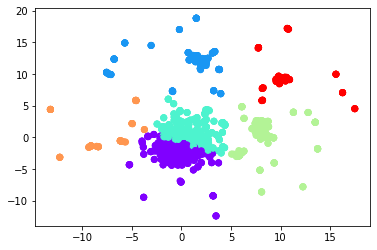

In [52]:
plt.scatter(clusterable_embedding[:,0],clusterable_embedding[:,1], c=kmeans, cmap='rainbow')

Topic Modeling on Each Cluster using LDA

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [0]:

def EncodeVec(data, maxfeature):
  try:
    value=[]
    #text=list(data['text'].split())
    for i in range(0,len(data)):
      m=','.join(data[i])
      value.append(m)
    vectorizer=CountVectorizer(stop_words='english',max_features=maxfeature)
  #vectorizer.fit(data)
    value = vectorizer.fit_transform(value)
    
    #word=vectorizer.get_feature_names()
    #print(word)
  except ValueError:
    pass                    
  return value


In [0]:
body_text_encode=EncodeVec(json_text['preprocessing_bodytext'].values,1000)

In [0]:
def Featurename(data, maxfeature):
  try:
    value=[]
    #text=list(data['text'].split())
    for i in range(0,len(data)):
      m=','.join(data[i])
      value.append(m)
    vectorizer=CountVectorizer(stop_words='english',max_features=maxfeature)
  #vectorizer.fit(data)
    value = vectorizer.get_feature_names()
    
    #word=vectorizer.get_feature_names()
    #print(word)
  except ValueError:
    pass                    
  return value

In [0]:
feature_name=Featurename(json_text['preprocessing_bodytext'].values,1000)

In [0]:
no_topics = 15
lda = LatentDirichletAllocation(n_components=no_topics).fit(body_text_encode)

In [0]:
#extract topics
def display_topics(model, feature_names, no_top_words):
    topics=[]
    for topic_idx, topic in enumerate(model.components_):
        #print ("Topic %d:" % (topic_idx))
        topic_words=" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        #print(topic_words)
        topics.append(topic_words)
    return topics



In [0]:
no_top_words = 5

#print("\nLDA: ")
topics_lda=display_topics(lda, feature_name, no_top_words)

#print(topics_lda)



In [0]:
pred_lda=lda.transform(body_text_encode)

res_lda=[topics_lda[np.argmax(r)] for r in pred_lda]

json_text['topic_lda']=res_lda


In [97]:
json_text['topic_lda'][0:10]

0    Porcine,reproductive,and,respiratory,syndrome,...
1    Immunization,is,arguably,the,most,appropriate,...
2    Porcine,reproductive,and,respiratory,syndrome,...
3    I,gs,,,the,effector,molecules,of,the,immune,re...
4    Porcine,reproductive,and,respiratory,syndrome,...
5    Middle,East,Respiratory,Syndrome,(,MERS,),a,re...
6    Steroid-associated,osteonecrosis,(,SAON,),is,o...
7    I,gs,,,the,effector,molecules,of,the,immune,re...
8    I,gs,,,the,effector,molecules,of,the,immune,re...
9    T,he,recent,identification,of,a,novel,human,co...
Name: topic_lda, dtype: object

In [101]:
grouped_lda=json_text.groupby('topic_lda')
for gp_name, gp in grouped_nmf:
    display(gp)

paper_id  ...                                          topic_lda
3     8dad92c1030a6547f112250184572c50dae43c8d  ...  I,gs,,,the,effector,molecules,of,the,immune,re...
7     9427765d1870e8f4acfb6556a78f297e19068464  ...  I,gs,,,the,effector,molecules,of,the,immune,re...
8     84da44d2366d3f082d0ec30cbaff70807ca732c7  ...  I,gs,,,the,effector,molecules,of,the,immune,re...
18    8d4a2fb48616bae57771c62a5bcbaf86e08b8276  ...  I,gs,,,the,effector,molecules,of,the,immune,re...
27    9794fdd25bf5ce08230e7f62838876ca45d05b87  ...  I,gs,,,the,effector,molecules,of,the,immune,re...
...                                        ...  ...                                                ...
4839  b0899a264af548a89d649154aec569889717b295  ...  I,gs,,,the,effector,molecules,of,the,immune,re...
4852  b9dbb79c9e06164c3b7fefce67c11c5d6caf1fcd  ...  I,gs,,,the,effector,molecules,of,the,immune,re...
4911  a05179c57d5e1cdddc839ff3c0b70a614efbb6cb  ...  I,gs,,,the,effector,molecules,of,the,immune,re...
4956  975349ac1c79fc64525ee17e7d088c88c2c2071b  ...  I,gs,,,the,effector,molecules,of,the,immune,re...
4964  a59a1e31a7d2edf1be120c4a13a454bed64b1593  ...  I,gs,,,the,effector,molecules,of,the,immune,re...

[598 rows x 6 columns]

paper_id  ...                                          topic_lda
1     98517ecaa3de323dc8585cee5453a2de2a0f3d22  ...  Immunization,is,arguably,the,most,appropriate,...
11    879df084e06fcce1980e3f73c36748068b39f049  ...  Immunization,is,arguably,the,most,appropriate,...
38    91b8cb1041fbbcc5774eb5d1634da179e3a78b61  ...  Immunization,is,arguably,the,most,appropriate,...
109   938eca42d73a6e5445fc7617b37e1aae84f712a2  ...  Immunization,is,arguably,the,most,appropriate,...
121   b36310af655a9ba95c32c0d8e88e5fb445edb7a1  ...  Immunization,is,arguably,the,most,appropriate,...
...                                        ...  ...                                                ...
4992  8ed2df683ca3cde36ebee8185754abf4c44b717b  ...  Immunization,is,arguably,the,most,appropriate,...
4993  9e4b67ef6613c31882bb561d28770203da19771b  ...  Immunization,is,arguably,the,most,appropriate,...
4994  b1b9d81726e56c2781ce6b63ae5015cf2f314c6f  ...  Immunization,is,arguably,the,most,appropriate,...
4995  811338b8a1cbfa4bee7c50f6358230fe72f479ba  ...  Immunization,is,arguably,the,most,appropriate,...
4998  af7d038be406d73b373f05a9cdfaf62d98e26cbb  ...  Immunization,is,arguably,the,most,appropriate,...

[417 rows x 6 columns]

paper_id  ...                                          topic_lda
25    977370a5432431d0680323ce3f9e67db65f5f7b1  ...  In,recent,years,,,gene,therapy,and,drug,target...
48    8a8d2206e8fa15801497ee0d24618adb7e34b693  ...  In,recent,years,,,gene,therapy,and,drug,target...
63    8fec2036fb2e98cbb9d4f955ce1d5198d1a09b3c  ...  In,recent,years,,,gene,therapy,and,drug,target...
72    89cc80396595df1ebb851e602666945754ab0257  ...  In,recent,years,,,gene,therapy,and,drug,target...
76    8ab9e9b90aa057cdd59acac5cce30ec1a6784e71  ...  In,recent,years,,,gene,therapy,and,drug,target...
...                                        ...  ...                                                ...
4487  44f2a233e304ecb65da5364afb371d8cb71e674e  ...  In,recent,years,,,gene,therapy,and,drug,target...
4614  610549c879c62efc42f2ad32f63c65b25d8931c7  ...  In,recent,years,,,gene,therapy,and,drug,target...
4636  530f3ba1a2c044305d73123fd8d2246f63120bc3  ...  In,recent,years,,,gene,therapy,and,drug,target...
4771  7bc87a77a7aba144248cfa3bc514541f09047edf  ...  In,recent,years,,,gene,therapy,and,drug,target...
4783  584b43ae1d473b93ad7b6c95d681e8f356ba82cd  ...  In,recent,years,,,gene,therapy,and,drug,target...

[349 rows x 6 columns]

paper_id  ...                                          topic_lda
26    93d77f602ff27ef1575dd6f700d3f39033bba576  ...  Japanese,encephalitis,(,JE,),is,an,acute,and,s...
34    8dc8c40ee8b61c5660b15c9e81e928eb3dc44ee5  ...  Japanese,encephalitis,(,JE,),is,an,acute,and,s...
40    934f45d3ce46b7e090b1a3d76a96e2acb705cc91  ...  Japanese,encephalitis,(,JE,),is,an,acute,and,s...
49    8c8c5fb760997ded36fe4ae8fc77103ec66f9d14  ...  Japanese,encephalitis,(,JE,),is,an,acute,and,s...
81    9a4c0d0a76e1ecd99c5a45fe8ff2a96aeff0fc2b  ...  Japanese,encephalitis,(,JE,),is,an,acute,and,s...
...                                        ...  ...                                                ...
4871  9867fe1531c1541ca2b25a82d7adb62d575798be  ...  Japanese,encephalitis,(,JE,),is,an,acute,and,s...
4881  92860a0f4425d12aafb8e096d8e65d38eb67dff5  ...  Japanese,encephalitis,(,JE,),is,an,acute,and,s...
4906  c06a2e0865d3359e028815022b796a342cfba7f1  ...  Japanese,encephalitis,(,JE,),is,an,acute,and,s...
4939  99dab788e984601ee4efcd1138926caf10c00dcf  ...  Japanese,encephalitis,(,JE,),is,an,acute,and,s...
4980  a9a978c056422f979395ce56c96738d33b104a3e  ...  Japanese,encephalitis,(,JE,),is,an,acute,and,s...

[207 rows x 6 columns]

paper_id  ...                                          topic_lda
5     94f679e7bf40010e41952e26e8953a5703be64c0  ...  Middle,East,Respiratory,Syndrome,(,MERS,),a,re...
97    92aca69f518fc394bd00b525898264893d9550af  ...  Middle,East,Respiratory,Syndrome,(,MERS,),a,re...
116   95ec993129c313d381f4065b6391f0fd40bedab5  ...  Middle,East,Respiratory,Syndrome,(,MERS,),a,re...
144   aefb4a29e4c933751675ed871bfa09305f1ffee2  ...  Middle,East,Respiratory,Syndrome,(,MERS,),a,re...
156   b66704a03a688c4065abff41c4977c4c9939c230  ...  Middle,East,Respiratory,Syndrome,(,MERS,),a,re...
...                                        ...  ...                                                ...
4728  69f473aee22a4ac8df15a54a6109b70b1ae9b7e7  ...  Middle,East,Respiratory,Syndrome,(,MERS,),a,re...
4818  a6cba8f9a9f89a08bb87e30a209389c9f1ca8c3d  ...  Middle,East,Respiratory,Syndrome,(,MERS,),a,re...
4856  93f67ffe7803061de9b19c4dfa346b3aa97aa4eb  ...  Middle,East,Respiratory,Syndrome,(,MERS,),a,re...
4937  a0bf115bf4dac8646d2a4a2309bb00e5cff253ac  ...  Middle,East,Respiratory,Syndrome,(,MERS,),a,re...
4996  9ca81dfa68fcbff13166d810aca929027bb3763b  ...  Middle,East,Respiratory,Syndrome,(,MERS,),a,re...

[231 rows x 6 columns]

paper_id  ...                                          topic_lda
106   92142e072745fbab996c5861e5974aa03805398a  ...  Nivolumab,is,an,immune,checkpoint,inhibitor,(,...
122   aad248c894ac1b35e2adad9e23c9cf40dc3c20aa  ...  Nivolumab,is,an,immune,checkpoint,inhibitor,(,...
126   b921ec0b4974533423b7af989620ff4ccc5e2f79  ...  Nivolumab,is,an,immune,checkpoint,inhibitor,(,...
130   b1a61e5a2eee47ec7d39715451c05879d11a5de0  ...  Nivolumab,is,an,immune,checkpoint,inhibitor,(,...
145   b7d7db5b12584c5fab0c2244a27d0653d8a59f7d  ...  Nivolumab,is,an,immune,checkpoint,inhibitor,(,...
...                                        ...  ...                                                ...
4560  50e56e8760bd4a81c2a8b891668eeebd1d04127f  ...  Nivolumab,is,an,immune,checkpoint,inhibitor,(,...
4606  5507325ad63261970f22c625abcfa59f99e24efd  ...  Nivolumab,is,an,immune,checkpoint,inhibitor,(,...
4615  5cf2bec1530cef38cd0eea173fb90ba1a788e11f  ...  Nivolumab,is,an,immune,checkpoint,inhibitor,(,...
4624  6aa2716c00d89f4b760a9167b15d6203303ae6b9  ...  Nivolumab,is,an,immune,checkpoint,inhibitor,(,...
4823  9af0b8e13e1e5ac714135dca8ba6d5216966066b  ...  Nivolumab,is,an,immune,checkpoint,inhibitor,(,...

[133 rows x 6 columns]

paper_id  ...                                          topic_lda
29    9c71b86e38ae06503c1dc05abea7743ef3e7851e  ...  Objectives,This,study,aimed,to,assess,the,affe...
32    9171b9ab69fa99aa5528c2173d4bf414c6d8c9cb  ...  Objectives,This,study,aimed,to,assess,the,affe...
41    8b78861684f93b6c17ed9e9d18027cfc12c41644  ...  Objectives,This,study,aimed,to,assess,the,affe...
51    927e00e594ec72a344b692093b2f3f77bbd911f4  ...  Objectives,This,study,aimed,to,assess,the,affe...
73    89d4bbbaafc5df5274e5ca4f2b21b3f27b50b216  ...  Objectives,This,study,aimed,to,assess,the,affe...
...                                        ...  ...                                                ...
4946  a400b0cfaa60df27b2ee3beea37dd58157912c34  ...  Objectives,This,study,aimed,to,assess,the,affe...
4955  a55f194aa80cdf0aa523d240e879575d120fb446  ...  Objectives,This,study,aimed,to,assess,the,affe...
4989  9bf1677e5f822110e736076a4ba6960a80f2f348  ...  Objectives,This,study,aimed,to,assess,the,affe...
4997  b378a19034ecc758062e01cad504b9df12b07fb6  ...  Objectives,This,study,aimed,to,assess,the,affe...
4999  a8e8f013668d49c84534848a416a3317b244710d  ...  Objectives,This,study,aimed,to,assess,the,affe...

[380 rows x 6 columns]

paper_id  ...                                          topic_lda
4     9660e4d54d854be62dc2e3ec086d1132a741efd9  ...  Porcine,reproductive,and,respiratory,syndrome,...
15    8fefbc58375c244a64a82e3f88c4084076838b88  ...  Porcine,reproductive,and,respiratory,syndrome,...
17    9c0ebc47e2a6b0592a18266c968e2aa28da9575e  ...  Porcine,reproductive,and,respiratory,syndrome,...
33    8cd6d7c2eeb732eeecb6b7618d02eafe82aa62a4  ...  Porcine,reproductive,and,respiratory,syndrome,...
43    8f4348a9455035db6487252e4fb48c65708a1e1f  ...  Porcine,reproductive,and,respiratory,syndrome,...
...                                        ...  ...                                                ...
4923  bf04c9ddc80690a5e2d3c74d79a797319e36e5b6  ...  Porcine,reproductive,and,respiratory,syndrome,...
4928  ac81102667b0d56edeb8ab0044765dc49a19f374  ...  Porcine,reproductive,and,respiratory,syndrome,...
4936  b696d208705fcb1925693c5f0d118733bb557ea6  ...  Porcine,reproductive,and,respiratory,syndrome,...
4948  982a6fe2fdba30430b547741811ff4411f1485f1  ...  Porcine,reproductive,and,respiratory,syndrome,...
4986  acd5cb2ba08da5c0f6bc310d74d497d38aa86be2  ...  Porcine,reproductive,and,respiratory,syndrome,...

[368 rows x 6 columns]

paper_id  ...                                          topic_lda
0     85dfb59af4c4ec824f1f62c645e5b91a6e3cc814  ...  Porcine,reproductive,and,respiratory,syndrome,...
2     95dbed40b9b6adbc57dcbae88e5bb4b8a3ad4929  ...  Porcine,reproductive,and,respiratory,syndrome,...
13    905e2b35719215760ebed8f3e93fdf6ea8ec9bcf  ...  Porcine,reproductive,and,respiratory,syndrome,...
44    9305dcf034dfe834775ad84358b90ae50092b829  ...  Porcine,reproductive,and,respiratory,syndrome,...
64    9363422a0f9b40cd6bb8f6c7fbbcaadf146f20a6  ...  Porcine,reproductive,and,respiratory,syndrome,...
...                                        ...  ...                                                ...
4834  aacc3acdd6a928fd820d51a2d1ea98c164b6abd4  ...  Porcine,reproductive,and,respiratory,syndrome,...
4859  88e3b43319399c339186c02c44d369228c35eef4  ...  Porcine,reproductive,and,respiratory,syndrome,...
4890  c8437a45bfb84fb206fe03fd18d28858bae32651  ...  Porcine,reproductive,and,respiratory,syndrome,...
4915  9ad252c633b7596a4b64ca9f1699a0db5ce99c05  ...  Porcine,reproductive,and,respiratory,syndrome,...
4920  939cef57fa345bfdd5e27cecf90684dacb26273c  ...  Porcine,reproductive,and,respiratory,syndrome,...

[277 rows x 6 columns]

paper_id  ...                                          topic_lda
10    8a6809df45d5f80a822d68d3c305f7640e10234a  ...  Respiratory,tract,infections,(,RTIs,),represen...
30    8582184d3d2e497088f716ad0fa5bd49976f0dd3  ...  Respiratory,tract,infections,(,RTIs,),represen...
39    8bf17efaaca3885956b262ec027b83e86cc1711f  ...  Respiratory,tract,infections,(,RTIs,),represen...
53    869a5a7ca9cf0fc9a2f5cd0332ac7c6b8e8e2ab9  ...  Respiratory,tract,infections,(,RTIs,),represen...
55    9d651ee3cc003d22f9ffff68394494087112ec45  ...  Respiratory,tract,infections,(,RTIs,),represen...
...                                        ...  ...                                                ...
4960  c08c3b98a956287a6eaf99f6d90969d7dd1410d1  ...  Respiratory,tract,infections,(,RTIs,),represen...
4967  b579c3547bba2a33057373d57b7c05f37dd4cfc3  ...  Respiratory,tract,infections,(,RTIs,),represen...
4983  b4d9a00412c65725de441654454803bb20ecb931  ...  Respiratory,tract,infections,(,RTIs,),represen...
4987  9daed5e675ac113d1939056dcebbb1f32ec0d7ec  ...  Respiratory,tract,infections,(,RTIs,),represen...
4991  aad76905ce54679c80b75e4ee35717c30e7e1099  ...  Respiratory,tract,infections,(,RTIs,),represen...

[481 rows x 6 columns]

paper_id  ...                                          topic_lda
6     87dcbcb15da36050308aca4284d842193d99cd6c  ...  Steroid-associated,osteonecrosis,(,SAON,),is,o...
12    95c40fb092ef550e2c0d8316a3af2d6c025df87d  ...  Steroid-associated,osteonecrosis,(,SAON,),is,o...
23    945fac2c9ade4e451cc0cb8388cf9de8b2f00a47  ...  Steroid-associated,osteonecrosis,(,SAON,),is,o...
31    894e9a681490af51667a059d727a9cce8dddbf7f  ...  Steroid-associated,osteonecrosis,(,SAON,),is,o...
36    92b6e41df821c7c137bfa56339734cee1715df3d  ...  Steroid-associated,osteonecrosis,(,SAON,),is,o...
...                                        ...  ...                                                ...
4830  97e0efc17b5a10c75f7c83b08423d27585a31df5  ...  Steroid-associated,osteonecrosis,(,SAON,),is,o...
4851  c41fdb2efd6d61384a92a84cbba3f8233629a41b  ...  Steroid-associated,osteonecrosis,(,SAON,),is,o...
4924  9b1e1c869a26b53973683d284250c2f4a8a339f6  ...  Steroid-associated,osteonecrosis,(,SAON,),is,o...
4963  9a3de625119a83aa1401eeb297937d9605f0d1f1  ...  Steroid-associated,osteonecrosis,(,SAON,),is,o...
4968  7ecc2bca3cfb5ebea94cd2601d6d3db60603452f  ...  Steroid-associated,osteonecrosis,(,SAON,),is,o...

[542 rows x 6 columns]

paper_id  ...                                          topic_lda
21    91bf77728f819af91ffed7f116dd2da12a1bd2a0  ...  T,he,recent,identification,of,a,novel,human,co...
22    8cb96ebaf1320867609839df21072f96631e9015  ...  T,he,recent,identification,of,a,novel,human,co...
24    9c6e96b1ba2b2e3a95621656bbf142cc11eb955a  ...  T,he,recent,identification,of,a,novel,human,co...
65    91abd69ad1b79240b58ffdfbce651e6980dca5bf  ...  T,he,recent,identification,of,a,novel,human,co...
78    85c04886b69b27eeddd4a72c74e2e1727a80598f  ...  T,he,recent,identification,of,a,novel,human,co...
...                                        ...  ...                                                ...
4913  83cca3779f8aeea47c5426e1d0fa65f1e9567e0c  ...  T,he,recent,identification,of,a,novel,human,co...
4938  80a77923cc53e58abc35b1b8fcb56d6339055206  ...  T,he,recent,identification,of,a,novel,human,co...
4961  aafa6cdfe96a5cdaf7b7c2f04b11a5dbdd73b2df  ...  T,he,recent,identification,of,a,novel,human,co...
4974  94dd454a02cb13481f099002f164e1b4f1590cd7  ...  T,he,recent,identification,of,a,novel,human,co...
4981  c8626262fa06c833da3a8dc15c2d4ca42ddc34f7  ...  T,he,recent,identification,of,a,novel,human,co...

[237 rows x 6 columns]

paper_id  ...                                          topic_lda
9     95f7c797080ddb8d466a88443df62ea97f46d932  ...  T,he,recent,identification,of,a,novel,human,co...
16    99be48475fc986f16d752a56ceeed588e4f74818  ...  T,he,recent,identification,of,a,novel,human,co...
20    9c4f25ca5cba3c28cd396f69bf49454ed15c19d4  ...  T,he,recent,identification,of,a,novel,human,co...
35    95742e15e5dc39ed30e4b72398dd4a49507dcec1  ...  T,he,recent,identification,of,a,novel,human,co...
45    8de34443c38db9422b06a2f583416660f1dca670  ...  T,he,recent,identification,of,a,novel,human,co...
...                                        ...  ...                                                ...
4879  b1ce6ca5960cb799403188ca303a364428f812d8  ...  T,he,recent,identification,of,a,novel,human,co...
4941  ac4a3bbe27272cd6780e7168906b0bf1413fc749  ...  T,he,recent,identification,of,a,novel,human,co...
4953  9fb5ca87ca47d35d87161158ae37fc0ca642c51e  ...  T,he,recent,identification,of,a,novel,human,co...
4971  7f8c673d136b9bc0aeda55e49cc72aacaa5688de  ...  T,he,recent,identification,of,a,novel,human,co...
4976  b7f94d0b929301cc7a5d8f68a74d4f0270c74649  ...  T,he,recent,identification,of,a,novel,human,co...

[209 rows x 6 columns]

paper_id  ...                                          topic_lda
47    99c9c1e5588a8e109e0e82cc66acea4dc5808a02  ...  The,structure,of,an,RNA,determines,its,interac...
61    9c4c3663078fac75ec89955444e1bed1f069e751  ...  The,structure,of,an,RNA,determines,its,interac...
89    91fce1b27a1d5074f5fbf213b8cafb69979597f9  ...  The,structure,of,an,RNA,determines,its,interac...
120   b3f8dab7ff123599384b8454a91dea037c2f27e9  ...  The,structure,of,an,RNA,determines,its,interac...
192   a25eeb43c5f7e8143b16c6237093f2156b3cef60  ...  The,structure,of,an,RNA,determines,its,interac...
...                                        ...  ...                                                ...
4897  9c32d461dc9d4737756a990cf13bae1a03e078a9  ...  The,structure,of,an,RNA,determines,its,interac...
4905  a6b05fa393f9404c906099e179ca476294068394  ...  The,structure,of,an,RNA,determines,its,interac...
4942  87bfa13221ccf5a02d4a888ef1320b57f2c2d5e2  ...  The,structure,of,an,RNA,determines,its,interac...
4954  b3b84e6844412c5aba86d285a15a9bca706c3fe8  ...  The,structure,of,an,RNA,determines,its,interac...
4984  a83b9f98ccbd6dd76d47c49cfe5785f9c2ecc09e  ...  The,structure,of,an,RNA,determines,its,interac...

[167 rows x 6 columns]

paper_id  ...                                          topic_lda
14    9ceee77cb6dcbc0a9568b770103698bb7603c97d  ...  reading,exonuclease,(,ExoN,),that,increases,re...
19    8f0e032bd15bab3c9c9af33305a2578b525e224c  ...  reading,exonuclease,(,ExoN,),that,increases,re...
52    954d000b2e7252ffb05812341a6436d3d784494a  ...  reading,exonuclease,(,ExoN,),that,increases,re...
59    8d88a7096820fcfb637b56b5563868c866ec692c  ...  reading,exonuclease,(,ExoN,),that,increases,re...
74    97040e1e32165ddc6f5ac806f9d970c4141c561e  ...  reading,exonuclease,(,ExoN,),that,increases,re...
...                                        ...  ...                                                ...
4921  836190d366ba8e34c3a5df8a24d17a36fd503505  ...  reading,exonuclease,(,ExoN,),that,increases,re...
4931  8d6d3be5f9353eb3358b44e646c83f1a90861b4d  ...  reading,exonuclease,(,ExoN,),that,increases,re...
4934  9211b1703c76e20afdee8fcb9f7996edadef0e9e  ...  reading,exonuclease,(,ExoN,),that,increases,re...
4940  ae4f1ac93bb55da1231f08eb1654f19352ab1a3f  ...  reading,exonuclease,(,ExoN,),that,increases,re...
4966  9ae476404f7ef1ec1ede965f0b898f31a5bf5a81  ...  reading,exonuclease,(,ExoN,),that,increases,re...

[404 rows x 6 columns]

In [102]:
grouped_lda.describe()

cluster_textbody  ...       
                                                              count  ...    max
topic_lda                                                            ...       
I,gs,,,the,effector,molecules,of,the,immune,res...            598.0  ...  785.0
Immunization,is,arguably,the,most,appropriate,w...            417.0  ...  785.0
In,recent,years,,,gene,therapy,and,drug,targeti...            349.0  ...  780.0
Japanese,encephalitis,(,JE,),is,an,acute,and,se...            207.0  ...  782.0
Middle,East,Respiratory,Syndrome,(,MERS,),a,res...            231.0  ...  785.0
Nivolumab,is,an,immune,checkpoint,inhibitor,(,I...            133.0  ...  766.0
Objectives,This,study,aimed,to,assess,the,affec...            380.0  ...  785.0
Porcine,reproductive,and,respiratory,syndrome,(...            368.0  ...  785.0
Porcine,reproductive,and,respiratory,syndrome,(...            277.0  ...  777.0
Respiratory,tract,infections,(,RTIs,),represent...            481.0  ...  786.0
Steroid-associated,osteonecrosis,(,SAON,),is,on...            542.0  ...  786.0
T,he,recent,identification,of,a,novel,human,cor...            237.0  ...  785.0
T,he,recent,identification,of,a,novel,human,cor...            209.0  ...  785.0
The,structure,of,an,RNA,determines,its,interact...            167.0  ...  776.0
reading,exonuclease,(,ExoN,),that,increases,rep...            404.0  ...  770.0

[15 rows x 8 columns]